# Summary

# Marginal data distribution

In statistics and probability, a marginal distribution is the distribution of a subset of all random variables, marginalizing over the rest of the variables. In other words, it's the probability distribution for one or more variables without consideration of the other variables.

Let's say you have a joint probability distribution $p(X,Y)$, which gives you the probability of different combinations of X and Y. If you want to find the marginal distribution of X, you sum (or integrate, for continuous variables) over all possible values of Y: $p(x) = \sum_{y} p(x,y)$

For continuous variables, you would integrate instead of summing:$p(x) = \int_{y} p(x,y)\text{d}y$
This marginal distribution P(X) tells you the probabilities of X irrespective of Y.

To calculate this in Python, assuming you have discrete variables and a joint distribution in a tabular form (like a 2D array), you would sum across the rows or columns. If you have a 2D NumPy array joint_distribution representing P(X,Y), you can calculate the marginal distribution like this:

# Week 1 Beta-binomial Model

In [1]:
%matplotlib inline
import pylab as plt
import numpy as np
import seaborn as snb

from scipy.stats import binom as binom_dist
from scipy.stats import beta as beta_dist
from scipy.special import beta as beta_fun


snb.set_style('darkgrid')
snb.set(font_scale=1.5)
plt.rcParams['lines.linewidth'] = 3


**Compute the confidence interval using Maximum likelihood estimator**

In [3]:
# data 
y = 1
N = 17

# maximum likelihood estimator
theta_MLE = y/N

# 95% confidence interval
z = 1.96
r = z*np.sqrt(theta_MLE*(1-theta_MLE)/N)
lower = theta_MLE - r
upper = theta_MLE + r


print(f'Data: {y} successes out of {N} trials')
print(f'Maximum likelihood estimator for theta: {theta_MLE:4.4f}')
print(f'Interval: [{lower:4.4f}, {upper:4.4f}]')


Data: 1 successes out of 17 trials
Maximum likelihood estimator for theta: 0.0588
Interval: [-0.0530, 0.1707]


**plot the prior, likelihood and posterior**

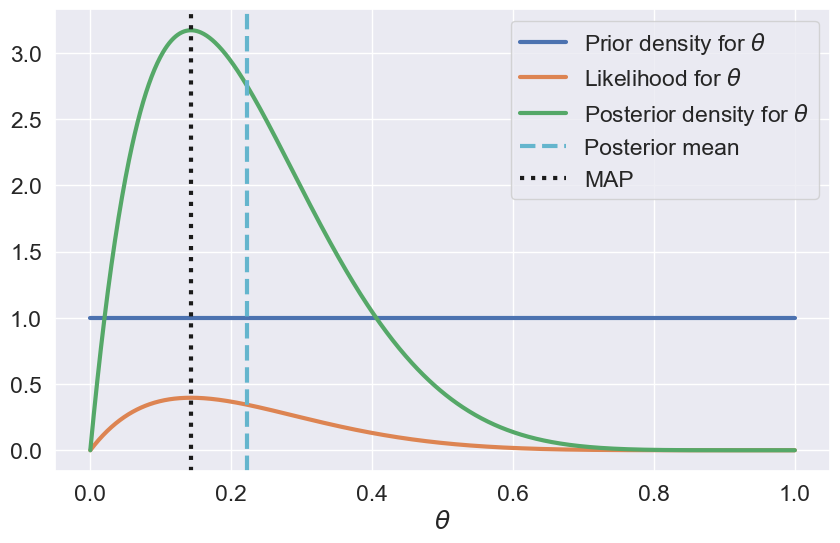

In [4]:
# data
N = 7
y = 1

# prior
alpha0 = 1
beta0 = 1

# posterior
alpha = alpha0 + y
beta = beta0 + N - y

# MAP
theta_MAP = (alpha - 1)/(alpha + beta - 2)
theta_post_mean = alpha/(alpha + beta)

# plot
thetas = np.linspace(0, 1, 1000)
fig, ax = plt.subplots(1,1, figsize=(10, 6))
ax.plot(thetas, beta_dist.pdf(thetas, alpha0, beta0), label='Prior density for $\\theta$')
ax.plot(thetas, binom_dist.pmf(y, n=N, p=thetas), label='Likelihood for $\\theta$')
ax.plot(thetas, beta_dist.pdf(thetas, alpha, beta), label='Posterior density for $\\theta$')
ax.axvline(theta_post_mean, color='c', linestyle='--', label='Posterior mean')
ax.axvline(theta_MAP, color='k', linestyle=':', label='MAP')
ax.set(xlabel='$\\theta$')
ax.legend();

**compute the posterior mean and confidence interval**

In [6]:
alpha0 = 2
beta0 = 17

N = 20
y = 4

def summarize_posterior(N, y, alpha0, beta0, interval_sizes=[95]):

    # compute posterior
    alpha = alpha0 + y
    beta =  beta0 + N - y

    # print data, prior, posterior
    print(f'Data:           {y} successes in {N} trials')
    print(f'Prior:          Beta({alpha0},{beta0})')
    print(f'Posterior:      Beta({alpha}, {beta})')

    # posterior mean
    posterior_mean = alpha/(alpha+beta)
    print(f'Posterior mean: {posterior_mean:3.2f}')

    # intervals
    for interval_size in interval_sizes:
        theta_lower, theta_upper = beta_dist.interval(interval_size/100, a=alpha, b=beta)
        print(f'{interval_size}%-credibility interval: [{theta_lower:3.4f}-{theta_upper:3.4f}]')
    print('')

summarize_posterior(N=20, y=4, alpha0=2, beta0=17, interval_sizes=[50, 90, 95])



Data:           4 successes in 20 trials
Prior:          Beta(2,17)
Posterior:      Beta(6, 33)
Posterior mean: 0.15
50%-credibility interval: [0.1123-0.1891]
90%-credibility interval: [0.0711-0.2570]
95%-credibility interval: [0.0602-0.2809]



**Computing PDF,CDF and PPF**

In [8]:
from scipy.stats import norm

# Define the mean and standard deviation
mu = 0  # Mean
sigma = 5  # Standard deviation

# Compute the PDF at a specific point(probability density function)
x = 1.5
pdf_value = norm.pdf(x, mu, sigma)
print(f"PDF at x = {x}: {pdf_value}")

# Compute the CDF at a specific point(cumulative density function)
cdf_value = norm.cdf(x, mu, sigma)
print(f"CDF at x = {x}: {cdf_value}")

# Compute the PPF (quantile) for a given probability(Percent Point Function)
p = 0.95
quantile = norm.ppf(p, mu, sigma)
print(f"95th percentile (quantile for p = 0.95): {quantile}")

# Generate random samples from the distribution
num_samples = 5
samples = norm.rvs(mu, sigma, size=num_samples)
print(f"Random samples: {samples}")


PDF at x = 1.5: 0.07627756309210483
CDF at x = 1.5: 0.6179114221889526
95th percentile (quantile for p = 0.95): 8.224268134757361
Random samples: [ 1.78278923 -2.96826607  2.76544547  7.93698939 -1.62735788]


# Assignment 1

**Function to evaluate log prior, likelihood and the joint distribution**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import invgamma, norm

/var/folders/ff/tm9v3zh91jv9vg9vgbf1rhnr0000gn/T/ipykernel_32345/1922076767.py:33: RuntimeWarning: invalid value encountered in sqrt
  likelihood += norm.logpdf(yi, a, np.sqrt(b))


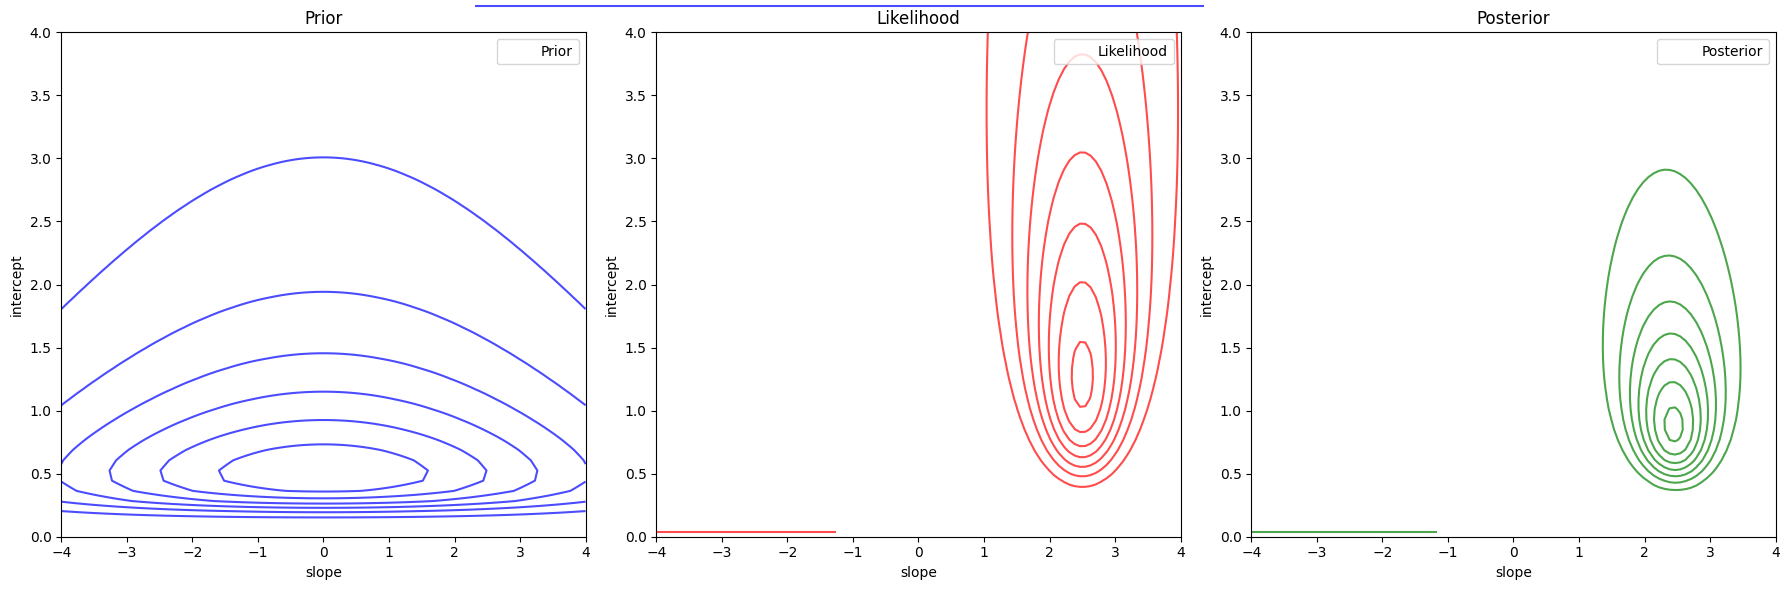

In [4]:
# Define the plot_distribution function as requested
def plot_distribution(ax, density_fun, color=None, visibility=1, label=None, title=None, num_points=100):
    # create grid for parameters (a,b)
    a_array = np.linspace(-4, 4, num_points)
    b_array = np.linspace(-4, 4, num_points)  
    A_array, B_array = np.meshgrid(a_array, b_array)   
    
    # form array with all combinations of (a,b) in our grid
    AB = np.column_stack((A_array.ravel(), B_array.ravel()))
    
    # evaluate density for every point in the grid and reshape back
    Z = density_fun(AB[:, 0], AB[:, 1])
    Z = Z.reshape((num_points, num_points))
    
    # plot contour  
    cs = ax.contour(a_array, b_array, np.exp(Z), colors=color, alpha=visibility)
    if label:
        cs.collections[0].set_label(label)
    ax.set(xlabel='slope', ylabel='intercept', xlim=(-4, 4), ylim=(0, 4), title=title)
    if label:
        ax.legend()

# Observations
y = np.array([1, 2, 3, 4])

# Define the density functions for prior, likelihood, and posterior
def prior_density(a, b):
    return norm.logpdf(a, 0, np.sqrt(10)) + invgamma.logpdf(b, 1, scale=1)

def likelihood_density(a, b):
    likelihood = np.zeros_like(a)
    for yi in y:
        likelihood += norm.logpdf(yi, a, np.sqrt(b))
    return likelihood

def posterior_density(a, b):
    return likelihood_density(a, b) + prior_density(a, b)

# Create the figure and axes
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Plot distributions
plot_distribution(axs[0], prior_density, color='blue', visibility=0.7, label='Prior', title='Prior')
plot_distribution(axs[1], likelihood_density, color='red', visibility=0.7, label='Likelihood', title='Likelihood')
plot_distribution(axs[2], posterior_density, color='green', visibility=0.7, label='Posterior', title='Posterior')

# Adjust the layout and show the plot
plt.tight_layout()
plt.show()


(None, None)

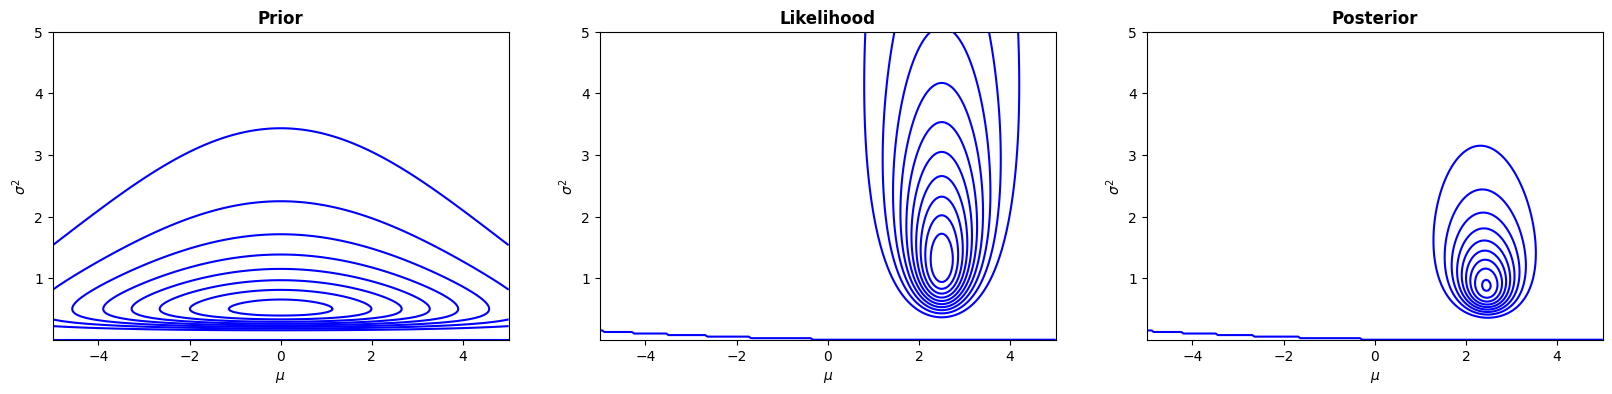

In [22]:
from scipy.special import gammaln
class Grid2D(object):
    '''helper class for evaluating the function func on the grid defined by (alpha, beta)'''
    def __init__(self, mus, sigma2s, func, name="Grid2D"): 
        self.mus = mus
        self.sigma2s = sigma2s
        self.grid_size = (len(self.mus), len(self.sigma2s))
        self.alpha_grid, self.beta_grid = np.meshgrid(mus, sigma2s, indexing='ij') 
        self.func = func
        self.name = name
        # evaluate function on each grid point
        self.values = self.func(self.alpha_grid[:, :, None], self.beta_grid[:, :, None]).squeeze ()
    def plot_contours(self, ax, color='b', num_contours=10, f=lambda x: x, alpha=1.0, title= None):
        ax.contour(self.mus, self.sigma2s, f(self.values).T, num_contours, colors=color, alpha=alpha)
        ax.set(xlabel='$\\mu$', ylabel='$\\sigma^2$') 
        ax.set_title(self.name, fontweight='bold')
    @property
    def argmax(self):
        idx = np.argmax(self.values)
        alpha_idx, beta_idx = np.unravel_index(idx, self.grid_size) 
        return self.mus[alpha_idx], self.sigma2s[beta_idx]


# define base distributions
log_npdf = lambda x, m, v: -(x-m)**2/(2*v) - 0.5*np.log(2*np.pi*v)
log_inverse_gamma = lambda s2, alpha, beta: alpha*np.log(beta) - gammaln(alpha) + (alpha+1)*np.log(1/s2) - beta/s2
# define model
log_prior_mu = lambda x: log_npdf(x, 0, 10)
log_prior_s2 = lambda x: log_inverse_gamma(x, 1, 1)
log_prior = lambda mu, s2: log_prior_mu(mu) + log_prior_s2(s2)
log_lik = lambda mu, s2: log_npdf(1, mu, s2) + log_npdf(2, mu, s2) + log_npdf(3, mu, s2) + log_npdf(4, mu, s2)
log_joint = lambda mu, s2: log_lik(mu, s2) + log_prior_mu(mu) + log_prior_s2(s2)
# define rannge
mu_space = np.linspace(-5, 5, 200)
s2_space = np.linspace(1e-6, 5, 200)
# set-up grids
grid_prior = Grid2D(mu_space , s2_space , log_prior , 'Prior')
grid_lik = Grid2D(mu_space, s2_space, log_lik, 'Likelihood')
grid_post = Grid2D(mu_space , s2_space , log_joint , 'Posterior')
# plot
fig, ax = plt.subplots(1, 3, figsize=(20, 4))
grid_prior.plot_contours(ax[0], f=np.exp)
grid_lik.plot_contours(ax[1], f=np.exp),grid_post.plot_contours(ax[2], f=np.exp)

**Use a grid approximation to compute and plot posterior distributions**

[Text(0.5, 0, '$\\sigma^2$'), Text(0.5, 1.0, '$p(\\sigma|\\mathbf{y})$')]

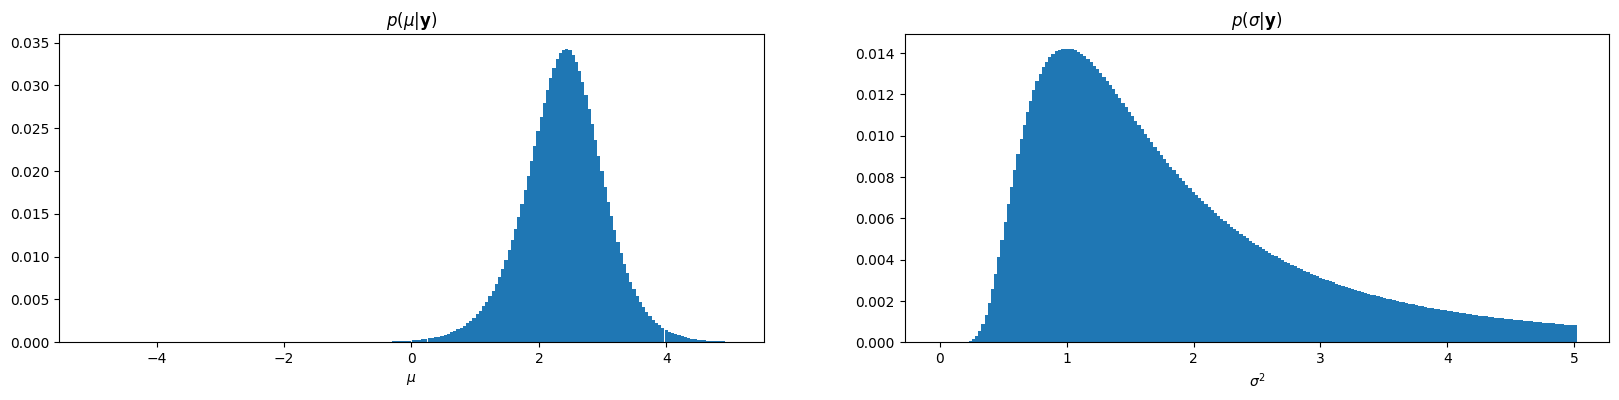

In [26]:
class Grid2D(object):
    """ helper class for evaluating the function func on the grid defined by (alpha, beta)"""

    def __init__(self, alphas, betas, func, name="Grid2D"):
        self.alphas = alphas
        self.betas = betas
        self.grid_size = (len(self.alphas), len(self.betas))
        self.alpha_grid, self.beta_grid = np.meshgrid(alphas, betas, indexing='ij')
        self.func = func
        self.name = name
        
        # evaluate function on each grid point
        self.values = self.func(self.alpha_grid[:, :, None], self.beta_grid[:, :, None]).squeeze()

    def plot_contours(self, ax, color='b', num_contours=10, f=lambda x: x, alpha=1.0, title=None):
        ax.contour(self.alphas, self.betas, f(self.values).T, num_contours, colors=color, alpha=alpha)
        ax.set(xlabel='$\\alpha$', ylabel='$\\beta$')
        ax.set_title(self.name, fontweight='bold')

    @property
    def argmax(self):
        idx = np.argmax(self.values)
        alpha_idx, beta_idx = np.unravel_index(idx, self.grid_size)
        return self.alphas[alpha_idx], self.betas[beta_idx]

class GridApproximation2D(Grid2D):

    def __init__(self, alphas, betas, log_joint, threshold=1e-8, name="GridApproximation2D"):
        Grid2D.__init__(self, alphas, betas, log_joint, name)
        self.threshold = threshold
        self.prep_approximation()
        self.compute_marginals()
        self.sanity_check()
        
    def prep_approximation(self):
        
        # [num_alpha, num_beta]-sized matrix of the log joint evaluated on the grid 
        self.log_joint_grid = self.values
        self.log_joint_grid = self.log_joint_grid - np.max(self.log_joint_grid)

        # convert from log densities to probabilities density for each point on the grid 
        self.tilde_probabilities_grid = np.exp(self.log_joint_grid) 

        # compute normalization constant 
        self.Z = np.sum(self.tilde_probabilities_grid)      

        # [num_alpha, num_beta]-matrix of \pi_{ij}-values summing to 1.
        self.probabilities_grid = self.tilde_probabilities_grid/self.Z    

        # flatten for later convinience
        self.alphas_flat = self.alpha_grid.flatten()                                             # shape: [num_alpha*num_beta] = [num_outcomes]
        self.betas_flat = self.beta_grid.flatten()                                               # shape: [num_alpha*num_beta] = [num_outcomes]
        self.num_outcomes = len(self.alphas_flat)                                                # shape: scalar 
        self.probabilities_flat = self.probabilities_grid.flatten()                              # [num_outcomes]
    def compute_marginals(self):
        self.pi_alpha = self.probabilities_grid.sum(1)  
        self.pi_beta = self.probabilities_grid.sum(0)  

        # compute marginal distribution using sum rule
    def compute_expectation(self, f):
        """ computes expectation of f(alpha, beta) wrt. the grid approximation """
        return np.sum(f(self.alphas_flat, self.betas_flat)*self.probabilities_flat, axis=0)
    
    def sample(self, num_samples=1):
        """ generate num_samples from the grid approximation distribution """
        idx = np.random.choice(np.arange(self.num_outcomes), p=self.probabilities_flat, size=num_samples)
        return self.alphas_flat[idx], self.betas_flat[idx]

    def visualize(self, ax, scaling=8000, title='Grid approximation'):
        idx = self.probabilities_flat > self.threshold
        ax.scatter(self.alphas_flat[idx], self.betas_flat[idx], scaling*self.probabilities_flat[idx],label='$\pi_{ij}$')        
        ax.set(xlabel='$\\alpha$', ylabel='$\\beta$')
        ax.set_title(title, fontweight='bold')

    def sanity_check(self):
        assert self.probabilities_grid.shape == self.grid_size, "Probability grid does not have shape [num_alphas, num_betas] (self.grid_size). Check your implementation."
        assert np.all(self.probabilities_grid >= 0), "Not all values in probability grid are non-negative. Check your implementation."
        assert np.allclose(self.probabilities_grid.sum(), 1), "Values in probability grid do not sum to one. Check your implementation."

# grid
alphas = np.linspace(-5, 5, 200)
betas = np.linspace(1e-6, 5, 200)

# Observations
y = np.array([1, 2, 3, 4])

# Define the density functions for prior, likelihood, and posterior
def prior_density(a, b):
    return norm.logpdf(a, 0, np.sqrt(10)) + invgamma.logpdf(b, 1, scale=1)

def likelihood_density(a, b):
    likelihood = np.zeros_like(a)
    b_positive = np.clip(b, 1e-6, None)
    for yi in y:
        likelihood += norm.logpdf(yi, a, np.sqrt(b_positive))
    return likelihood

def posterior_density(a, b):
    return likelihood_density(a, b) + prior_density(a, b) # this is the log joint

# Create the grid approximation
log_joint = lambda a, b: posterior_density(a, b)
#grid_approximation = GridApproximation2D(alphas, betas, log_joint)

# plot
#fig, ax = plt.subplots(1, 1, figsize=(12, 8))
#grid_approximation.visualize(ax, scaling=8000,title='Grid approximation of posterior')
#ax.set(xlabel='$\\alpha$', ylabel='$\\beta$')
#ax.legend();
approx = GridApproximation2D(alphas , betas , log_joint) 
fig, ax = plt.subplots(1, 2, figsize=(20, 4))
ax[0].bar(alphas,approx.pi_alpha, width=0.05) 
ax[0].set(xlabel='$\mu$', title='$p(\mu|\mathbf{y})$')
ax[1].bar(betas,approx.pi_beta, width=0.05) 
ax[1].set(xlabel='$\\sigma^2$', title='$p(\\sigma|\mathbf{y})$')

**plot the marginal posterior distribution $p(\mu|y)$ and $p(\sigma^2|y)$**

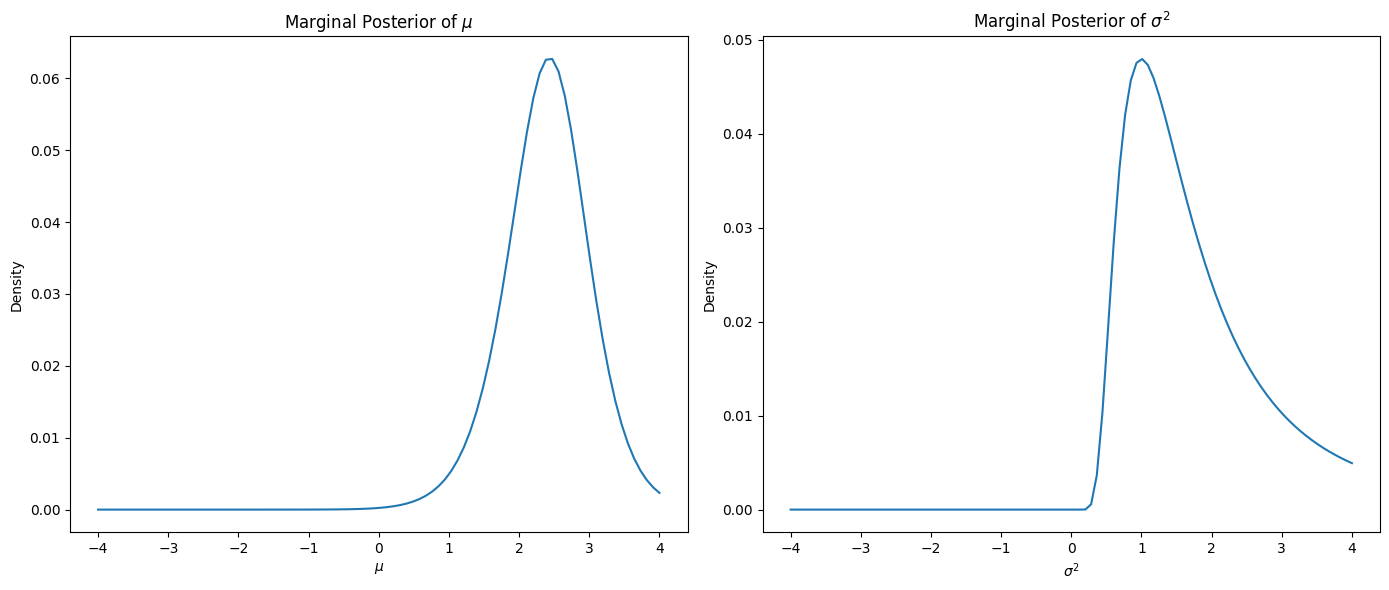

In [23]:
# Plot the marginal posterior distributions
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Marginal posterior of mu (alpha)
axs[0].plot(grid_approximation.alphas, grid_approximation.pi_alpha)
axs[0].set_title('Marginal Posterior of $\\mu$')
axs[0].set_xlabel('$\\mu$')
axs[0].set_ylabel('Density')

# Marginal posterior of sigma^2 (beta)
axs[1].plot(grid_approximation.betas, grid_approximation.pi_beta)
axs[1].set_title('Marginal Posterior of $\\sigma^2$')
axs[1].set_xlabel('$\\sigma^2$')
axs[1].set_ylabel('Density')

plt.tight_layout()
plt.show()


**compute posterior mean and $95 \%$ credibility interval for $\mu$ and $\sigma^2$**

In [27]:

class DiscreteDistribution1D(object):

    def __init__(self, outcomes, probabilities, name='DiscreteDistribution'):
        """ represents discrete random variable X in terms of outcomes and probabilities """
        self.outcomes = outcomes
        self.probabilities = probabilities
        assert self.outcomes.shape == self.probabilities.shape
        self.name = name

    def CDF(self, x):
        """ P[X <= x] """
        idx = self.outcomes <= x
        return np.sum(self.probabilities[idx]) 
    
    def quantile(self, p):
        """ Q(p) = inf {x | p < CDF(x)} """
        cdf_values = np.cumsum(self.probabilities) 
        idx = np.where(np.logical_or(p < cdf_values, np.isclose(p, cdf_values)))[0]
        return np.min(self.outcomes[idx])
    
    @property
    def mean(self):
        """ return scalar corresponding to the mean of the discrete distribution """
        return np.sum(self.outcomes * self.probabilities)  
    
    @property
    def variance(self):
        """ return scalar corresponding to the variance of the discrete distribution """
        return np.sum((self.outcomes - self.mean)**2 * self.probabilities)  
    
    def central_interval(self, interval_size=95):
        """ return tuple (lower, upper) corresponding to the central interval of the discrete distribution """
        c = 1.-interval_size/100.
        return self.quantile(c/2), self.quantile(1-c/2)  
    
    def print_summary(self):
        print(f'Summary for {self.name}')
        print(f'\tMean:\t\t\t\t{self.mean:3.2f}')
        print(f'\tStd. dev.:\t\t\t{np.sqrt(self.variance):3.2f}')
        print(f'\t95%-credibility interval:\t[{self.central_interval()[0]:3.2f}, {self.central_interval()[1]:3.2f}]\n')


dist_mu = DiscreteDistribution1D(approx.alphas, approx.pi_alpha, "mu")
dist_s2 = DiscreteDistribution1D(approx.betas , approx.pi_beta , "sigma2") 
dist_mu.print_summary()
dist_s2.print_summary()


Summary for mu
	Mean:				2.39
	Std. dev.:			0.65
	95%-credibility interval:	[1.03, 3.64]

Summary for sigma2
	Mean:				1.78
	Std. dev.:			1.00
	95%-credibility interval:	[0.53, 4.37]



**Compute and plot the posterior predictive density for a new observation y∗ using**
1.the plugin approximation with MLE, 
2.the plugin approximation using MAP, and 
3.the grid approximation

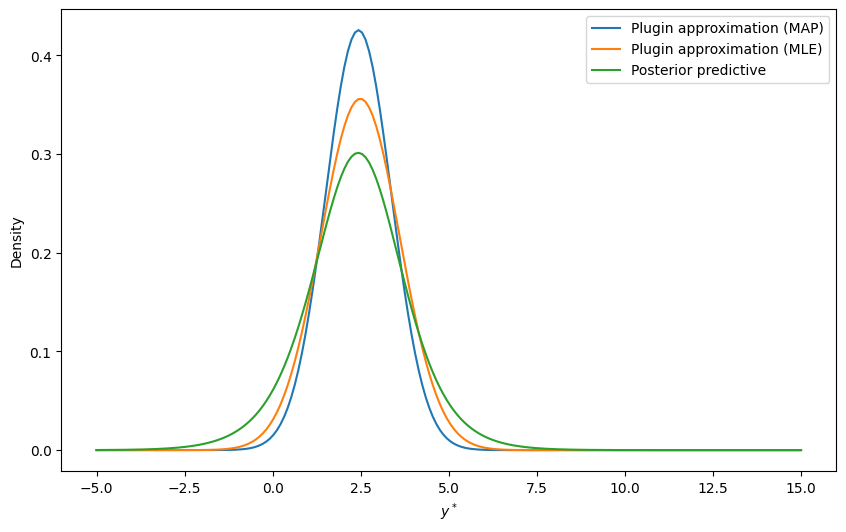

In [31]:
# MAP/MLE solution
mu_MAP , sigma2_MAP = grid_post.argmax
mu_MLE , sigma2_MLE = grid_lik.argmax
# posterior predictive as a weighted average
post_pred = []
ys = np.linspace(-5,15, 200)
for pi, mu, sigma2 in zip(approx.probabilities_flat , approx.alphas_flat , approx.betas_flat):
    post_pred.append(pi*np.exp(log_npdf(ys, mu, sigma2))) 
post_pred = np.sum(post_pred , 0)
# plot
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
ax.plot(ys, np.exp(log_npdf(ys, mu_MAP, sigma2_MAP)), label='Plugin approximation (MAP)')
ax.plot(ys, np.exp(log_npdf(ys, mu_MLE, sigma2_MLE)), label='Plugin approximation (MLE)') 
ax.plot(ys, post_pred, label='Posterior predictive')
ax.set(xlabel='$y^*$', ylabel='Density') 
ax.legend()


MLE Plugin (Blue Line): The MLE (Maximum Likelihood Estimation) approach uses only the observed data to estimate the parameters, without considering prior information. The fact that the MLE curve is not the highest suggests that the data alone provides a somewhat broad range of probable values for y*. This could be due to the data being relatively spread out or not strongly indicating a single, most likely value for y*

MAP Plugin (Orange Line): The MAP (Maximum A Posteriori) curve is the most peaked, meaning the MAP estimate for y* is more confident about a specific range of values. This increased confidence is due to the combination of the likelihood of the observed data with the prior information about the parameters. The peak indicates that the MAP estimate, which balances the observed data with the prior beliefs, results in a stronger prediction for a particular value of y*.

Grid Approximation (Green Line): The grid approximation is the broadest and flattest curve, showing the least confidence in a specific value for y∗. This method considers the full posterior distribution over the grid of parameter values, taking into account all possible combinations of parameters and their associated uncertainty. It represents a more comprehensive integration of the data and the prior, leading to wider and flatter predictive densities, which suggests a higher degree of overall uncertainty compared to the point estimates provided by MLE or MAP.

The specific shapes of the curves can be attributed to the following reasons:

The MAP's peaked nature suggests that the prior distribution used in the Bayesian analysis is informative and contributes significantly to the posterior distribution, possibly more so than the data itself. If the prior is centered around values that are also supported by the data, it can lead to a posterior that is narrower and more peaked, as seen in the MAP curve.

The MLE's less peaked nature implies that, without the influence of the prior, the data leads to a broader range of likely parameter values, and thus a wider range of likely predictions for y*.

The Grid Approximation's flatness implies a spread of plausible parameter values across the grid, with none being particularly more likely than others after considering the data and prior. This indicates a high level of uncertainty about the parameters, leading to a less confident prediction of y*.

In conclusion, the MAP's height relative to MLE and the grid approximation indicates a strong influence from the prior, aligning closely with the data to yield a more precise prediction for y*. The MLE and grid approximation reflect varying levels of uncertainty in the parameters, with the grid approximation showing the most uncertainty due to its integration over the entire posterior distribution.

# Week 2 Logistic regression

In [2]:
%matplotlib inline
import pylab as plt
import numpy as np
import seaborn as snb

from scipy.stats import binom as binom_dist

snb.set_style('darkgrid')
snb.set(font_scale=1.)
colors = 'brgmc'

In [3]:
# load data
data = np.load('./orings_data.npz')
t = data['temperature']   # recorded temperature
y = data['failed']        # number of failed o-rings
N = data['count']         # total number of o-rings

# compute mean and standard deviation of temperatures
tmean, tstd = np.mean(t), np.std(t)

# standardize temperatures
standardize = lambda t_: (t_ - tmean)/tstd
x = standardize(t)

**Task 2.1**: Complete the implementation of the functions *f, theta, log_prior* and *log_likelihood* below.

In [4]:
sigmoid = lambda x: 1./(1 + np.exp(-x))
log_npdf = lambda x, m, v: -(x-m)**2/(2*v) - 0.5*np.log(2*np.pi*v)

class LogisticRegression(object):

    def __init__(self, x, y, N, sigma2_alpha=1., sigma2_beta=1.):
        # data
        self.x = x
        self.y = y
        self.N = N

        # hyperparameters
        self.sigma2_alpha = sigma2_alpha
        self.sigma2_beta = sigma2_beta

    def f(self, x, alpha, beta):
        """ implements eq. (3). Output must have the same shape as x """
        return alpha + beta*x 
        
    def theta(self, x, alpha, beta):
        """ implements eq. (2). Output must have the same shape as x """
        return sigmoid(self.f(x, alpha, beta)) 

    def log_prior(self, alpha, beta):
        """ implements log. of eq. (8). Output must have the same shape as alpha and beta """
        return log_npdf(alpha, 0, self.sigma2_alpha) + log_npdf(beta, 0, self.sigma2_beta) 

    def log_likelihood(self, alpha, beta):
        """ implements log. of eq. (5). Output must have the same shape as alpha and beta """
        theta = self.theta(self.x, alpha, beta)  
        log_lik = np.sum(binom_dist.logpmf(self.y, n=self.N, p=theta), axis=-1) 
        
        if type(log_lik) is np.ndarray:
            log_lik = np.expand_dims(log_lik, axis=-1)
        return log_lik

    def log_joint(self, alpha, beta):
        return self.log_prior(alpha, beta).squeeze() + self.log_likelihood(alpha, beta).squeeze()
    
# instantiate model
model = LogisticRegression(x, y, N)

# some sanity checks to help verify your implementation and make it compatible with the rest of the exercise
assert np.allclose(model.theta(x=2, alpha=2, beta=-0.5), 0.7310585786300049), "The value of output of the theta-function was different than expected. Please check your code."
assert np.allclose(model.log_prior(1., 1.), -2.8378770664093453), "The value of the output of the log_prior function was different than expected. Please check your code."
assert np.allclose(model.log_likelihood(-1.,2.), -95.18926297085957), "The value of the output of the log_likelihood function was different than expected. Please check your code."

assert model.theta(np.linspace(-3, 3, 10), 1, 1).shape == (10,), "The shape of the output of the theta-function was different than expected. Please check your code."
assert model.log_prior(np.linspace(-3, 3, 10), np.linspace(-3, 3, 10)).shape == (10,), "The shape of the output of the log_prior-function was different than expected. Please check your code."
assert model.log_likelihood(np.linspace(-3, 3, 10)[:, None], np.linspace(-3, 3, 10)[:, None]).shape == (10, 1),  "The shape of the output of the log_likelihood-function was different than expected. Please check your code."

If the model implementation above is correct, then the code below should produce contour plots of the prior, likelihood and posterior. We also compute and plot the $\textbf{MLE}$ and $\textbf{MAP}$ estimators for the model. Because this is a 2D problem, we can simply obtain the MLE/MAP estimators by maximizing over the set of grid values. However, this becomes infeasible in higher dimensions, where gradient-based optimization is used instead.

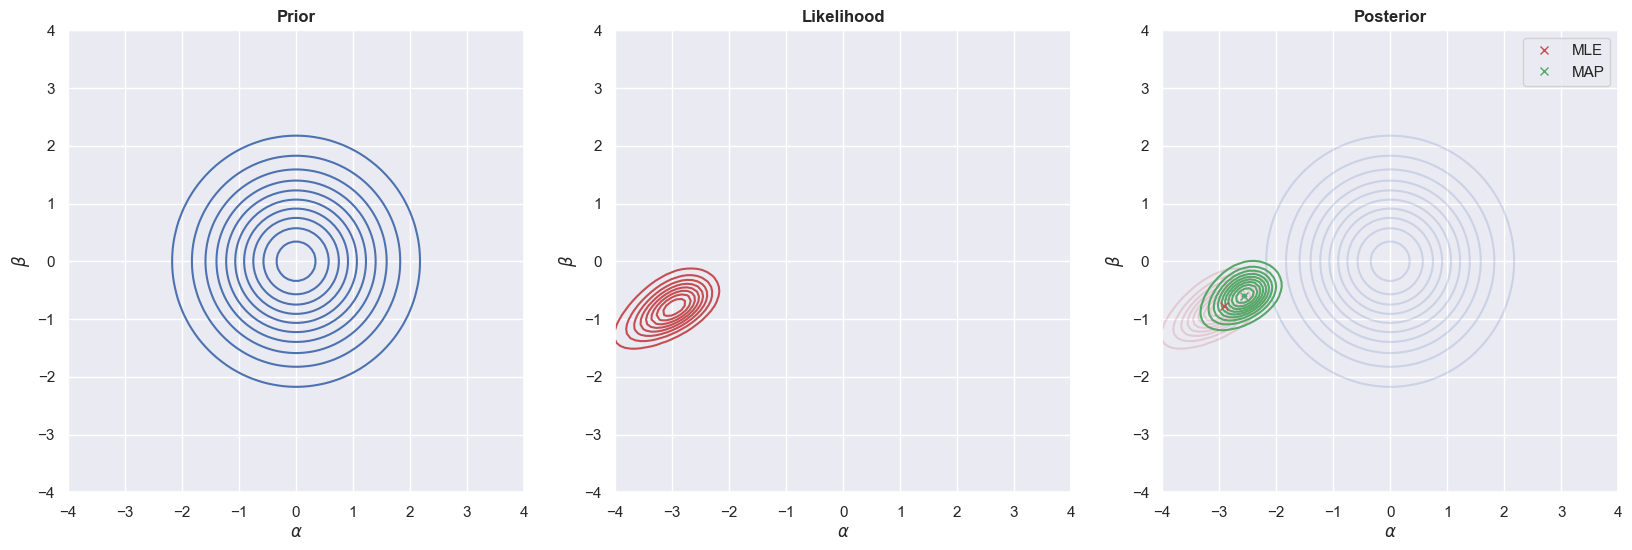

In [5]:
class Grid2D(object):
    """ helper class for evaluating the function func on the grid defined by (alpha, beta)"""

    def __init__(self, alphas, betas, func, name="Grid2D"):
        self.alphas = alphas
        self.betas = betas
        self.grid_size = (len(self.alphas), len(self.betas))
        self.alpha_grid, self.beta_grid = np.meshgrid(alphas, betas, indexing='ij')
        self.func = func
        self.name = name
        
        # evaluate function on each grid point
        self.values = self.func(self.alpha_grid[:, :, None], self.beta_grid[:, :, None]).squeeze()

    def plot_contours(self, ax, color='b', num_contours=10, f=lambda x: x, alpha=1.0, title=None):
        ax.contour(self.alphas, self.betas, f(self.values).T, num_contours, colors=color, alpha=alpha)
        ax.set(xlabel='$\\alpha$', ylabel='$\\beta$')
        ax.set_title(self.name, fontweight='bold')

    @property
    def argmax(self):
        idx = np.argmax(self.values)
        alpha_idx, beta_idx = np.unravel_index(idx, self.grid_size)
        return self.alphas[alpha_idx], self.betas[beta_idx]


# define grid points (the only reason for using different numbers of points for alpha and beta is to make debugging easier)
num_alpha, num_beta = 90, 100
alphas = np.linspace(-4, 4, num_alpha)
betas = np.linspace(-4, 4, num_beta)

# evalute log prior, log likelihood and log joint on the (alpha, beta)-grid
model = LogisticRegression(x, y, N, sigma2_alpha=1.0, sigma2_beta=1.0)
log_prior_grid = Grid2D(alphas, betas, model.log_prior, 'Prior')
log_lik_grid = Grid2D(alphas, betas, model.log_likelihood, 'Likelihood')
log_joint_grid = Grid2D(alphas, betas, model.log_joint, 'Posterior')

# visualize
fig, ax = plt.subplots(1, 3, figsize=(20, 6))
log_prior_grid.plot_contours(ax[2], f=np.exp, color='b', alpha=0.2)
log_lik_grid.plot_contours(ax[2], f=np.exp, color='r', alpha=0.2)

for idx_plot, grid in enumerate([log_prior_grid, log_lik_grid, log_joint_grid]):
    grid.plot_contours(ax[idx_plot], f=np.exp, color=colors[idx_plot])

# compute and plot MLE and MAP estimators
alpha_MLE, beta_MLE = log_lik_grid.argmax
alpha_MAP, beta_MAP = log_joint_grid.argmax

ax[2].plot(alpha_MLE, beta_MLE, 'rx', label='MLE')
ax[2].plot(alpha_MAP, beta_MAP, 'gx', label='MAP')
ax[2].legend();
    


**Making predictions using point estimates**

Text(0.5, 1.0, 'Predicted probability of o-ring failure')

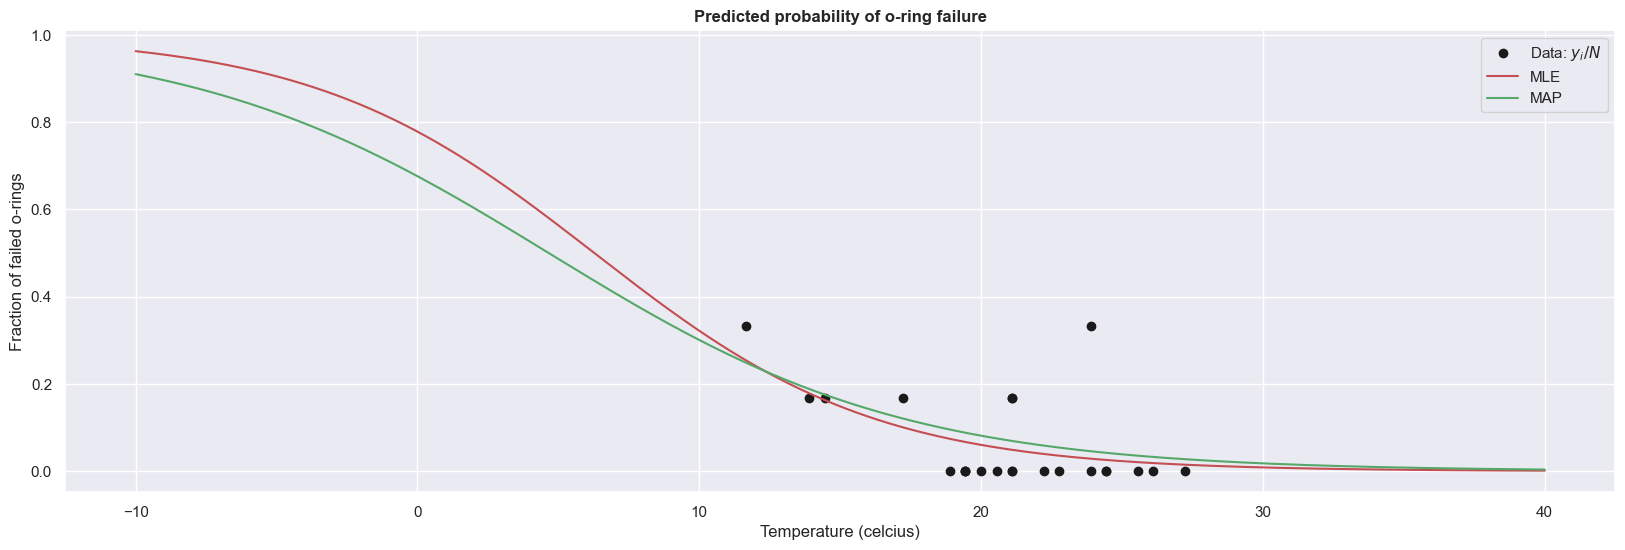

In [7]:
# data for predictions
temp_pred = np.linspace(-10, 40, 500)
x_pred = standardize(temp_pred)
N_pred = 6

# helper function for plotting data
def plot_data(ax=None, counts=True):
    if counts:
        ax.plot(t, y, 'mo', label='Data: $y_i$')
        ax.set(ylabel='Number of failed o-rings')
    else:
        ax.plot(t, y/N, 'ko', label='Data: $y_i/N$')
        ax.set(ylabel='Fraction of failed o-rings')
    ax.set(xlabel='Temperature (celcius)')
    ax.legend(loc='lower left')

# estimated functions for theta
theta_hat_MLE = lambda x: model.theta(x, alpha_MLE, beta_MLE)
theta_hat_MAP = lambda x: model.theta(x, alpha_MAP, beta_MAP)

# plot
fig, ax = plt.subplots(1, 1, figsize=(20, 6))
plot_data(ax, counts=False)
ax.plot(temp_pred, theta_hat_MLE(x_pred), 'r-', label='MLE')
ax.plot(temp_pred, theta_hat_MAP(x_pred), 'g-', label='MAP')
ax.legend()
ax.set_title('Predicted probability of o-ring failure', fontweight='bold')

**Approximating the posterior using a grid approximation**

Complete the implementation of the $\texttt{prep approximation}$-function below. Your task is to make sure that the $\texttt{probability grid}$-variable contains all the $\pi_{ij}$ defined above with the proper normalization.

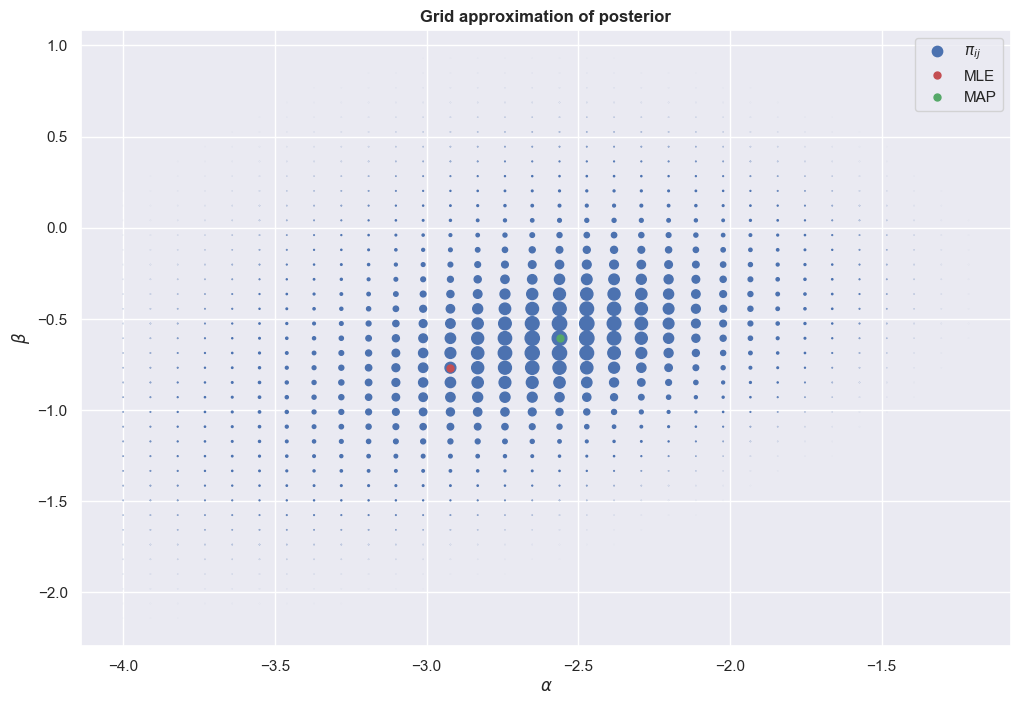

In [8]:
class GridApproximation2D(Grid2D):

    def __init__(self, alphas, betas, log_joint, threshold=1e-8, name="GridApproximation2D"):
        Grid2D.__init__(self, alphas, betas, log_joint, name)
        self.threshold = threshold
        self.prep_approximation()
        self.compute_marginals()
        self.sanity_check()
        
    def prep_approximation(self):
        
        # [num_alpha, num_beta]-sized matrix of the log joint evaluated on the grid 
        self.log_joint_grid = self.values
        self.log_joint_grid = self.log_joint_grid - np.max(self.log_joint_grid)

        # convert from log densities to probabilities density for each point on the grid 
        self.tilde_probabilities_grid = np.exp(self.log_joint_grid) 

        # compute normalization constant 
        self.Z = np.sum(self.tilde_probabilities_grid)      

        # [num_alpha, num_beta]-matrix of \pi_{ij}-values summing to 1.
        self.probabilities_grid = self.tilde_probabilities_grid/self.Z    

        # flatten for later convinience
        self.alphas_flat = self.alpha_grid.flatten()                                             # shape: [num_alpha*num_beta] = [num_outcomes]
        self.betas_flat = self.beta_grid.flatten()                                               # shape: [num_alpha*num_beta] = [num_outcomes]
        self.num_outcomes = len(self.alphas_flat)                                                # shape: scalar 
        self.probabilities_flat = self.probabilities_grid.flatten()                              # [num_outcomes]

    def compute_marginals(self):
        self.pi_alpha = self.probabilities_grid.sum(1)  
        self.pi_beta = self.probabilities_grid.sum(0)  

        # compute marginal distribution using sum rule
    def compute_expectation(self, f):
        """ computes expectation of f(alpha, beta) wrt. the grid approximation """
        return np.sum(f(self.alphas_flat, self.betas_flat)*self.probabilities_flat, axis=0)
    
    def sample(self, num_samples=1):
        """ generate num_samples from the grid approximation distribution """
        idx = np.random.choice(np.arange(self.num_outcomes), p=self.probabilities_flat, size=num_samples)
        return self.alphas_flat[idx], self.betas_flat[idx]

    def visualize(self, ax, scaling=8000, title='Grid approximation'):
        idx = self.probabilities_flat > self.threshold
        ax.scatter(self.alphas_flat[idx], self.betas_flat[idx], scaling*self.probabilities_flat[idx],label='$\pi_{ij}$')        
        ax.set(xlabel='$\\alpha$', ylabel='$\\beta$')
        ax.set_title(title, fontweight='bold')

    def sanity_check(self):
        assert self.probabilities_grid.shape == self.grid_size, "Probability grid does not have shape [num_alphas, num_betas] (self.grid_size). Check your implementation."
        assert np.all(self.probabilities_grid >= 0), "Not all values in probability grid are non-negative. Check your implementation."
        assert np.allclose(self.probabilities_grid.sum(), 1), "Values in probability grid do not sum to one. Check your implementation."

# grid
num_alpha, num_beta = 90, 100
alphas = np.linspace(-4, 4, num_alpha)
betas = np.linspace(-4, 4, num_beta)

# model
model = LogisticRegression(x, y, N, sigma2_alpha=1.0, sigma2_beta=1.0)

# construct grid approximation for posterior
post_approx = GridApproximation2D(alphas, betas, model.log_joint, name='Posterior')

# plot
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
post_approx.visualize(ax, title='Grid approximation of posterior')
ax.plot(alpha_MLE, beta_MLE, 'r.', label='MLE', markersize=10);
ax.plot(alpha_MAP, beta_MAP, 'g.', label='MAP', markersize=10);
ax.legend();

Go back up the class $\texttt{GridApproximation2D}$ and implemented the $\texttt{compute marginals}$-function. Use it to compute and plot the probability mass functions for the $\textbf{approximate posterior marginal distributions}$ $q(\alpha)$ and $q(\beta)$ as a function of $\alpha$ and $\beta$, respectively.

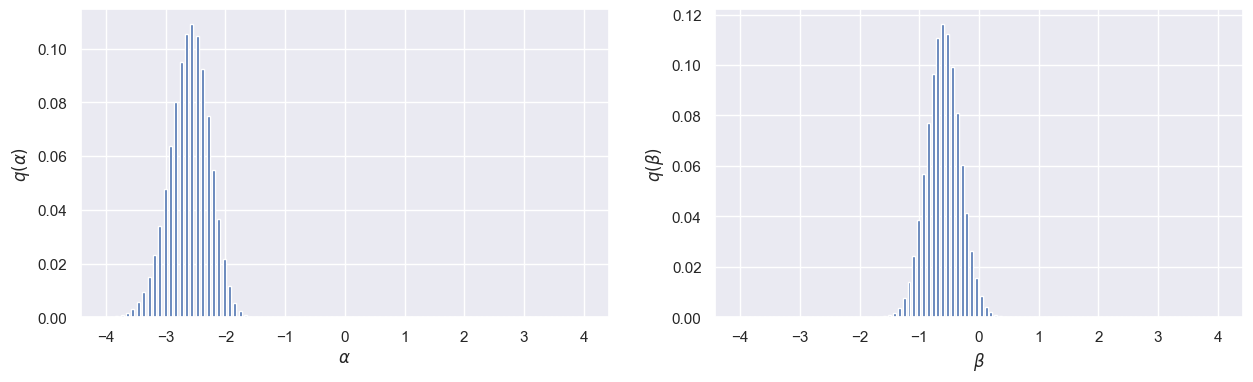

In [9]:
# plot
fig, ax = plt.subplots(1, 2, figsize=(15, 4))
ax[0].bar(post_approx.alphas, post_approx.pi_alpha, width=0.05)
ax[0].set(xlabel='$\\alpha$', ylabel='$q(\\alpha)$')
ax[1].bar(post_approx.betas, post_approx.pi_beta, width=0.05)
ax[1].set(xlabel='$\\beta$', ylabel='$q(\\beta)$');

Compute the posterior mean, standard deviation and 95% credibility interval for $\alpha$ and $\beta$ using the grid approximation by completing the implementation of $\texttt{DiscreteDistribution1D}$-class below. Use the figures from the previous task to verify that your results are (approximately) correct.

*Hints*:
- The mean of a discrete random variable X with PMF $P(X = x)$ is given by $\mathbb{E}\left[X\right] = \sum_{i} x_i P(X = x_i)$, where the sum is over all the possible outcomes of $X$.
- The variance of a discrete random variable X with PMF $P(X = x)$ is given by $\mathbb{V}\left[X\right] = \sum_{i} \left(x_i - \mathbb{E}\left[X\right]\right)^2 P(X = x_i)$, where the sum is over all the possible outcomes of $X$.
- A 95%-interval for a random variable $X$ is any interval $\left[\ell, u\right]$ such that $P(\ell \leq X \leq  u) \approx 0.95$. A central 95% percent interval is obtained by splitting the last 5\% of probability mass among the two tails, i.e. choose $\ell$ s.t. $P(\ell \leq X) \approx 0.025$ and $u$ s.t. $P(X\leq u) \approx 0.975$.  You can implement this in several ways, either by brute-force search or by first computing the quantile function. See Section 4.6.6 in Murphy1 for more details.

In [10]:

class DiscreteDistribution1D(object):

    def __init__(self, outcomes, probabilities, name='DiscreteDistribution'):
        """ represents discrete random variable X in terms of outcomes and probabilities """
        self.outcomes = outcomes
        self.probabilities = probabilities
        assert self.outcomes.shape == self.probabilities.shape
        self.name = name

    def CDF(self, x):
        """ P[X <= x] """
        idx = self.outcomes <= x
        return np.sum(self.probabilities[idx]) 
    
    def quantile(self, p):
        """ Q(p) = inf {x | p < CDF(x)} """
        cdf_values = np.cumsum(self.probabilities) 
        idx = np.where(np.logical_or(p < cdf_values, np.isclose(p, cdf_values)))[0]
        return np.min(self.outcomes[idx])
    
    @property
    def mean(self):
        """ return scalar corresponding to the mean of the discrete distribution """
        return np.sum(self.outcomes * self.probabilities)  
    
    @property
    def variance(self):
        """ return scalar corresponding to the variance of the discrete distribution """
        return np.sum((self.outcomes - self.mean)**2 * self.probabilities)  
    
    def central_interval(self, interval_size=95):
        """ return tuple (lower, upper) corresponding to the central interval of the discrete distribution """
        c = 1.-interval_size/100.
        return self.quantile(c/2), self.quantile(1-c/2)  
    
    def print_summary(self):
        print(f'Summary for {self.name}')
        print(f'\tMean:\t\t\t\t{self.mean:3.2f}')
        print(f'\tStd. dev.:\t\t\t{np.sqrt(self.variance):3.2f}')
        print(f'\t95%-credibility interval:\t[{self.central_interval()[0]:3.2f}, {self.central_interval()[1]:3.2f}]\n')


# example use and sanity sanity checks using classic six-sided die
outcomes, probs = np.arange(1,6+1), np.ones(6)/6
sixsided_die = DiscreteDistribution1D(outcomes, probs)
assert np.allclose(sixsided_die.mean, 3.5), f"The mean of a sixsided die should be 3.5, but the value was {sixsided_die.mean:3.2f}. Check your implementation."
assert np.allclose(sixsided_die.variance, 35/12), f"The variance of a sixsided die should be approximately 2.92, but the value was {sixsided_die.variance:3.2f}. Check your implementation."
assert np.allclose(sixsided_die.central_interval(95), (1, 6)), f"The (approximate) 95% central interval of a sixsided die should be (1,6), but the value was {sixsided_die.central_interval(95)}. Check your implementation."

# summarize posterior marginals for alpha and beta
post_alpha_marginal = DiscreteDistribution1D(post_approx.alphas, post_approx.pi_alpha, "posterior distribution of alpha")
post_beta_marginal = DiscreteDistribution1D(post_approx.betas, post_approx.pi_beta, "posterior distribution of beta")

post_alpha_marginal.print_summary()
post_beta_marginal.print_summary()


Summary for posterior distribution of alpha
	Mean:				-2.61
	Std. dev.:			0.33
	95%-credibility interval:	[-3.28, -2.02]

Summary for posterior distribution of beta
	Mean:				-0.60
	Std. dev.:			0.28
	95%-credibility interval:	[-1.17, -0.04]



# Week 3 Bayesian Linear regression

Compute the maximum likelihood solution (MLE), the MAP solution and the posterior mean for the slope and intercept. Plot all three points in the right-most panel above.

In [17]:
%matplotlib inline
import autograd.numpy as np
from scipy.optimize import minimize
from autograd import value_and_grad
import matplotlib.pyplot as plt
import seaborn as snb
from scipy.stats import multivariate_normal

snb.set_theme(font_scale=1.25)

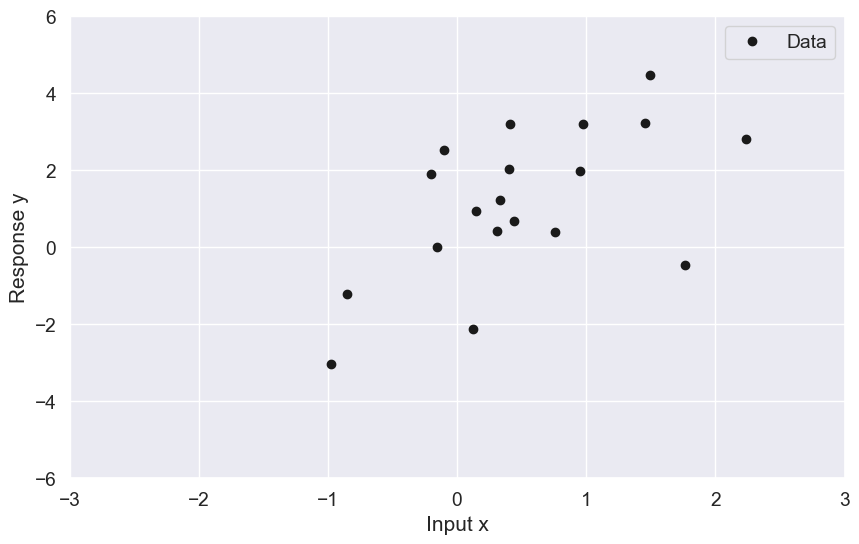

In [18]:
N = 20

xtrain = np.array([1.764, 0.4, 0.979, 2.241, 1.868, -0.977,  0.95, -0.151, -0.103, 0.411, 0.144, 1.454, 0.761, 0.122,
              0.444, 0.334, 1.494, -0.205,  0.313, -0.854])[:, None]
ytrain = np.array([-0.464, 2.024, 3.191, 2.812, 6.512, -3.022, 1.99, 0.009, 2.513, 3.194, 0.935, 3.216, 0.386, -2.118,
               0.674, 1.222, 4.481, 1.893, 0.422,  -1.209])[:, None]

# plot
def plot_toydata(ax):
    ax.plot(xtrain, ytrain, 'k.', label='Data', markersize=12)
    ax.set(xlabel='Input x', ylabel='Response y', xlim=(-3, 3), ylim=(-6, 6))
    ax.legend()


fig, ax = plt.subplots(1,1, figsize=(10, 6))
plot_toydata(ax)

In [19]:
def plot_distribution(ax, x, y, density_fun, color=None, visibility=1, label=None, title=None, num_points = 100):
    
    # create grid for parameters (a,b)
    a_array = np.linspace(-4, 4, num_points)
    b_array = np.linspace(-4, 4, num_points)
    A_array, B_array = np.meshgrid(a_array, b_array)   
    
    # form array with all combinations of (a,b) in our grid
    AB = np.column_stack((A_array.ravel(), B_array.ravel()))
    
    # evaluate density for every point in the grid and reshape bac
    Z = density_fun(x, y, A_array.ravel(), B_array.ravel())
    Z = Z.reshape((len(a_array), len(b_array)))
    
    # plot contour  
    ax.contour(a_array, b_array, np.exp(Z), colors=color, alpha=visibility)
    ax.plot([-1000], [-1000], color=color, label=label)
    ax.set(xlabel='slope', ylabel='intercept', xlim=(-4, 4), ylim=(-4, 4), title=title)

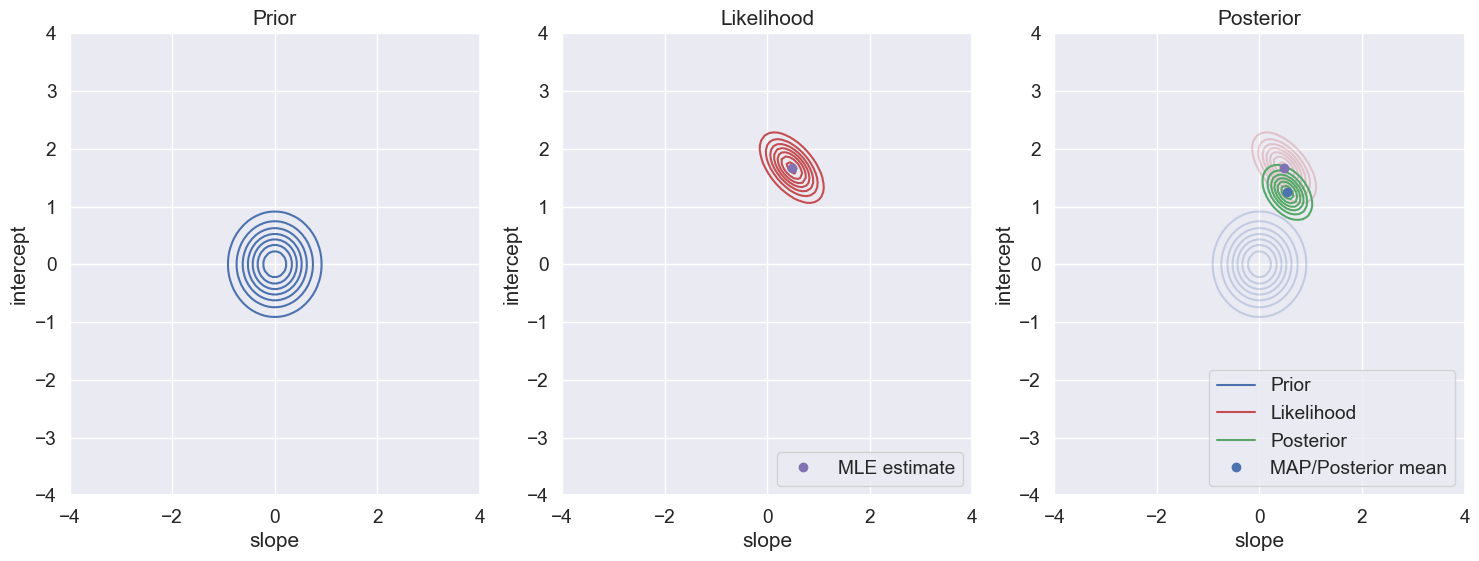

In [20]:
# hyperparameters
alpha = 5
beta = 3/4

# log normal probability density function
log_npdf = lambda x, m, v: -0.5*np.log(2*np.pi*v) -0.5*(x-m)**2/v 

# simple function for making predictions
predict = lambda x, a, b: a + b*x

def log_prior(x, y, a, b):
    return multivariate_normal.logpdf(np.column_stack([a, b]), np.array([0, 0]), 1/alpha*np.identity(2))

def log_likelihood(x, y, a, b):
    return np.sum(log_npdf(y, predict(x, a, b), 1/beta), 0)

def log_posterior(x, y, a, b):
    return log_prior(x, y, a, b) + log_likelihood(x, y, a, b)

def design_matrix(x):
    return np.column_stack((np.ones(len(x)), x))

# plot
fig, axes = plt.subplots(1, 3, figsize=(18,6))
plot_distribution(axes[0], xtrain, ytrain, density_fun=log_prior, color='b', title='Prior')
plot_distribution(axes[1], xtrain, ytrain, density_fun=log_likelihood, color='r', title='Likelihood')
plot_distribution(axes[2], xtrain, ytrain, density_fun=log_prior, color='b', visibility=0.25, label='Prior')
plot_distribution(axes[2], xtrain, ytrain, density_fun=log_likelihood, color='r', visibility=0.25, label='Likelihood')
plot_distribution(axes[2], xtrain, ytrain, density_fun=log_posterior, color='g', label='Posterior', title='Posterior')

##################################################################
# Insert your solution here
##################################################################

Phi_train = design_matrix(xtrain)

# compute maximum likelihood estimator for w
w_MLE = np.linalg.solve(Phi_train.T@Phi_train, Phi_train.T@ytrain).ravel()

# compute MAP/posterior mean
w_MAP = (beta*np.linalg.solve(alpha*np.identity(2) + beta*(Phi_train.T@Phi_train), Phi_train.T)@ytrain).ravel()

# plot
axes[1].plot(w_MLE[0], w_MLE[1], 'mo', label='MLE estimate')
axes[2].plot(w_MLE[0], w_MLE[1], 'mo')
axes[2].plot(w_MAP[0], w_MAP[1], 'bo', label='MAP/Posterior mean')

##################################################################
# end of solution
##################################################################

axes[1].legend(loc='lower right');
axes[2].legend(loc='lower right');


**Implementing the posterior distribution**

In [21]:
class BayesianLinearRegression(object):
    
    def __init__(self, Phi, y, alpha=1., beta=1.):
        
        # store data and hyperparameters
        self.Phi, self.y = Phi, y
        self.N, self.D = Phi.shape
        self.alpha, self.beta = alpha, beta
        
        # compute posterior distribution
        self.m, self.S = self.compute_posterior(alpha, beta)
        self.log_marginal_likelihood = self.compute_marginal_likelihood(alpha, beta)

        # perform sanity check of shapes/dimensions
        self.check_dimensions()

    def check_dimensions(self):
        D = self.D
        assert self.m.shape == (D, 1), f"Wrong shape for posterior mean.\nFor D = {D}, the shape of the posterior mean must be ({D}, 1), but the actual shape is ({self.m.shape})"
        assert self.S.shape == (D, D), f"Wrong shape for posterior covariance.\nFor D = {D}, the shape of the posterior mean must be ({D}, {D}), , but the actual shape is ({self.S.shape})"
        # assert self.log_marginal_likelihood.shape == (), f"Wrong shape for log_marginal_likelihood.\nThe shape of must be (), but the actual shape is ({self.log_marginal_likelihood.shape})"

    def compute_posterior(self, alpha, beta):
        """ computes the posterior N(w|m, S) and return m, S.
            Shape of m and S must be (D, 1) and (D, D), respectively  """
        
        #############################################
        # Insert your solution here
        #############################################
        
        # compute prior and posterior precision 
        inv_S0 = alpha*np.identity(self.D)
        A = inv_S0 + beta*(self.Phi.T@self.Phi)
        
        # compute mean and covariance 
        m = beta*np.linalg.solve(A, self.Phi.T)@self.y   # eq. (2) above
        S = np.linalg.inv(A)                             # eq. (1) above
        
        #############################################
        # End of solution
        #############################################
        return m, S
      
    def generate_prior_samples(self, num_samples):
        """ generate samples from the prior  """
        return multivariate_normal.rvs(np.zeros(len(self.m)), (1/self.alpha)*np.identity(len(self.m)), size=num_samples)
    
    def generate_posterior_samples(self, num_samples):
        """ generate samples from the posterior  """
        return multivariate_normal.rvs(self.m.ravel(), self.S, size=num_samples)
    
    def predict_f(self, Phi):
        """ computes posterior mean (mu_f) and variance (var_f) of f(phi(x)) for each row in Phi-matrix.
            If Phi is a [N, D]-matrix, then the shapes of both mu_f and var_f must be (N,)
            The function returns (mu_f, var_f)
        """
        mu_f = (Phi@self.m).ravel()   
        var_f = np.diag(Phi@self.S@Phi.T)   
        
        # check dimensions before returning values
        assert mu_f.shape == (Phi.shape[0],), "Shape of mu_f seems wrong. Check your implementation"
        assert var_f.shape == (Phi.shape[0],), "Shape of var_f seems wrong. Check your implementation"
        return mu_f, var_f
        
    def predict_y(self, Phi):
        """ returns posterior predictive mean (mu_y) and variance (var_y) of y = f(phi(x)) + e for each row in Phi-matrix.
            If Phi is a [N, D]-matrix, then the shapes of both mu_y and var_y must be (N,).
            The function returns (mu_y, var_y)
        """
        mu_f, var_f = self.predict_f(Phi)
        mu_y = mu_f                  
        var_y = var_f + 1/self.beta  

        # check dimensions before returning values
        assert mu_y.shape == (Phi.shape[0],), "Shape of mu_y seems wrong. Check your implementation"
        assert var_y.shape == (Phi.shape[0],), "Shape of var_y seems wrong. Check your implementation"
        return mu_y, var_y
        
    
    def compute_marginal_likelihood(self, alpha, beta):
        """ computes and returns log marginal likelihood p(y|alpha, beta) """
        inv_S0 = alpha*np.identity(self.D)
        A = inv_S0 + beta*(self.Phi.T@self.Phi)
        m = beta*np.linalg.solve(A, self.Phi.T)@self.y   # (eq. 3.53 in Bishop)
        S = np.linalg.inv(A)                             # (eq. 3.54 in Bishop)
        Em = beta/2*np.sum((self.y - self.Phi@m)**2) + alpha/2*np.sum(m**2)
        return self.D/2*np.log(alpha) + self.N/2*np.log(beta) - Em - 0.5*np.linalg.slogdet(A)[1] - self.N/2*np.log(2*np.pi)
         

    def optimize_hyperparameters(self):
        # optimizes hyperparameters using marginal likelihood
        theta0 = np.array((np.log(self.alpha), np.log(self.beta)))
        def negative_marginal_likelihood(theta):
            alpha, beta = np.exp(theta[0]), np.exp(theta[1])
            return -self.compute_marginal_likelihood(alpha, beta)

        result = minimize(value_and_grad(negative_marginal_likelihood), theta0, jac=True)

        # store new hyperparameters and recompute posterior
        theta_opt = result.x
        self.alpha, self.beta = np.exp(theta_opt[0]), np.exp(theta_opt[1])
        self.m, self.S = self.compute_posterior(self.alpha, self.beta)
        self.log_marginal_likelihood = self.compute_marginal_likelihood(self.alpha, self.beta)

# sanity check of implementation
model = BayesianLinearRegression(0.5*np.ones((2,2)), 2*np.ones((2, 1)), alpha=0.5, beta=0.5)       
assert np.allclose(model.m, np.array([1, 1])), "Something seems to be wrong with your implementation of the posterior mean. Please check your implementation." 
assert np.allclose(model.S, np.array([[1.5, -0.5], [-0.5, 1.5]])), "Something seems to be wrong with your implementation of the posterior covariance. Please check your implementation." 

# fit model to toy dataset
Phi_train = design_matrix(xtrain)
model = BayesianLinearRegression(Phi_train, ytrain)


Report the posterior mean and a 95\% credibility interval for the intercept and slope for $\alpha=\beta=1$. Compare your estimate to the plot of the data above. Do the results look reasonable?

*Hint: There are several ways to approach this. E.g. for a Gaussian random variable $\mathcal{N}(\mu, \sigma^2)$, the interval $\left[\mu - 1.96\sigma, \mu + 1.96\sigma\right]$ contains approximately 95\% of its probability mass.*

In [22]:
##############################################
# Your solution goes here
##############################################

diag_S = np.diag(model.S)
lower = model.m.ravel() - 1.96*np.sqrt(diag_S)
upper = model.m.ravel() + 1.96*np.sqrt(diag_S)

for i, name in zip(range(2), ['Intercept', 'Slope']): 
    print(f'{name}')
    print(f'\tPost. Mean\t: {model.m[i,0]:3.2f}')
    print(f'\t95%-Interval\t: [{lower[i]:3.2f}-{upper[i]:3.2f}]')

##############################################
# End of solution
##############################################

Intercept
	Post. Mean	: 0.51
	95%-Interval	: [0.00-1.01]
Slope
	Post. Mean	: 1.58
	95%-Interval	: [1.09-2.08]


### The posterior predictive distribution

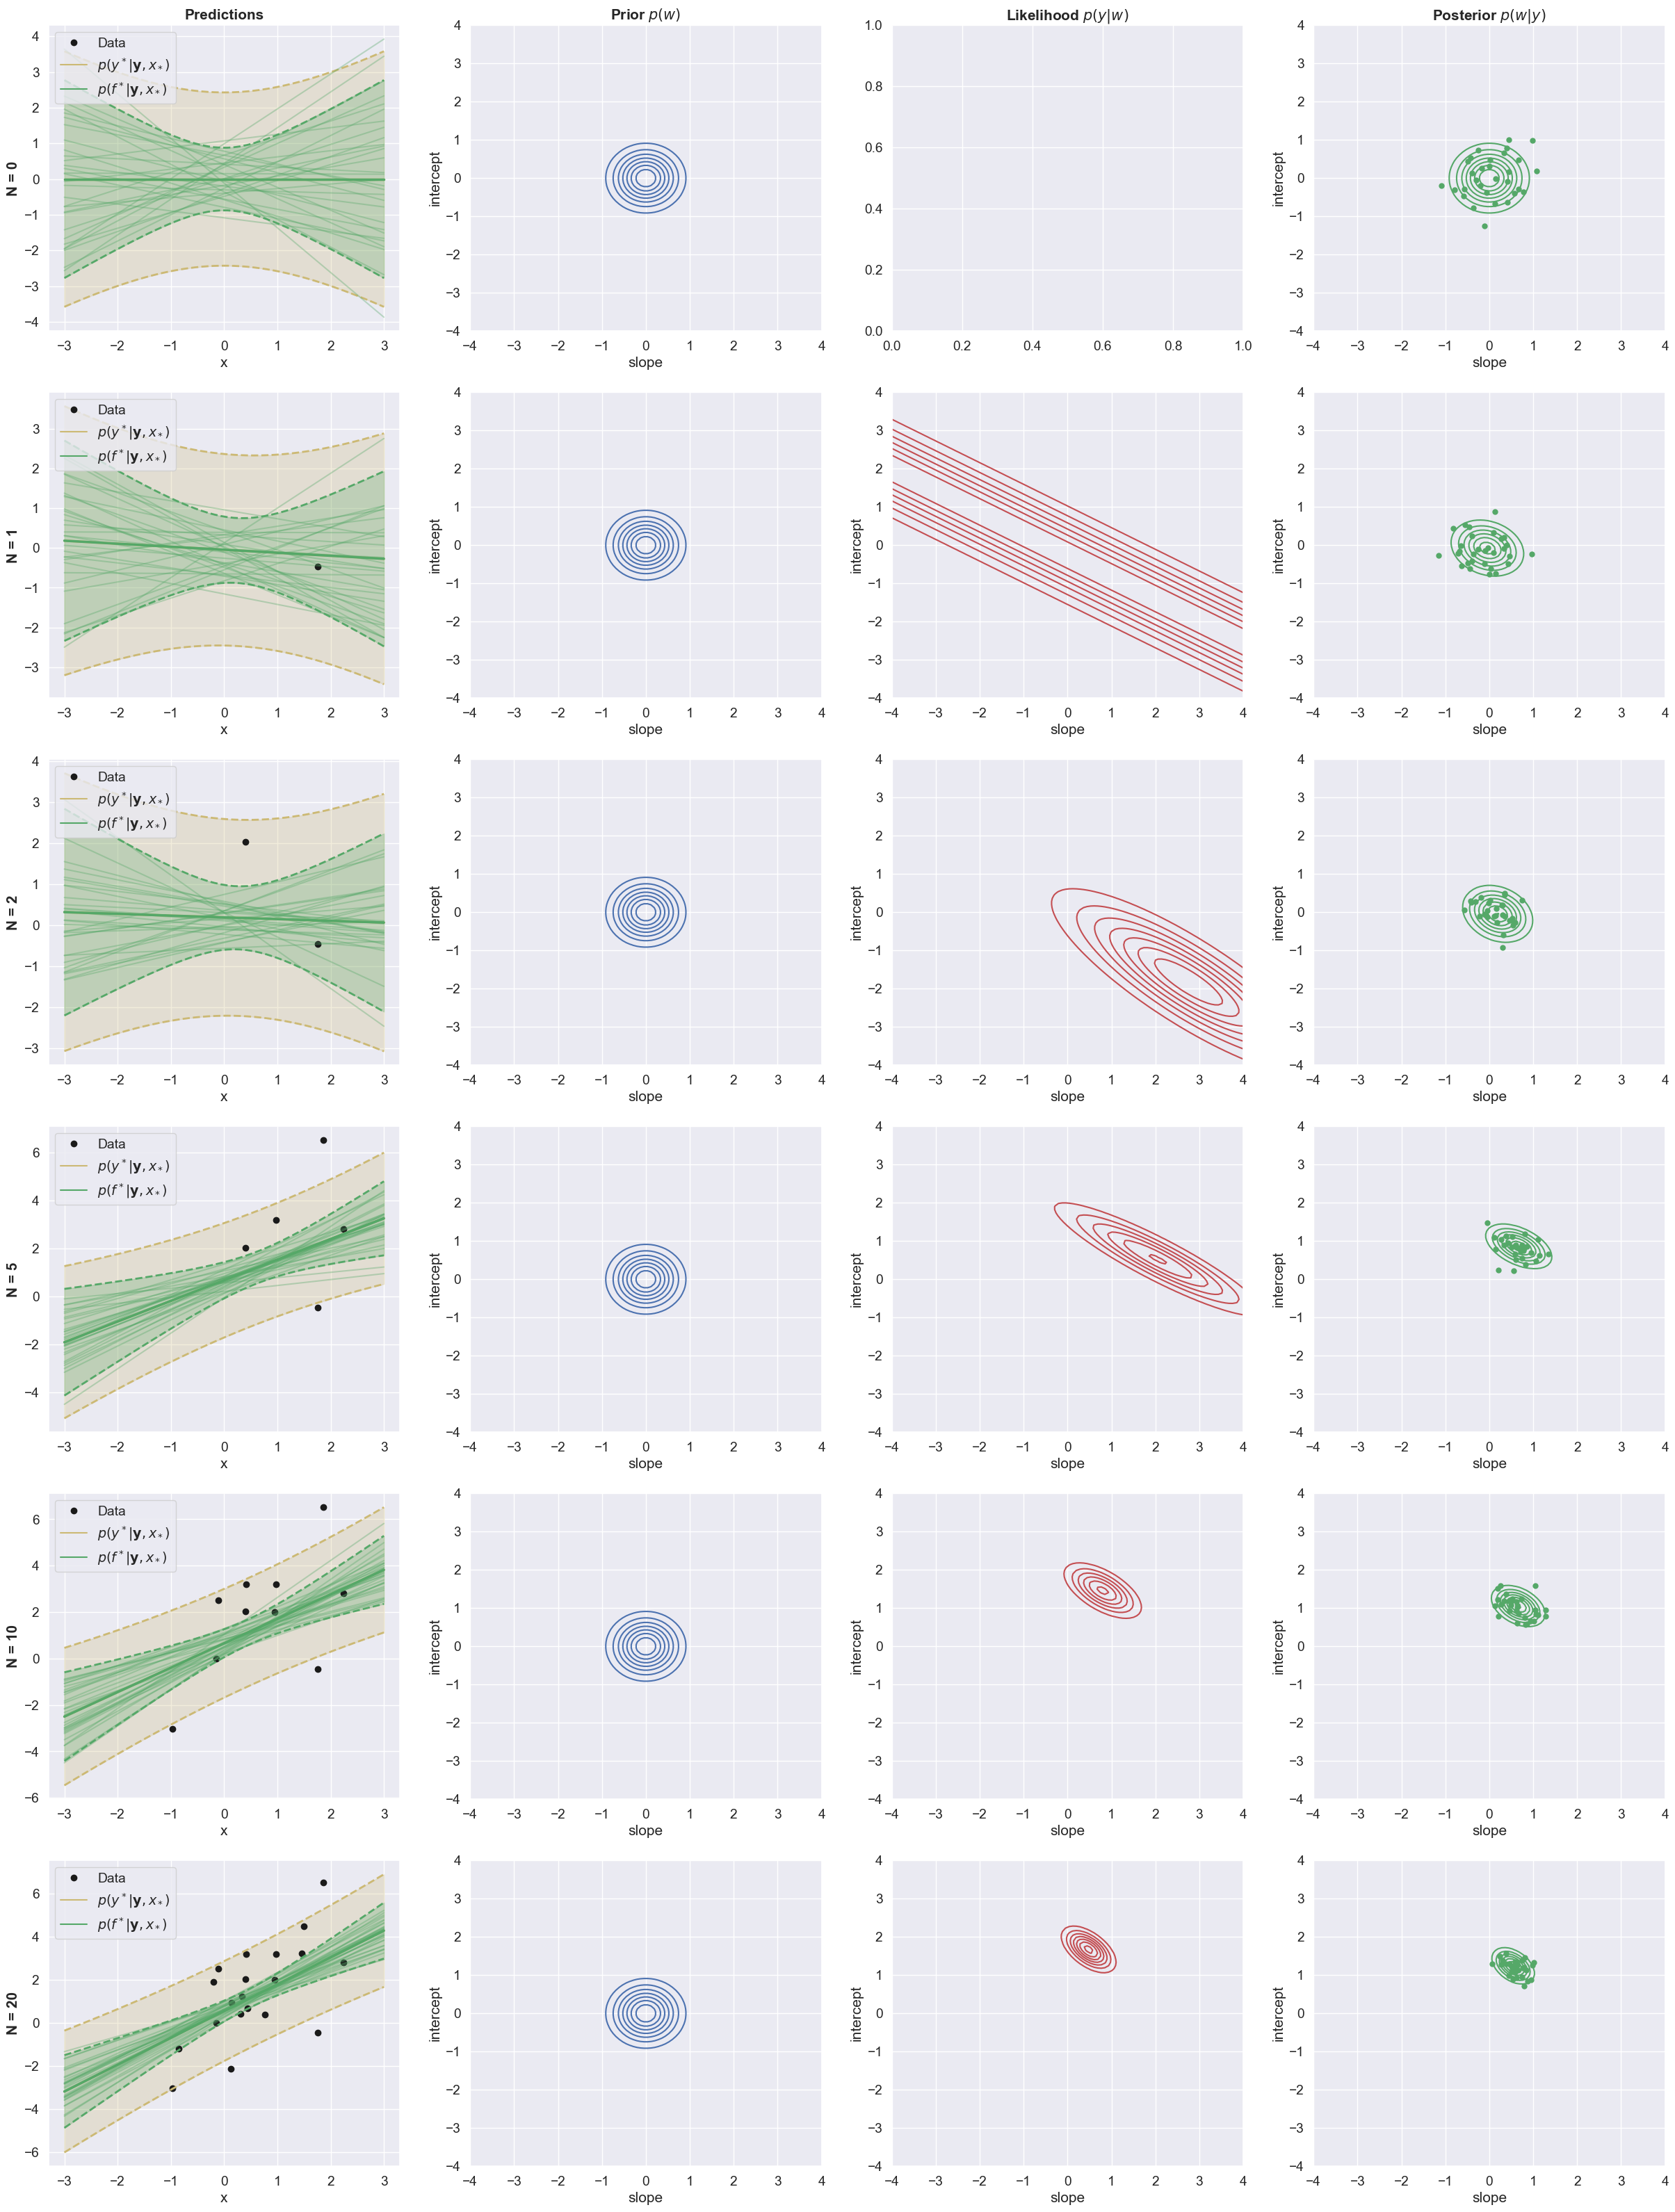

In [23]:
# helper function for visualizing predictions
def plot_predictions(ax, x, mu, var, color='r', visibility=0.5, label=None):
    lower, upper = mu - 1.96*np.sqrt(var), mu + 1.96*np.sqrt(var)
    ax.plot(x, mu, color=color, label=label)
    ax.plot(x, lower, color=color, linewidth=2, linestyle='--')
    ax.plot(x, upper, color=color, linewidth=2, linestyle='--')
    ax.fill_between(x.ravel(), lower.ravel(), upper.ravel(), color=color, alpha=visibility)
    ax.plot(x, mu, '-', color=color, label="", linewidth=2.5)
    
# fix seed
np.random.seed(123)

# fix hyperparameters
alpha = 5
beta = 3/4

# num posterior samples to plot
num_samples = 30

# design matrices
xpred = np.linspace(-3, 3, 50)[:, None]
Phi_train = design_matrix(xtrain)
Phi_pred = design_matrix(xpred)

fig, axes = plt.subplots(6, 4, figsize=(30, 40))    
for idx_n, n in enumerate([0, 1, 2, 5, 10, 20]):
    
    # compute posterior of regression weights 
    model = BayesianLinearRegression(Phi_train[:n, :], ytrain[:n, :], alpha, beta)
    w_samples = model.generate_posterior_samples(num_samples=num_samples)
    
    # split samples in a and b computes
    a_samples, b_samples = w_samples[:, 0], w_samples[:, 1]
    
    # computer posterior function values for f and y
    mu_f, var_f = model.predict_f(Phi_pred)
    mu_y, var_y = model.predict_y(Phi_pred)
    
    # plot in data space
    axes[idx_n, 0].plot(xtrain[:n, :], ytrain[:n, :], 'k.', markersize=12, label='Data')
    plot_predictions(axes[idx_n, 0], xpred, mu_y, var_y, visibility=0.25, color='y', label='$p(y^*|\mathbf{y}, x_*)$')
    plot_predictions(axes[idx_n, 0], xpred, mu_f, var_f, visibility=0.25, color='g', label='$p(f^*|\mathbf{y}, x_*)$')
    axes[idx_n, 0].set_ylabel('N = %d' % n, fontweight='bold')    
    for i, (ai, bi) in enumerate(zip(a_samples, b_samples)):
        axes[idx_n, 0].plot(xpred, predict(xpred, ai, bi), 'g-', alpha=0.35)
        
    axes[idx_n, 0].legend(loc='upper left')
    axes[idx_n, 0].set(xlabel='x')
    
    # plot prior
    plot_distribution(axes[idx_n, 1], xtrain[:n, :], ytrain[:n, :], density_fun=log_prior, color='b')
    
    # plot likelihood
    if n > 0:
        plot_distribution(axes[idx_n, 2], xtrain[:n, :], ytrain[:n, :], density_fun=log_likelihood, color='r')
        
    # plot posterior
    plot_distribution(axes[idx_n, 3], xtrain[:n, :], ytrain[:n, :], density_fun=log_posterior, color='g')
    axes[idx_n, 3].plot(a_samples, b_samples, 'g.', markersize=10)
        
    
axes[0, 0].set_title('Predictions', fontweight='bold');
axes[0, 1].set_title('Prior $p(w)$', fontweight='bold');
axes[0, 2].set_title('Likelihood $p(y|w)$', fontweight='bold');
axes[0, 3].set_title('Posterior $p(w|y)$', fontweight='bold');

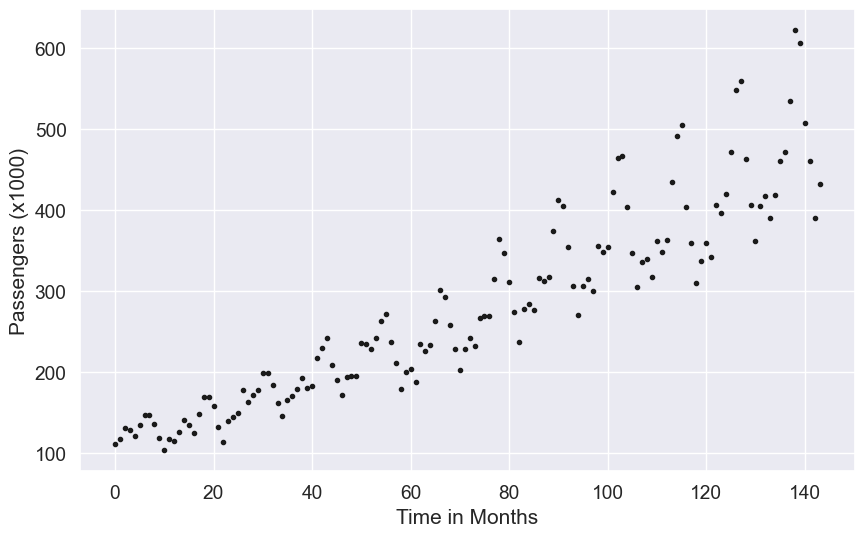

In [24]:
passengers = np.genfromtxt('./AirPassengers.csv', skip_header=1, usecols=1, delimiter=',')[:, None]
months = np.arange(0, len(passengers))[:, None]

fig, ax = plt.subplots(1, 1, figsize=(10, 6))
ax.plot(months, passengers, 'k.')
ax.set_xlabel('Time in Months')
ax.set_ylabel('Passengers (x1000)');

N      = 144
Ntrain = 110
Ntest  = 34


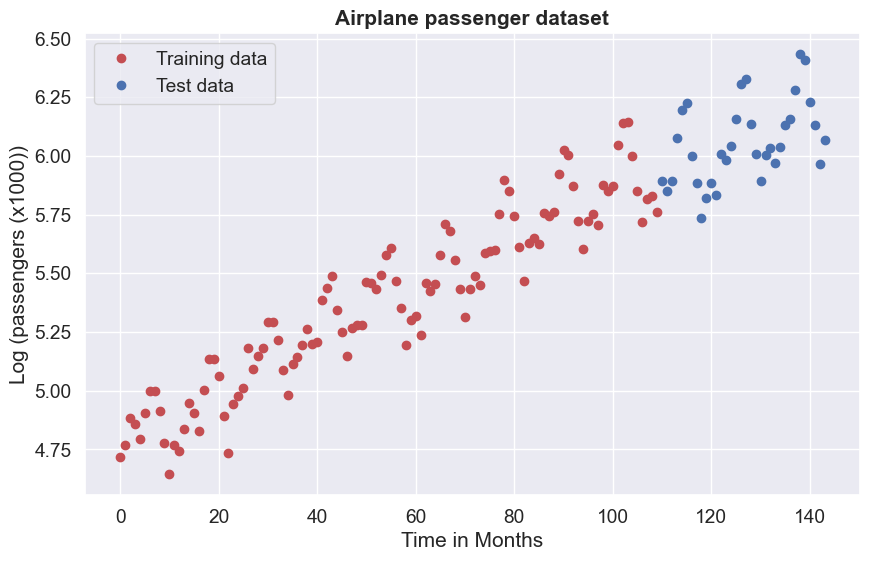

In [25]:
# log transform
y = np.log(passengers)

# split into  training and test
N = len(y)
Ntrain = 110
Ntest = N - Ntrain

x = np.arange(len(months))
xtrain = x[:Ntrain]
xtest = x[Ntrain:]

ytrain = y[:Ntrain]
ytest = y[Ntrain:]

print('N      = %d' % N)
print('Ntrain = %d' % Ntrain)
print('Ntest  = %d' % Ntest)


def plot_data(ax):
    ax.plot(xtrain, ytrain, 'ro', label='Training data')
    ax.plot(xtest, ytest, 'bo', label='Test data')
    ax.set_xlabel('Time in Months')
    ax.set_ylabel('Log (passengers (x1000))');
    ax.legend()
    ax.set_title('Airplane passenger dataset', fontweight='bold')

fig, ax = plt.subplots(1, 1, figsize=(10, 6))
plot_data(ax)
    



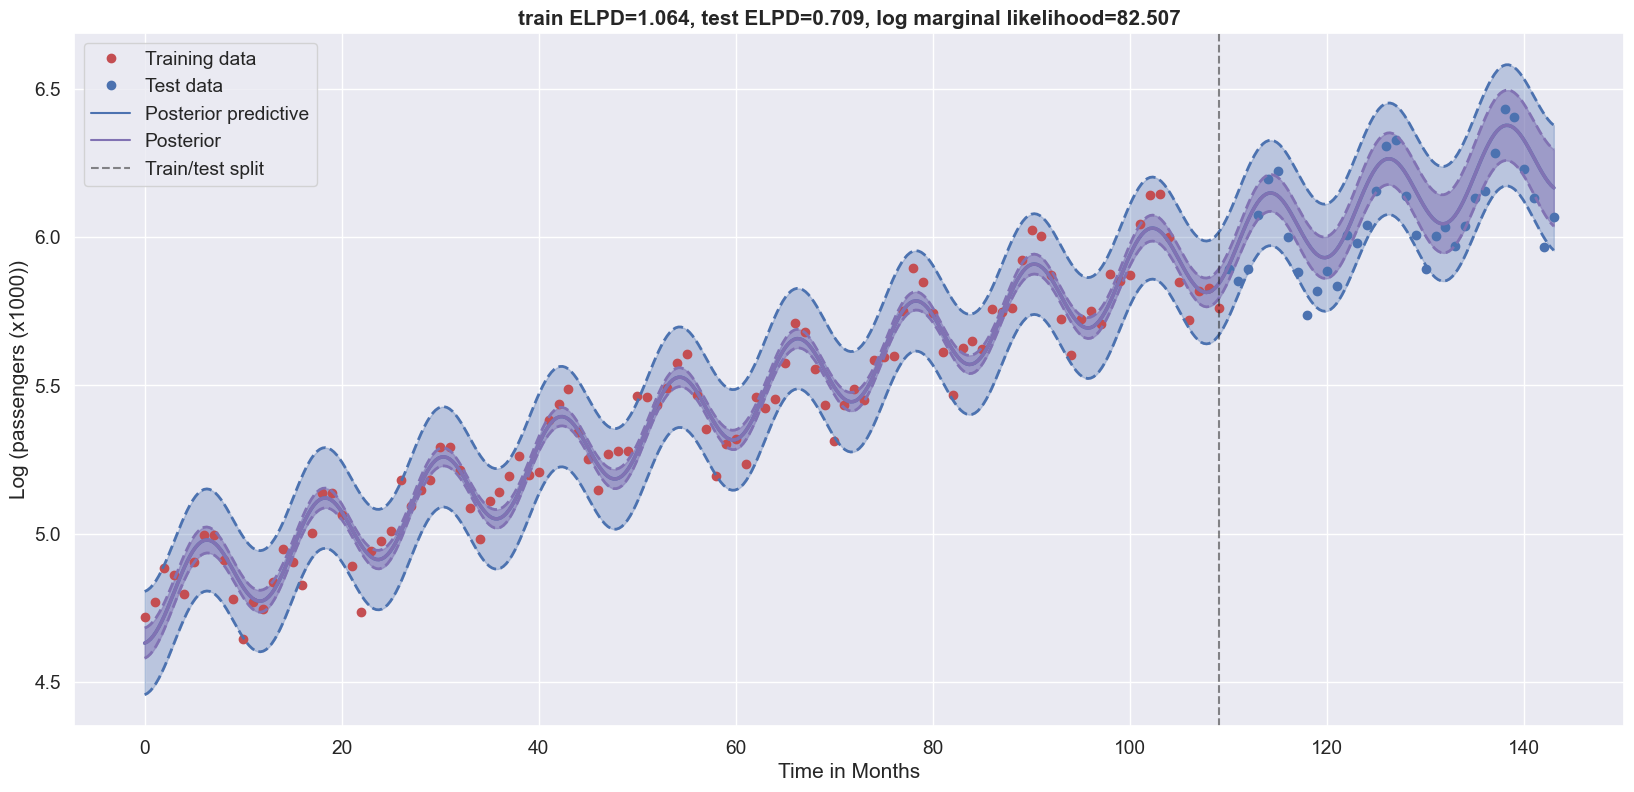

In [26]:
# we use the expected log predictive distribution as performance metric
def compute_elpd(y, mu, s2):
    """" y is a vector of observed values, and mu and s2 are the mean and variances of the posterior predictive distribution, respectively. """
    return np.mean(log_npdf(y.ravel(), mu.ravel(), s2.ravel()))

# Creates design matrix Phi based on input
def design_matrix(x):
    #return np.column_stack((np.ones(len(x)), x,   ))                                
    #return np.column_stack((np.ones(len(x)), x, x**2))
    return np.column_stack((np.ones(len(x)), x,   x**2, np.cos(2*np.pi*x/12)))       

# prepare input data
xpred = np.linspace(0, 143, 500)
Phi_train = design_matrix(xtrain)
Phi_test = design_matrix(xtest)
Phi_pred = design_matrix(xpred)

# fit model
model = BayesianLinearRegression(Phi_train, ytrain, alpha=1, beta=1)
model.optimize_hyperparameters() 
logZ = model.log_marginal_likelihood

# make predictions for plotting
ypred_mu, ypred_s2 = model.predict_f(Phi_pred)
tpred_mu, tpred_s2 = model.predict_y(Phi_pred)

# make predictions for training and test set & evaluate performance metrics
ytrain_mu, ytrain_s2 = model.predict_y(Phi_train)
ytest_mu, ytest_s2 = model.predict_y(Phi_test)
train_elpd = compute_elpd(ytrain, ytrain_mu, ytrain_s2)
test_elpd = compute_elpd(ytest, ytest_mu, ytest_s2)

# plot
fig, ax = plt.subplots(1, 1, figsize=(20,9))
plot_data(ax)
plot_predictions(ax, xpred, tpred_mu, tpred_s2, color='b', label='Posterior predictive', visibility=0.3)
plot_predictions(ax, xpred, ypred_mu, ypred_s2, color='m', label='Posterior')
ax.set_title('train ELPD=%4.3f, test ELPD=%4.3f, log marginal likelihood=%4.3f' % (train_elpd, test_elpd, logZ), fontweight='bold');
ax.axvline(xtrain[-1], color='k', linestyle='--', alpha=0.5, label='Train/test split')
ax.legend()

Compute and visualize the posterior and the posterior predictive distribution for the logarithm of the number of customers after 145 months?

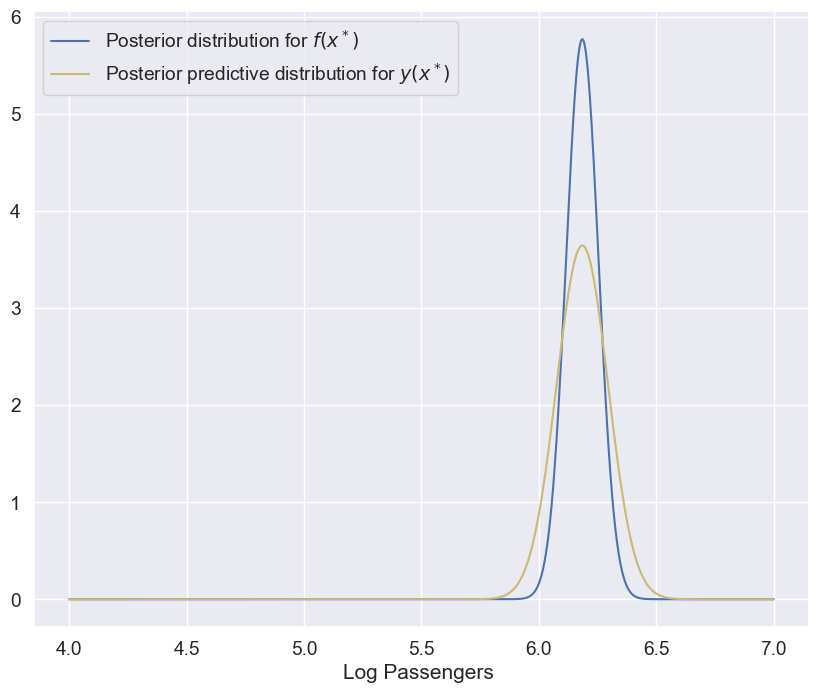

In [27]:
xstar = 145
Phi_star = design_matrix(np.array([xstar]))

fstar_mu, fstar_s2 = model.predict_f(Phi_star)
ystar_mu, ystar_s2 = model.predict_y(Phi_star)

fs = np.linspace(4, 7, 1000)
ys = np.linspace(4, 7, 1000)

npdf = lambda x, m, v: np.exp(-(x-m)**2/(2*v))/np.sqrt(2*np.pi*v)

fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(ys, npdf(ys, fstar_mu, fstar_s2), label='Posterior distribution for $f(x^*)$', color='b')
ax.plot(ys, npdf(ys, ystar_mu, ystar_s2), label='Posterior predictive distribution for $y(x^*)$', color='y')
ax.legend(loc='upper left')
ax.set(xlabel='Log Passengers ');


Compute the predictive distribution for the number of passengers instead of the logarithm of the number of passengers. 

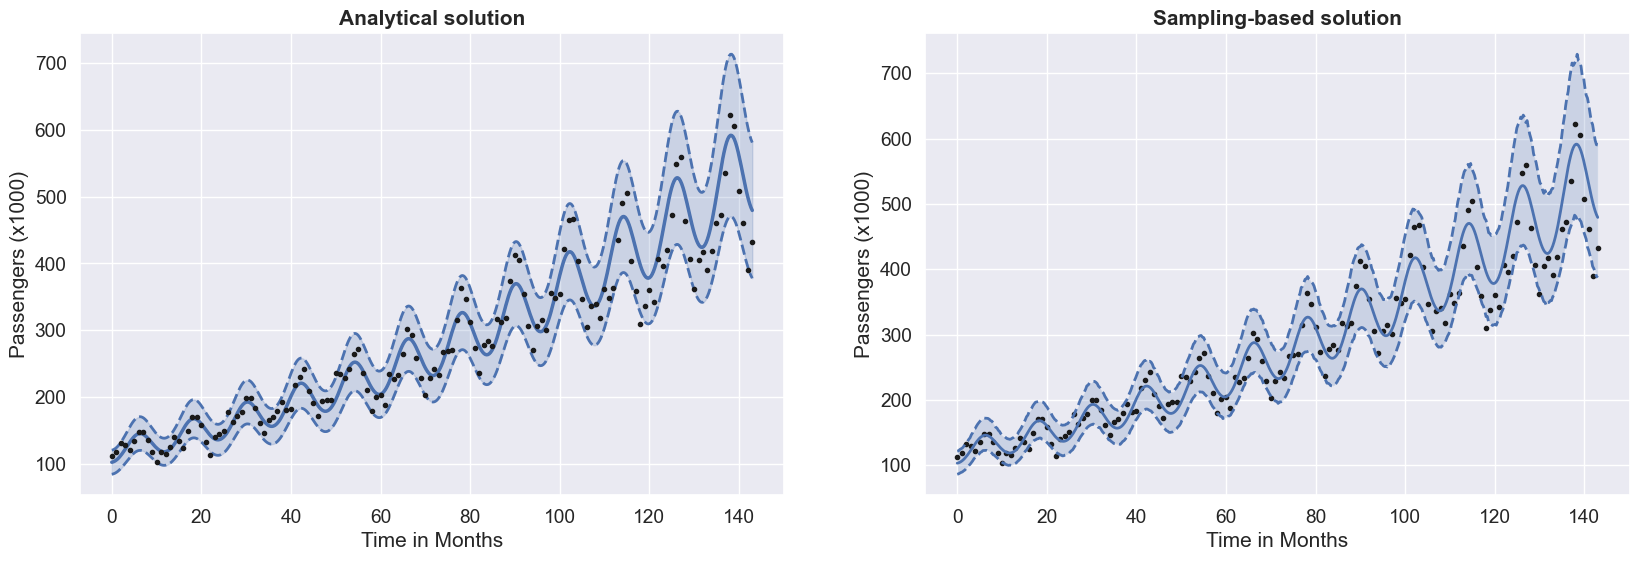

In [28]:
# prepare data and predict mean and variance for t(x)
ypred_mu, ypred_s2 = model.predict_y(Phi_pred)

################################################
# Analytical solution via log-normal 
################################################
# compute mean and variance of exp(t(x))
lognormal_mean = lambda m, v: np.exp(m + 0.5*v)
lognormal_var = lambda m, v: (np.exp(v) - 1)*np.exp(2*m + v)
exp_y_mu = lognormal_mean(ypred_mu.ravel(), ypred_s2.ravel()) 
exp_y_s2 = lognormal_var(ypred_mu.ravel(), ypred_s2.ravel()) 


################################################
# Sampling-based solution
################################################

# generate samples from posterior predictive distribution for y
num_samples = 5000
y_samples = np.random.normal(ypred_mu, np.sqrt(ypred_s2), size=(num_samples, len(ypred_mu)))

# transform all samples by exponentialing
exp_y_samples = np.exp(y_samples)

# estimatepercentiles
lower = np.percentile(exp_y_samples, 2.5, axis=0)
upper = np.percentile(exp_y_samples, 97.5, axis=0)



# plot analytical solution
fig, ax = plt.subplots(1, 2, figsize=(20, 6))
plot_predictions(ax[0], xpred, exp_y_mu, exp_y_s2, color='b', visibility=0.2)
ax[0].plot(months, passengers, 'k.')
ax[0].set_xlabel('Time in Months')
ax[0].set_ylabel('Passengers (x1000)')
ax[0].set_title('Analytical solution', fontweight='bold')


# plot sampling-based solution
ax[1].plot(months, passengers, 'k.')
ax[1].fill_between(xpred, lower, upper, alpha=0.2)
ax[1].plot(xpred, exp_y_mu, 'b-', linewidth=2)
ax[1].plot(xpred, lower, 'b--', xpred, upper, 'b--', linewidth=2)
ax[1].set_xlabel('Time in Months')
ax[1].set_ylabel('Passengers (x1000)')
ax[1].set_title('Sampling-based solution', fontweight='bold');


# Week 4 pobabilistic methods for classification

In [1]:
%matplotlib inline
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
import seaborn as snb

from scipy.optimize import minimize

from scipy.stats import multivariate_normal as mvn
from scipy.stats import beta as beta_dist
from scipy.stats import binom as binom_dist
from scipy.stats import norm as norm_dist

from mpl_toolkits.axes_grid1 import make_axes_locatable

snb.set_style('darkgrid')
snb.set_theme(font_scale=1.)

def add_colorbar(im, fig, ax):
    divider = make_axes_locatable(ax)
    cax = divider.append_axes('right', size='5%', pad=0.05)
    fig.colorbar(im, cax=cax, orientation='vertical')

Shape of Itrain: (197, 784)
Shape of Xtrain: (197, 2)


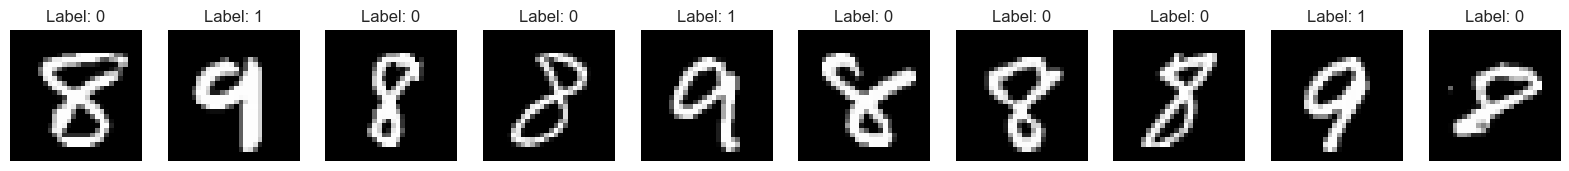

In [30]:
# read data
data = np.load('./mnist_subset_89.npz')
Itrain, Itest  = data['Itrain'], data['Itest']
Xtrain, Xtest = data['Xtrain'], data['Xtest']
ytrain, ytest = data['ytrain'], data['ytest']
digits = data['digits']

fig, ax = plt.subplots(1, 10, figsize=(20, 6))
for idx_plot, i in enumerate(np.random.choice(range(len(Xtrain)), size=10)):
    ax[idx_plot].imshow(Itrain[i].reshape((28, 28)), cmap=plt.cm.gray)
    ax[idx_plot].set_title('Label: %d' % ytrain[i])
    ax[idx_plot].axis('off')

print('Shape of Itrain:', Itrain.shape)
print('Shape of Xtrain:', Xtrain.shape)

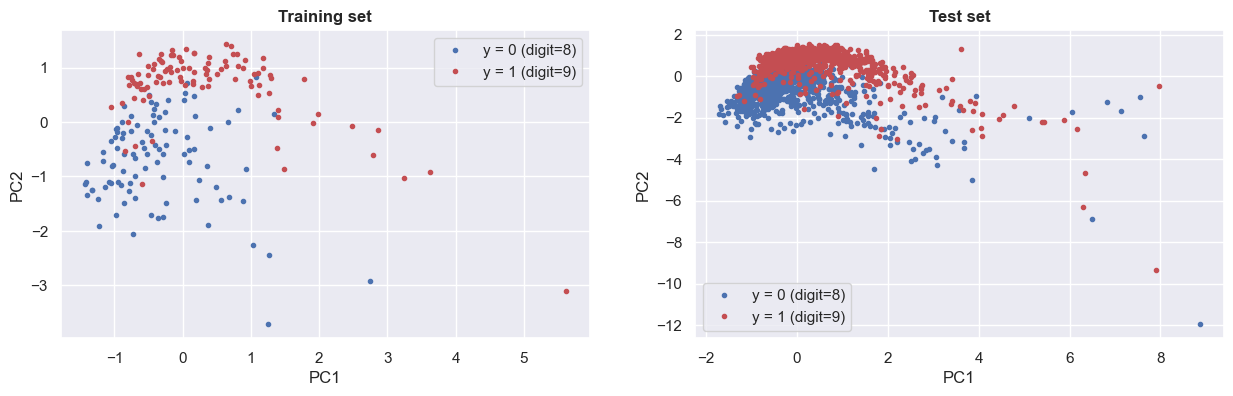

In [31]:
def plot_data(ax, X, y, alpha=0.8, title=None):

    ax.plot(X[y==0, 0], X[y==0, 1], 'b.', label='y = 0 (digit=8)')
    ax.plot(X[y==1, 0], X[y==1, 1], 'r.', label='y = 1 (digit=9)')
    ax.set(xlabel='PC1', ylabel='PC2')
    ax.legend()
    

    if title:
        ax.set_title(title, fontweight='bold')

fig, ax = plt.subplots(1, 2, figsize=(15, 4))
plot_data(ax[0], Xtrain, ytrain, title='Training set')
plot_data(ax[1], Xtest, ytest, title='Test set')

Estimate the prior probability of $p(y=1)$ and $p(y=0)$ using the training data.


In [32]:
pi1 = np.mean(ytrain)
pi0 = 1 - pi1

print(f'p(y = 1) = {pi1:4.3f}')
print(f'p(y = 0) = {pi0:4.3f}')


p(y = 1) = 0.513
p(y = 0) = 0.487


Estimate and report the parameters of the class-conditional distributions $p(\mathbf{x}|y=k)$, i.e. $\left\lbrace \textbf{m}_0, \textbf{m}_1, \textbf{S}_0, \textbf{S}_1 \right\rbrace$, using the training data

In [33]:
# estimate parameters for p(x|y=0)
m0 = np.mean(Xtrain[ytrain==0, :], axis=0) 
# axis = 0 getting the mean for each column
# axis = 1 getting the mean for each row
S0 = np.cov(Xtrain[ytrain==0, :].T) 
#S0 = np.cov(Xtrain[ytrain==0, :],rowvar = False) it will get the same results

# estimate parameters for p(x|y=1)
m1 = np.mean(Xtrain[ytrain==1, :], axis=0)
S1 = np.cov(Xtrain[ytrain==1, :].T)

print('The mean vector m0 is:')
print(np.array2string(m0, precision=2), '\n')
print('The covariance matrix S0:')
print(np.array2string(S0, precision=2), '\n\n')


print('The mean vector m1 is:')
print(np.array2string(m1, precision=2), '\n')
print('The covariance matrix S1:')
print(np.array2string(S1, precision=2))

The mean vector m0 is:
[-0.36 -0.69] 

The covariance matrix S0:
[[ 0.56 -0.09]
 [-0.09  0.66]] 


The mean vector m1 is:
[0.34 0.66] 

The covariance matrix S1:
[[ 1.19 -0.39]
 [-0.39  0.45]]


Plot the contours of the two class-conditional distributions superimposed the training data. Comment on how well the assumptions fit the data.

*Hints:*
- *The PDF and log PDF of a multivariate Gaussian can be evaluated using mvn.pdf(x, mean, cov) and mvn.logpdf(x, mean, cov)*
- *Below you are given a function for evaluating a function on a 2D Cartisian grid. You can use this for evaluating the distributions efficiently, but there are many other ways to implement this.*
- *For the contour plots, you can find inspiration in the function *plot_distribution* from last week.*


In [34]:
def eval_density_grid(density_fun, dim1_array, dim2_array):
    """ evaluates the function density_fun on two 2d grid formed by the values in the two arrays: dim1_array and dim2_array """
    X1, X2 = np.meshgrid(dim1_array, dim2_array, indexing='ij')
    XX = np.column_stack((X1.ravel(), X2.ravel()))
    return density_fun(XX).reshape((len(dim1_array), len(dim2_array)))

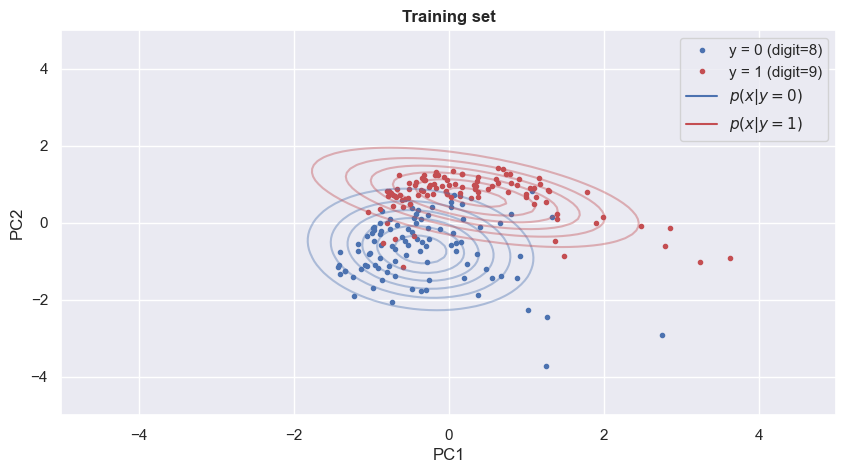

In [35]:
def plot_distribution(ax, dim1_array, dim2_array, density_fun, color=None, alpha=1, label=None, title=None, num_points = 100):
  
    # evaluate density for every point in the grid and reshape back
    Z = eval_density_grid(density_fun, dim1_array, dim2_array)
    
    # plot contour      
    cs = ax.contour(dim1_array, dim2_array, np.exp(Z).T, colors=color, alpha=alpha)

    # hack to add label
    if label:
        ax.plot([-1000, -1000], [-1000, -1000], color=color, label=label)
        ax.set(xlim=[dim1_array[0], dim1_array[-1]], ylim=[dim2_array[0], dim2_array[-1]])


# specify grids for plotting (I usually different different number of points in each dimension to make debugging easier)
dim1_array = np.linspace(-5, 5, 100)
dim2_array = np.linspace(-5, 5, 101)

# define function evaluating  class-conditionals
log_p_x_given_y0 = lambda x: mvn.logpdf(x, m0, S0)
log_p_x_given_y1 = lambda x: mvn.logpdf(x, m1, S1)

# plot
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
plot_data(ax, Xtrain, ytrain, title='Training set')
plot_distribution(ax, dim1_array, dim2_array, log_p_x_given_y0, color='b', alpha=0.4, label='$p(x|y=0)$')
plot_distribution(ax, dim1_array, dim2_array, log_p_x_given_y1, color='r', alpha=0.4, label='$p(x|y=1)$')
ax.legend();

Implement a function for evaluating the posterior distribution $p(y=1|\textbf{x})$ and the marginal data distribution $p(\textbf{x})$

In [36]:
# define function evaluating  class-conditionals
p_x_given_y0 = lambda x: mvn.pdf(x, m0, S0)
p_x_given_y1 = lambda x: mvn.pdf(x, m1, S1)

marginal = lambda x: pi0 * p_x_given_y0(x) + pi1 * p_x_given_y1(x)
posterior_y1 = lambda x: pi1*mvn.pdf(x, m1, S1)/marginal(x)


Create a plot with three subfigures: 1) plotting the class-conditional data distributions superimposed on the data, 2) plot the marginal data distribution superimposed on the data, and 3) plot the posterior distribution superimposed on the data. Comment on the plots.

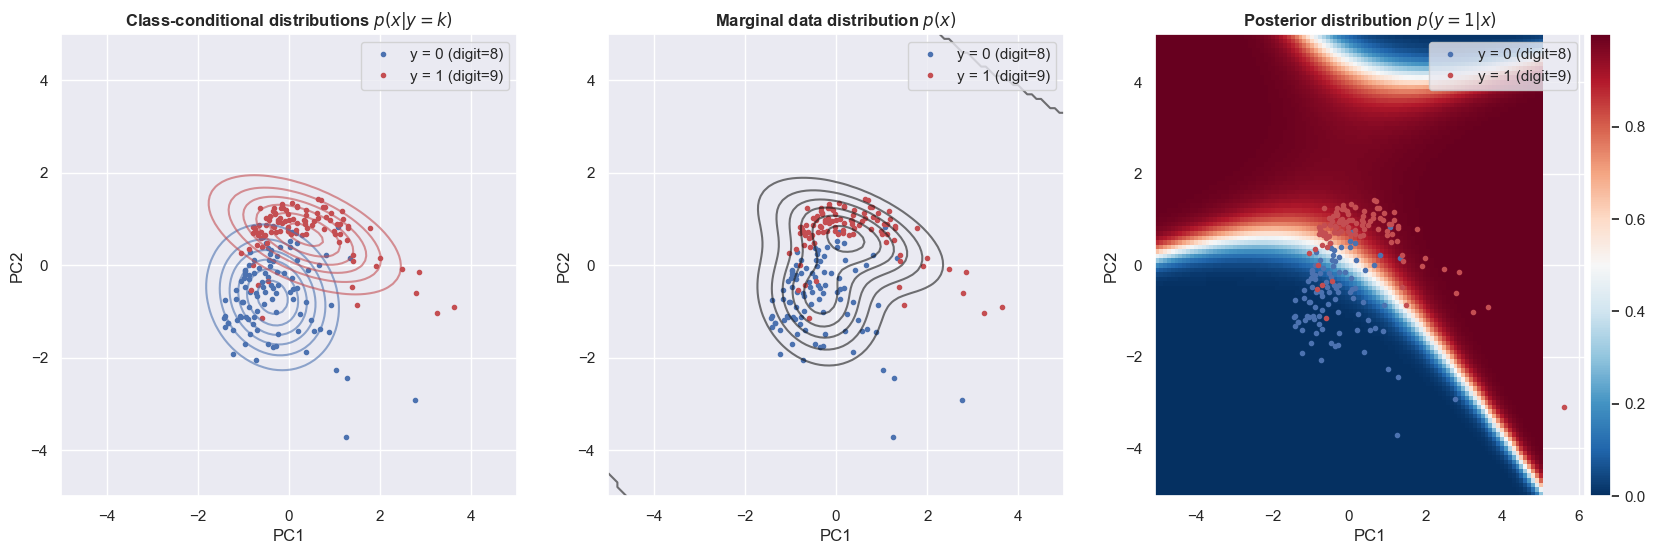

In [37]:
# evaluate posterior p(y=1|x) on every pair of grid points
post_grid = eval_density_grid(posterior_y1, dim1_array, dim2_array)

# prep plot
fig, ax = plt.subplots(1, 3, figsize=(20, 6))

# plot data
for i in range(3):
    plot_data(ax[i], Xtrain, ytrain, title='Training set')

# plot class-conditionals
plot_distribution(ax[0], dim1_array, dim2_array, log_p_x_given_y0, color='b', alpha=0.6, label='$p(x|y=0)$')
plot_distribution(ax[0], dim1_array, dim2_array, log_p_x_given_y1, color='r', alpha=0.6, label='$p(x|y=1)$')
ax[0].set_title('Class-conditional distributions $p(x|y=k)$', fontweight='bold')

# plot marginal data dist
plot_distribution(ax[1], dim1_array, dim2_array, marginal, color='k', alpha=0.6, label='$p(x)$')
ax[1].set_title('Marginal data distribution $p(x)$', fontweight='bold')

# plot posterior
im = ax[2].pcolormesh(dim1_array, dim2_array, post_grid.T, cmap=plt.cm.RdBu_r, shading='auto')
ax[2].set_title('Posterior distribution $p(y=1|x)$', fontweight='bold');
add_colorbar(im, fig, ax[2])

In [38]:
# function for evaluating accuracy
def accuracy(y_true, p_hat, threshold=0.5):
    return np.mean(y_true.ravel() == 1.0*(p_hat.ravel() > threshold))

log_ber = lambda y, p: (1-y)*np.log(1-p+1e-16) + y*np.log(p+1e-16)

# function for evaluating the ELPD
def elpd(y_true, p_hat):
    return np.mean(binom_dist.logpmf(y_true.ravel(), n=1, p=p_hat.ravel()))

# example
y_example = np.array([1, 1, 0, 0, 0])
p_example1 = np.array([0.95, 0.95, 0.95, 0.95, 0.1])
p_example2 = np.array([0.95, 0.95, 0.51, 0.51, 0.1])

print(f' Acc(y, p1) =  {accuracy(y_example, p_example1):3.2f}')
print(f' Acc(y, p2) =  {accuracy(y_example, p_example2):3.2f}')
print(f'ELPD(y, p1) = {elpd(y_example, p_example1):3.2f}')
print(f'ELPD(y, p2) = {elpd(y_example, p_example2):3.2f}')


 Acc(y, p1) =  0.60
 Acc(y, p2) =  0.60
ELPD(y, p1) = -1.24
ELPD(y, p2) = -0.33


Evaluate the accuracy and elpd for the training set and test set


In [39]:
metrics = {'Accuracy': accuracy, 'ELPD': elpd}

# computer posterior probabilities for traning and test set
p_train_hat = posterior_y1(Xtrain)
p_test_hat = posterior_y1(Xtest)

print(40*'*')
print(f'Metric\t\tTraining\tTest')
print(40*'*')
for metric_name, metric_fun in metrics.items():
    print(f'{metric_name:15s}\t{metric_fun(ytrain, p_train_hat):+3.2f}\t\t{metric_fun(ytest, p_test_hat):+3.2f}')


****************************************
Metric		Training	Test
****************************************
Accuracy       	+0.89		+0.90
ELPD           	-0.31		-0.40


## Understanding the Laplace approximations

The class below implements functions for plotting exact posterior PDF as well as computing its mean and variance. Initially, we will assume $N = 12$ and $y=2$. It also contains incomplete functions for evaluating the log joint, the gradient, and hessian, which you are going to implement later. But first, let's plot the posterior density for our specific dataset.

The exact posterior mean is 0.214
The exact posterior variance is 0.011


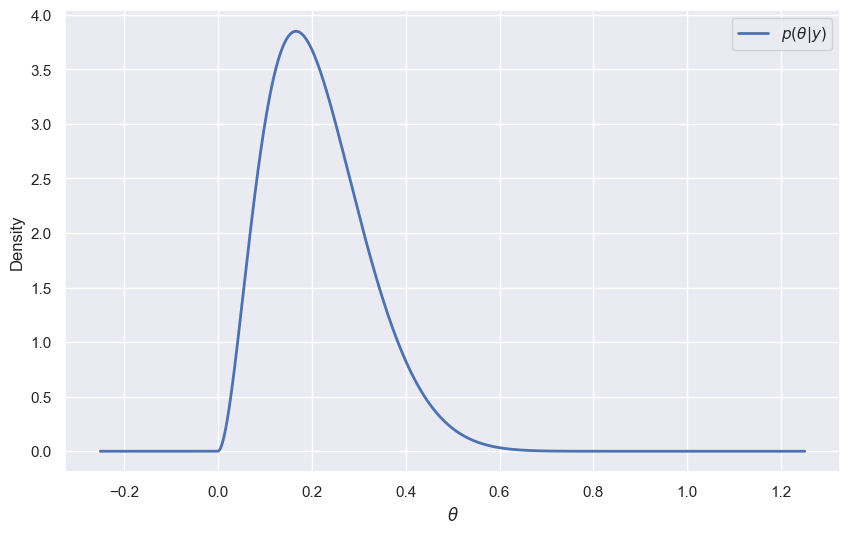

In [40]:
class BetaBinomial(object):

    def __init__(self, y, N, alpha0=1., beta0=1.):
        # data
        self.y, self.N = y, N
        # hyperparameters
        self.alpha0, self.beta0 = alpha0, beta0
        # true posterior parameters
        self.alpha, self.beta = alpha0 + y, beta0 + N - y

    @property
    def posterior_mean(self):
        """ compute the exact posterior mean """
        return self.alpha/(self.alpha + self.beta)
    
    @property
    def posterior_variance(self):
        """ compute the exact posterior variance """
        return self.alpha*self.beta/((self.alpha+self.beta)**2*(self.alpha+self.beta+1))

    def pdf(self, theta):# p(theta|y)
        return beta_dist.pdf(theta, self.alpha, self.beta)
    
    def log_joint(self, theta_): # log p(y, theta)
        """ evaluates and return the log joint p(y, theta_) """
        return (self.alpha0 + self.y - 1)*np.log(theta_) + (self.beta0 + self.N - self.y - 1)*np.log(1-theta_) 

    def grad(self, theta_): # grad log p(y, theta) |  d/dtheta log p(y, theta)
        """ evaluates and return the gradient of the log joint p(y, theta) write to theta evaluated at theta_ """
        return (self.alpha0 + self.y - 1)/theta_ - (self.beta0 + self.N - self.y - 1)/(1 - theta_) 

    def hessian(self, theta_): # hessian log p(y, theta)| d^2/dtheta^2 log p(y, theta)
        """ evaluates and return the hessian of the log joint p(y, theta) write to theta evaluated at theta_ """
        return -(self.alpha0 + self.y - 1)/theta_**2 - (self.beta0 + self.N - self.y - 1)/(1-theta_)**2 


# specify data and instantiate model
N = 12
y = 2
model = BetaBinomial(y, N)

# plot exact posterior density
theta_grid = np.linspace(-0.25, 1.25, 1000)
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
ax.plot(theta_grid, model.pdf(theta_grid), label='$p(\\theta|y)$', linewidth=2)
ax.set(xlabel='$\\theta$', ylabel='Density')
ax.legend()

# report exact posterior mean and variance
print(f'The exact posterior mean is {model.posterior_mean:4.3f}')
print(f'The exact posterior variance is {model.posterior_variance:4.3f}')

In [41]:
# specify data and instantiate model
N = 12
y = 2
model = BetaBinomial(y, N)

# optimize
results = minimize(lambda x: -model.log_joint(x), jac= lambda x: -model.grad(x), x0=0.5, bounds=[(1e-10,1-1e-10)])

# print full results
print(results)

if results.success:
    print('Optimization succeded!\n')
    print(f'\tSolution: theta         = {results.x[0]:+4.3}')
    print(f'\t|gradient| at solution  = {results.jac[0]:+4.3e}')
else:
    print('Optimization failed. Check your implementation.')

  message: CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL
  success: True
   status: 0
      fun: 5.406734506395656
        x: [ 1.667e-01]
      nit: 8
      jac: [-2.579e-09]
     nfev: 10
     njev: 10
 hess_inv: <1x1 LbfgsInvHessProduct with dtype=float64>
Optimization succeded!

	Solution: theta         = +0.167
	|gradient| at solution  = -2.579e-09


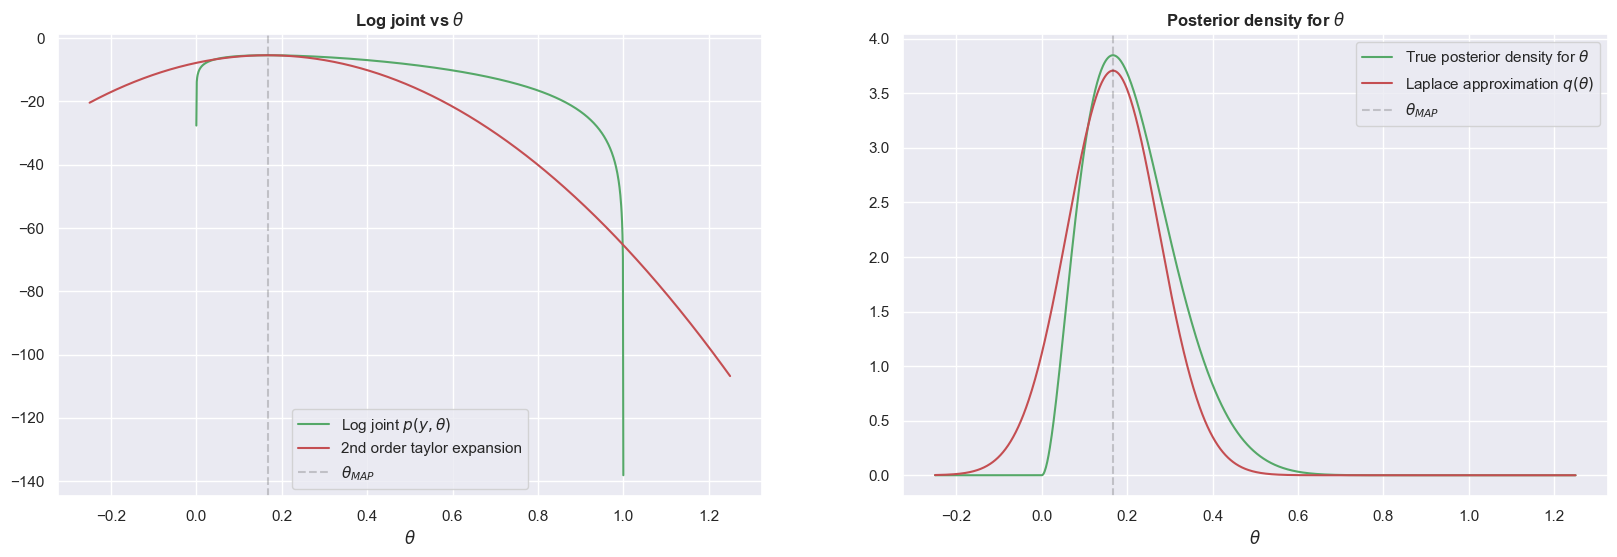

In [42]:
# helper functions implementing the pdf of a normal distribution
log_npdf = lambda x, m, v: -(x-m)**2/(2*v) - 0.5*np.log(2*np.pi*v)
npdf = lambda x, m, v: np.exp(log_npdf(x, m, v))

class LaplaceApproximation1D(object):

    def __init__(self, model, init_param=0):
        self.model = model
        self.param_MAP = None
        self.param_Hessian = None
        self.mean = None
        self.variance = None
        self.construct_approximation()

    def construct_approximation(self):

        # get MAP solution by optimization
        opt_results = minimize(lambda x: -model.log_joint(x), jac= lambda x: -model.grad(x), x0=0.5, bounds=[(1e-10,1-1e-10)])
        if not opt_results.success:
            print(opt_results)
            raise ValueError("Optimization failed. Printing the details from optimization for debugging")

        # evaluation Hessian at the mode
        self.param_MAP = opt_results.x                              
        self.Hessian = self.model.hessian(self.param_MAP)       
        self.mean = self.param_MAP                              
        self.variance = -1./self.Hessian                        

    def taylor_approx(self, theta):
        """" computes and returns the 2nd order Taylor approximation for f(theta) evalauted at theta """
        return self.model.log_joint(self.mean) + self.Hessian*(self.mean-theta)**2 
        
    def pdf(self, theta):
        """ evaluates the PDF of the Laplace approximation q(theta) at input parameter value theta """
        return npdf(theta, self.mean, self.variance) 


# specify data and instantiate model
N = 12
y = 2
model = BetaBinomial(y, N)
laplace_approx = LaplaceApproximation1D(model)

# plot
fig, ax = plt.subplots(1,2, figsize=(20, 6))

theta_space_unit = np.linspace(1e-6, 1-1e-6, 1000)
theta_space = np.linspace(-0.25, 1.25, 1000)
ax[0].plot(theta_space_unit, model.log_joint(theta_space_unit), 'g', label='Log joint $p(y, \\theta)$')
ax[0].plot(theta_space, laplace_approx.taylor_approx(theta_space), color='r', label='2nd order taylor expansion')
ax[0].axvline(laplace_approx.mean, color='k', linestyle='--', alpha=0.2, label='$\\theta_{MAP}$')
ax[0].set(xlabel='$\\theta$')
ax[0].legend();
ax[0].set_title('Log joint vs $\\theta$', fontweight='bold');

ax[1].plot(theta_space, model.pdf(theta_space),  'g', label='True posterior density for $\\theta$')
ax[1].plot(theta_space, laplace_approx.pdf(theta_space), color='r', label='Laplace approximation $q(\\theta)$')
ax[1].axvline(laplace_approx.mean, color='k', linestyle='--', alpha=0.2, label='$\\theta_{MAP}$')
ax[1].set(xlabel='$\\theta$')
ax[1].legend();
ax[1].set_title('Posterior density for $\\theta$', fontweight='bold');

## Implementing the logistic regression model

In [43]:
class Grid2D(object):
    """ helper class for evaluating the function func on the grid defined by (dim1, dim2)"""

    def __init__(self, dim1, dim2, func, name="Grid2D"):
        self.dim1 = dim1
        self.dim2 = dim2
        self.grid_size = (len(self.dim1), len(self.dim2))
        self.dim1_grid, self.dim2_grid = np.meshgrid(dim1, dim2, indexing='ij')
        self.func = func
        self.name = name
        
        # evaluate function on each grid point
        params_flat= np.column_stack((self.dim1_grid.flatten(), self.dim2_grid.flatten()))
        self.values = self.func(params_flat).squeeze().reshape(self.grid_size)

    def plot_contours(self, ax, color='b', num_contours=10, f=lambda x: x, alpha=1.0, title=None):
        ax.contour(self.dim1, self.dim2, f(self.values).T, num_contours, colors=color, alpha=alpha)
        ax.set(xlabel='$w_1$', ylabel='$w_2$')
        ax.set_title(self.name, fontweight='bold')

    def plot_heatmap(self, ax, f=lambda x: x, clim=[0, 1], colorbar=False):
        img = ax.pcolormesh(self.dim1, self.dim2, f(self.values).T, cmap=plt.cm.RdBu_r, clim=clim)
        ax.set(xlabel='$w_1$', ylabel='$w_2$')
        ax.set_title(self.name, fontweight='bold')
        if colorbar:
            add_colorbar(img, ax.get_figure(), ax)

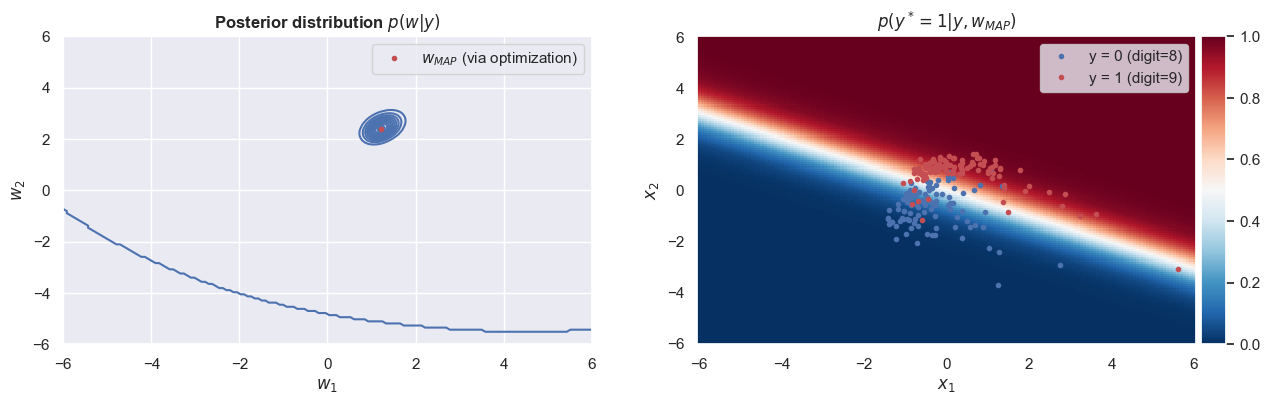

In [44]:
sigmoid = lambda x: 1./(1 + np.exp(-x))

class LogisticRegression(object):

    def __init__(self, X, y, feature_transformation=lambda x: x, alpha=1.):
        
        # store data and hyperparameters
        self.X0 = X
        self.y = y
        self.alpha = alpha
        self.feature_transformation = feature_transformation

        # apply feature transformation and standardize
        self.X = feature_transformation(self.X0)
        self.X_mean = np.mean(self.X, 0)
        self.X_std = np.std(self.X, 0)
        self.X_std[self.X_std == 0] = 1.
        self.X = self.preprocess(X)

        # store number of training data and number of featurs
        self.N, self.D = self.X.shape
        
        # get MAP by optimization
        self.w_MAP = self.get_MAP()

    def preprocess(self, X_):
        X = self.feature_transformation(X_)
        return (X - self.X_mean)/self.X_std
        
    def predict(self, X, w):
        """ evaluates sigma(f(X)) """
        f = w@X.T
        return sigmoid(f)
    
    def log_joint(self, w):
        """
            evaluates log joint, i.e. log p(y, w), for each row in w.
            w is expected to be of shape [M, D], where D is the number of parameters in the model and M is the number of points to evaluated
        """
        p = self.predict(self.X, w)
        log_prior = np.sum(log_npdf(w, 0, 1./self.alpha), axis=1)
        log_lik = binom_dist.logpmf(self.y, p=p, n=1)
        log_joint = log_prior + log_lik.sum(axis=1)

        return log_joint
    
    def hessian(self, w):
        """ Returns hessian of log joint evaluated at w 
            Input:   w       (shape: [1, D])
            Returns: H       (shape: [D, D])            """
        
        ##############################################
        # Your solution goes here
        ##############################################
        
        p = self.predict(self.X, w)
        v = p*(1-p)
        H = -self.X.T @ np.diag(v) @ self.X -self.alpha*np.identity(self.D)
        
        ##############################################
        # End of solution
        ##############################################
        
        assert H.shape == (self.D, self.D), f"The shape of the Hessians appears to be wrong. Expected shape ({self.D}, {self.D}), but received {H.shape}. Check your implementation"
        return H

    def grad(self, w):
        """ Returns gradient of log joint evaluated at w 
            Input:   w          (shape: [1, D])
            Returns: grad       (shape: [1, D])            """
        
        ##############################################
        # Your solution goes here
        ##############################################
        
        p = self.predict(self.X, w)
        err = p - self.y
        grad = -np.sum(err.T*self.X, axis=0) -self.alpha*w
        
        ##############################################
        # End of solution
        ##############################################

        assert grad.shape == (1, self.D), f"The shape of the gradient appears to be wrong. Expected shape (1, {self.D}), but received {grad.shape}. Check your implementation"
        return grad
  
    def get_MAP(self):
        """ returns MAP estimate obtained by maximizing the log joint """
        init_w = np.zeros(self.D)
        results = minimize(lambda x: -self.log_joint(x[None, :]), jac=lambda x: -self.grad(x[None, :]).flatten(), x0=init_w)
        if not results.success:
            print(results)
            raise ValueError('Optization failed')
        
        w_MAP = results.x 
        return w_MAP
    
        
# instantiate model
model = LogisticRegression(Xtrain, ytrain)

# function for making prediction using w_MAP point estimate
pred_MAP = lambda x: model.predict(model.preprocess(x), model.w_MAP)

# prep grid
dim1, dim2 = np.linspace(-6, 6, 150), np.linspace(-6, 6, 149)
grid_log_joint = Grid2D(dim1, dim2, model.log_joint, name='Posterior distribution $p(w|y)$')
grid_predictions = Grid2D(dim1, dim2, pred_MAP, name='$p(y^*=1|y, w_{MAP})$')

# plot
fig, ax = plt.subplots(1, 2, figsize=(15, 4))
grid_log_joint.plot_contours(ax[0], f=np.exp)
ax[0].plot(model.w_MAP[0], model.w_MAP[1], 'r.', label='$w_{MAP}$ (via optimization)')
ax[0].legend()

plot_data(ax[1], Xtrain, ytrain, 'Training data')
grid_predictions.plot_heatmap(ax[1], colorbar=True)
ax[1].set(xlabel='$x_1$', ylabel='$x_2$');

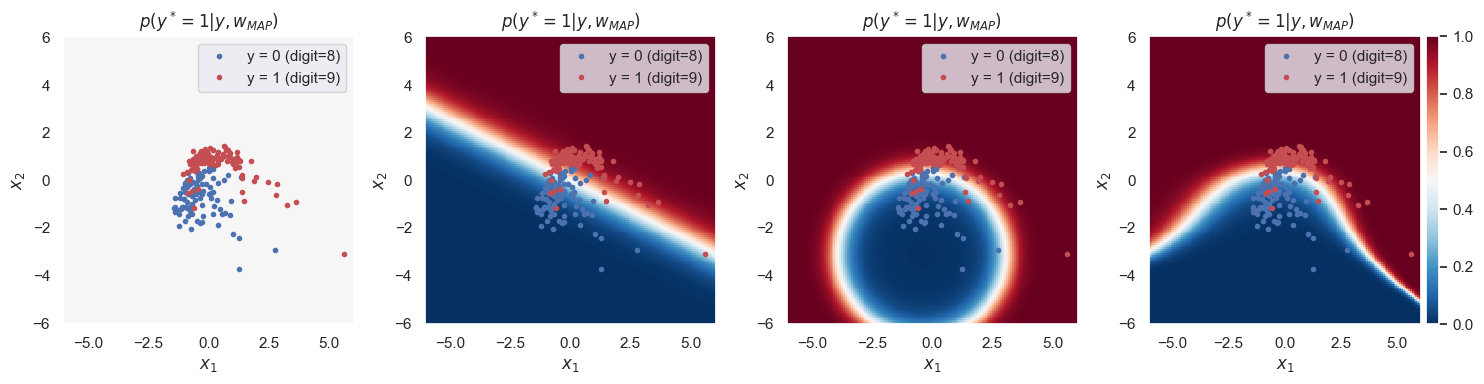

In [45]:
# simple polymials as feature transformation
def feature_transformation(x, order=1):
    return np.column_stack([x**m for m in range(order+1)])

# prep grid
dim1, dim2 = np.linspace(-6, 6, 150), np.linspace(-6, 6, 149)

# plot
fig, ax = plt.subplots(1, 4, figsize=(15, 4))

for i in range(4):

    # instantiate model
    model = LogisticRegression(Xtrain, ytrain, feature_transformation=lambda x: feature_transformation(x, order=i))

    # function for making prediction using w_MAP point estimate
    pred_MAP = lambda x: model.predict(model.preprocess(x), model.w_MAP)

    # evaluate prediction for grid
    grid_predictions = Grid2D(dim1, dim2, pred_MAP, name='$p(y^*=1|y, w_{MAP})$')

    # plot
    plot_data(ax[i], Xtrain, ytrain, 'Training data')
    grid_predictions.plot_heatmap(ax[i], colorbar=True if i == 3 else False)
    ax[i].set(xlabel='$x_1$', ylabel='$x_2$')

fig.tight_layout()

## Implementing the Laplace approximation for logistic regression

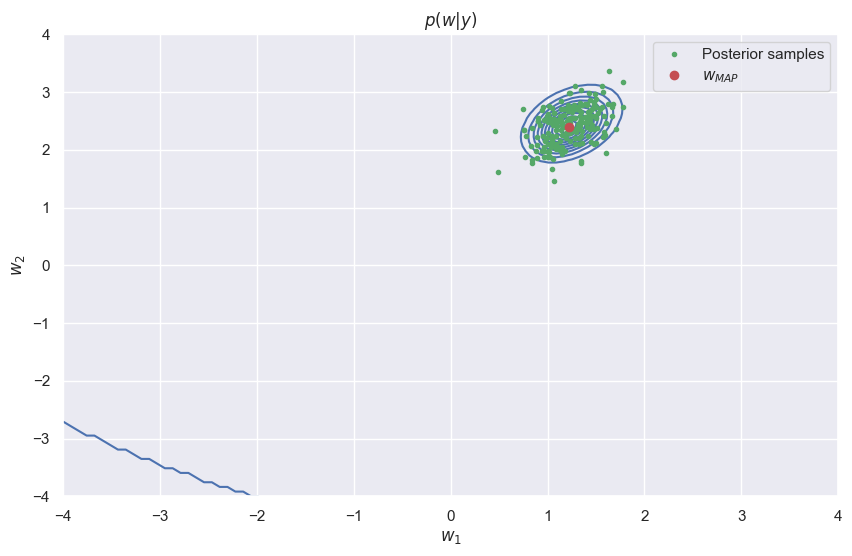

In [46]:
class LaplaceApproximation(object):

    def __init__(self, model):
        """ implements a laplace approximain q(w) = N(m, S), where m is the posterior mean and S is the posterior covariance """

        # store model
        self.model = model

        # implement Laplace approximation
        self.posterior_mean = model.w_MAP                               
        self.posterior_hessian = model.hessian(model.w_MAP)             
        self.posterior_cov = -np.linalg.inv(self.posterior_hessian)     

        # sanity check for dimensions
        assert self.posterior_mean.shape == (model.D,), f"The shape of the posterior mean appears wrong. Check your implementaion."
        assert self.posterior_hessian.shape == (model.D, model.D), f"The shape of the posterior Hessian appears wrong. Check your implementaion."
        assert self.posterior_cov.shape == (model.D, model.D), f"The shape of the posterior covariance appears wrong. Check your implementaion."

    def log_pdf(self, w):
        """ evaluate approximate posterior density at w """
        return mvn.logpdf(w, self.posterior_mean.ravel(), self.posterior_cov)
    
    def posterior_samples(self, num_samples):
        """ generate samples from posterior distribution """
        return np.random.multivariate_normal(self.posterior_mean, self.posterior_cov, size=(num_samples))

# prep model and approximation
model = LogisticRegression(Xtrain, ytrain)
laplace = LaplaceApproximation(model)

##############################################
# Your solution goes here
##############################################

# generate samples from posterior
w_samples = laplace.posterior_samples(200)

# prep grid
dim1, dim2 = np.linspace(-4, 4, 100), np.linspace(-4, 4, 100)
grid_log_joint = Grid2D(dim1, dim2, model.log_joint, name='$p(w|y)$')

# plot
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
grid_log_joint.plot_contours(ax, f=np.exp)
ax.plot(w_samples[:, 0], w_samples[:, 1], 'g.', label='Posterior samples')
ax.plot(model.w_MAP[0], model.w_MAP[1], 'ro', label='$w_{MAP}$')
ax.legend();

##############################################
# End of solution
##############################################



 Report the (approximate) posterior mean and covariance of $p(\mathbf{w}|\mathbf{y})$


In [47]:
print(f'Posterior mean:\n{np.array2string(laplace.posterior_mean, precision=2)}\n')
print(f'Posterior cov:\n{np.array2string(laplace.posterior_cov, precision=2)}')

Posterior mean:
[1.22 2.4 ]

Posterior cov:
[[0.06 0.03]
 [0.03 0.09]]


# Approximating the posterior predictive distribution

/var/folders/ff/tm9v3zh91jv9vg9vgbf1rhnr0000gn/T/ipykernel_36641/300227815.py:1: RuntimeWarning: overflow encountered in exp
  sigmoid = lambda x: 1./(1 + np.exp(-x))


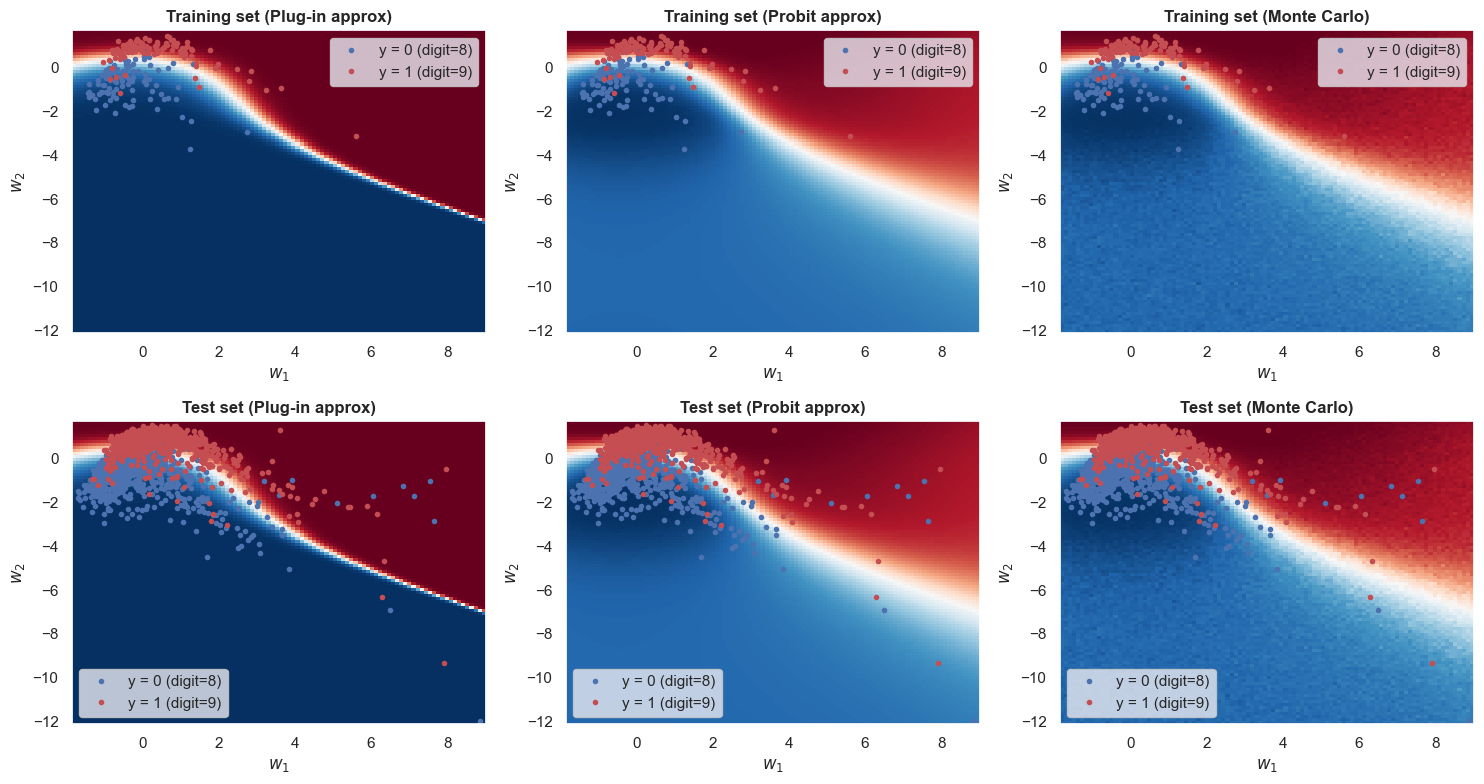

In [48]:
probit = lambda x: norm_dist.cdf(x)

class PosteriorPredictiveDistribution(object):
    
    def  __init__(self, model):
        self.model = model
        self.feature_transformation = model.feature_transformation
        self.laplace = LaplaceApproximation(model)

    def posterior_f(self, xstar_):
        """ computes the mean and variance of f^* = w^T x^* """
        xstar = self.model.preprocess(xstar_)
        m = xstar@self.laplace.posterior_mean
        v = np.diag(xstar@self.laplace.posterior_cov@xstar.T)
        return m, v

    def plugin_approx(self, xstar_):
        """ implements the plugin approximation for p(y^*|y, x^*) using w_MAP. If xstar has shape (M, D), then the shape of the output p must be (M,) """
        xstar = self.model.preprocess(xstar_)
        p = model.predict(xstar, model.w_MAP)

        assert p.shape == (len(xstar_),), f"Expected the shape of the output from the Monte Carlo approximation to be ({len(xstar)},), but the received shape was {p.shape}"
        return p
    
    def montecarlo(self, xstar, num_samples=1000):
        """ implements the Monte Carlo estimator for p(y^*|y, x^*). If xstar has shape (M, D), then the shape of the output p must be (M,) """
        m, v = self.posterior_f(xstar)

        ##############################################
        # Your solution goes here
        ##############################################
        
        f = np.random.normal(m, np.sqrt(v), size=(num_samples, len(xstar)))
        p = sigmoid(f).mean(0)
        
        ##############################################
        # End of solution
        ##############################################

        assert p.shape == (len(xstar),), f"Expected the shape of the output from the Monte Carlo approximation to be ({len(xstar)},), but the received shape was {p.shape}"
        return p

    def probit_approx(self, xstar):
        """ implements the probit approximation for p(y^*|y, x^*). If xstar has shape (M, D), then the shape of the output p must be (M,) """
        m, v = self.posterior_f(xstar)

        ##############################################
        # Your solution goes here
        ##############################################
        
        p = probit(m/np.sqrt(8/np.pi + v))
        
        ##############################################
        # End of solution
        ##############################################

        assert p.shape == (len(xstar),), f"Expected the shape of the output from the Monte Carlo approximation to be ({len(xstar)},), but the received shape was {p.shape}"
        return p
    
# simple polymials as feature transformation
def feature_transformation(x, order=1):
    return np.column_stack([x**m for m in range(order+1)])

# set up model and posterior predictive distribution
model = LogisticRegression(Xtrain, ytrain, feature_transformation=lambda x: feature_transformation(x, 3))
postpred = PosteriorPredictiveDistribution(model)

pred_dict = {   'Plug-in approx': postpred.plugin_approx,
                'Probit approx':  postpred.probit_approx,
                'Monte Carlo':    postpred.montecarlo,
            }


dim1 = np.linspace(Xtest[:, 0].min()-0.1, Xtest[:, 0].max()+0.1, 100)
dim2 = np.linspace(Xtest[:, 1].min()-0.1, Xtest[:, 1].max()+0.1, 100)

fig, ax = plt.subplots(2, 3, figsize=(15, 8))
    
for i, (name, predict_func) in enumerate(pred_dict.items()):
    predict_grid = Grid2D(dim1, dim2, predict_func)

    plot_data(ax[0, i], Xtrain, ytrain, alpha=0.5)
    plot_data(ax[1, i], Xtest, ytest, alpha=0.5)
    predict_grid.plot_heatmap(ax[0, i])
    predict_grid.plot_heatmap(ax[1, i])
    ax[0, i].set_title(f'Training set ({name})', fontweight='bold')
    ax[1, i].set_title(f'Test set ({name})', fontweight='bold')

fig.tight_layout()




Compute the training and test accuracy and ELPD for each of the three approximations:

In [49]:
print(70*'*')
print(f'Method\t\t\tMetric\t\tTraining\tTest')
print(70*'*')
# loop over metrics
for metric_name, metric_fun in metrics.items():
    # loop over methods
    for method_name, predict_func in pred_dict.items():

        # make predictions for both training and test set
        p_train_hat = predict_func(Xtrain)
        p_test_hat = predict_func(Xtest)

        # print
        print(f'{method_name:24s}{metric_name:15s}\t{metric_fun(ytrain, p_train_hat):+3.2f}\t\t{metric_fun(ytest, p_test_hat):+3.2f}')
    print()

**********************************************************************
Method			Metric		Training	Test
**********************************************************************
Plug-in approx          Accuracy       	+0.91		+0.92
Probit approx           Accuracy       	+0.91		+0.92
Monte Carlo             Accuracy       	+0.91		+0.92

Plug-in approx          ELPD           	-0.25		-inf
Probit approx           ELPD           	-0.25		-0.26
Monte Carlo             ELPD           	-0.26		-0.26



/var/folders/ff/tm9v3zh91jv9vg9vgbf1rhnr0000gn/T/ipykernel_36641/300227815.py:1: RuntimeWarning: overflow encountered in exp
  sigmoid = lambda x: 1./(1 + np.exp(-x))


# Week 5

In [4]:
%matplotlib inline

import autograd.numpy as np
import matplotlib.pylab as plt
import seaborn as snb

from scipy.optimize import minimize
from autograd import value_and_grad

from mpl_toolkits.axes_grid1 import make_axes_locatable

def add_colorbar(im, fig, ax):
    divider = make_axes_locatable(ax)
    cax = divider.append_axes('right', size='5%', pad=0.05)
    fig.colorbar(im, cax=cax, orientation='vertical')


snb.set_style('darkgrid')
snb.set_theme(font_scale=1.25)


## Multivariate Gaussian distribution


To become familiar with covariance functions and understand its properties, we will generate and visualize samples from Gaussian process distributions. Therefore, our first order of business will be to implement a function for generating samples from a Gaussian process prior.


Let $\mathbf{X} = \left\lbrace \mathbf{x}_n \right\rbrace_{n=1}^N $ be a set of points in the real line, i.e. $\mathbf{x}_n \in \mathbb{R}^D$, and let $f: \mathbb{R}^D \rightarrow \mathbb{R}$ be a function. Let $f_n \equiv f(x_n) \in \mathbb{R}$ be the value of the function $f$ evaluated at $x_n \in \mathbb{R}$. Furthermore, let $\mathbf{f} \equiv \left[f_1, f_2, \dots, f_N\right] \in \mathbb{R}^{N \times 1}$ be the vector of function values for each of the points in $\mathbf{X}$, then the Gaussian process prior for $\mathbf{f}$ becomes

$$\begin{align*}
\mathbf{f} \sim \mathcal{N}\left(\mathbf{0}, \mathbf{K}\right), \tag{4}
\end{align*}
$$

where $\mathbf{K} \in \mathbb{R}^{N \times N}$ is the kernel matrix satisfying $\mathbf{K}_{nm} = k(\mathbf{x}_n ,\mathbf{x}_m)$, where $\mathbf{x}_n$ refers to the $n$'th input point, i.e. the $i$'th entry of $\mathbf{X}$.

The **Cholesky decomposition** is sometimes refered to as *matrix square root* and it is really handy matrix decomposition for sampling from a multivariate Gaussian distribution. The Cholesky decomposition of the kernel matrix is given by $\mathbf{K} = \mathbf{L}\mathbf{L}^T$, where $\mathbf{L} \in \mathbb{R}^{N \times N}$ is a lower triangular matrix.

The idea is to generate samples from standardized Gaussian distributions, and then transform those samples into the desired distribution. Let $\mathbf{z} \in \mathbb{R}^{N \times 1}$ be a sample from a standardized multivariate Gaussian distribution, i.e. $\mathbf{z} \sim \mathcal{N}(\mathbf{0}, \mathbf{I}_n)$, where $\mathbf{I}_n$ is the identity matrix of size $N \times N$.



 

**Task 1.1**: Show that if $\mathbf{z} \sim \mathcal{N}(\mathbf{0}, \mathbf{I}_n)$ and $\mathbf{m} \in \mathbb{R}^{N}$, then $\mathbf{f} = \mathbf{L}\mathbf{z} + \mathbf{m} \sim \mathcal{N}(\mathbf{m}, \mathbf{K})$. 


**solution**
$\mathbf{f} = \mathbf{L}\mathbf{z} + \mathbf{m}$ is an affine transformation of $\mathbf{z}$, and we know that Gaussians are closed under affine transformation. Therefore, $\mathbf{f}$ must be a Gaussian distribution.

The mean of $\mathbf{f}$ is given by:
$$\begin{align}
\mathbb{E}\left[\mathbf{f}\right] &= \mathbb{E}\left[\mathbf{L}\mathbf{z}+\mathbf{m}\right] \\
&= \mathbf{L}\mathbb{E}\left[\mathbf{z}\right] + \mathbf{m} \\
&=\mathbf{L}\mathbf{0} + \mathbf{m} = \mathbf{m}
\end{align}$$
Covariance (Variance-Covariance Matrix)
$$\begin{align}
\text{To find the covariance matrix of } \mathbf{f}, \text{ we compute} \\
\mathbb{V}\left[\mathbf{f}\right] &= E\left[\left(\mathbf{f} - E[\mathbf{f}]\right)\left(\mathbf{f} - E[\mathbf{f}]\right)^\top\right]. \\
\text{Substituting } \mathbf{f} &= \mathbf{L}\mathbf{z} + \mathbf{m} \text{ and } E[\mathbf{f}] = \mathbf{m}, \text{ we get} \\
\mathbb{V}\left[\mathbf{f}\right] &= E\left[\left(\mathbf{L}\mathbf{z}\right)\left(\mathbf{L}\mathbf{z}\right)^\top\right]. \\
\text{Since the expectation of } \mathbf{z}\mathbf{z}^\top \text{ is } \mathbf{I}_n, \text{ we have} \\
\mathbb{V}\left[\mathbf{f}\right] &= \mathbf{L}E[\mathbf{z}\mathbf{z}^\top]\mathbf{L}^\top = \mathbf{L}\mathbf{I}_n\mathbf{L}^\top = \mathbf{L}\mathbf{L}^\top = \mathbf{K}.
\end{align}$$



A common trick is to add a small positive number $\epsilon > 0$ to the diagonal of the covariance matrix, which will increase the eigenvalues of the covariance matrix $\mathbf{K}$ and hence change the sign of a potential small negative eigenvalue. Hence, in practice we construct the covariance matrix as:

$$
\begin{align*}
\mathbf{K}_{nm}  = k(\mathbf{x}_n, \mathbf{x}_m) + \epsilon \delta(\mathbf{x}_n-\mathbf{x}_m),
\end{align*}
$$

where $\delta(\cdot)$ is **Kronenecker's delta function** defined by 
$$\begin{align*}
\delta(\mathbf{x}_n-\mathbf{x}_m) = \begin{cases} 1 & \text{if}\quad \mathbf{x}_n=\mathbf{x}_m \\ 0 & \text{otherwise} \end{cases}
\end{align*}
$$

We often say we add **jitter** to the covariance matrix. $\epsilon$ should be as small as positive to avoid affecting the results, e.g. a typical number is $\epsilon \approx 10^{-8}$. If $\epsilon$ needs to be significantly bigger, then it is likely that there are some other implementation issues, which should be addressed.

In [5]:
def generate_samples(m, K, num_samples, jitter=0):
    """ returns M samples from an Gaussian process with mean m and kernel matrix K. The function generates num_samples of z ~ N(0, I) and transforms them into f  ~ N(m, K) via the Cholesky factorization.
    arguments:
        m                -- mean vector (shape (N,))
        K                -- kernel matrix (shape NxN)
        num_samples      -- number of samples to generate (positive integer)
        jitter           -- amount of jitter (non-negative scalar)
    
    returns 
        f_samples        -- a numpy matrix containing the samples of f (shape N x num_samples)
    """
    N = len(K)
    L = np.linalg.cholesky(K + jitter * np.identity(N)) # Cholesky factorization L.shape = (N, N)
    z_samples = np.random.normal(0,1,size=(N, num_samples)) # generate samples from N(0, I) z_samples.shape = (N, num_samples)
    f_samples = m[:, None] + L @ z_samples # transform z into f via the Cholesky factorization f_samples.shape = (N, num_samples)
    # sanity check of dimensions
    assert f_samples.shape == (len(K), num_samples), f"The shape of f_samples appears wrong. Expected shape ({len(K)}, {num_samples}), but the actual shape was {f_samples.shape}. Please check your code. "
    return f_samples


# sanity check of implementation
num_samples = 100000
m = np.array([np.pi, np.sqrt(2)])
V = np.array([[0.123, -0.05], [-0.05, 0.123]])
f_samples = generate_samples(m, V, num_samples)
assert np.linalg.norm(np.mean(f_samples, 1)- m) < 1e-2, "The mean of f_samples appears wrong. Please check your code"
assert np.linalg.norm(np.cov(f_samples) - V) < 1e-2, "The covariance of f_samples appears wrong. Please check your code"

## Stationary Covariance functions

The squared exponential kernel is an example of a **stationary** kernel, which means that the covariance function only depends on the difference between two points, i.e. $\tau = \mathbf{x}_n - \mathbf{x}_m$ for two points in the input space $\mathbf{x}_n, \mathbf{x}_m \in \mathbb{R}^D$:

$$\begin{align*}
    k_{\text{SE}}(\mathbf{x}_n, \mathbf{x}_m) = \kappa^2 \exp\left(-\frac{\|\mathbf{x}_n - \mathbf{x}_m\|^2_ 2}{2\ell^2}\right) = \kappa^2 \exp\left(-\frac{\|\tau\|^2_ 2}{2\ell^2}\right) = k(\tau).
\end{align*}$$


 Furthermore, if the covariance function only depends on the distance between any two inputs, i.e. $||\tau||_2 = ||\mathbf{x}_n - \mathbf{x}_m||_2$, then the covariance function is also said to be **isotropic** (isotropic is a fancy word for rotation invariance). For the squared exponential kernel we can write:

 $$\begin{align*}
    k_{\text{SE}}(\mathbf{x}_n, \mathbf{x}_m) = k(||\tau||) =  \kappa^2 \exp\left(-\frac{\|\tau\|^2_ 2}{2\ell^2}\right), \tag{5}
\end{align*}$$

which shows that the squared exponential kernel is both **stationary** and **isotropic** since it can be written as a function $\|\tau\|$. Note that we in the above overload and abuse the notation of $k$ a bit.


In [12]:
# in the code below tau represents the distance between to input points, i.e. tau = ||x_n - x_m||.
def squared_exponential(tau, kappa, lengthscale):
    return kappa**2*np.exp(-0.5*tau**2/lengthscale**2)

def matern12(tau, kappa, lengthscale):
    return kappa**2*np.exp(-tau/lengthscale)

def matern32(tau, kappa, lengthscale):
    return kappa**2*(1 + np.sqrt(3)*tau/lengthscale)*np.exp(-np.sqrt(3)*tau/lengthscale)

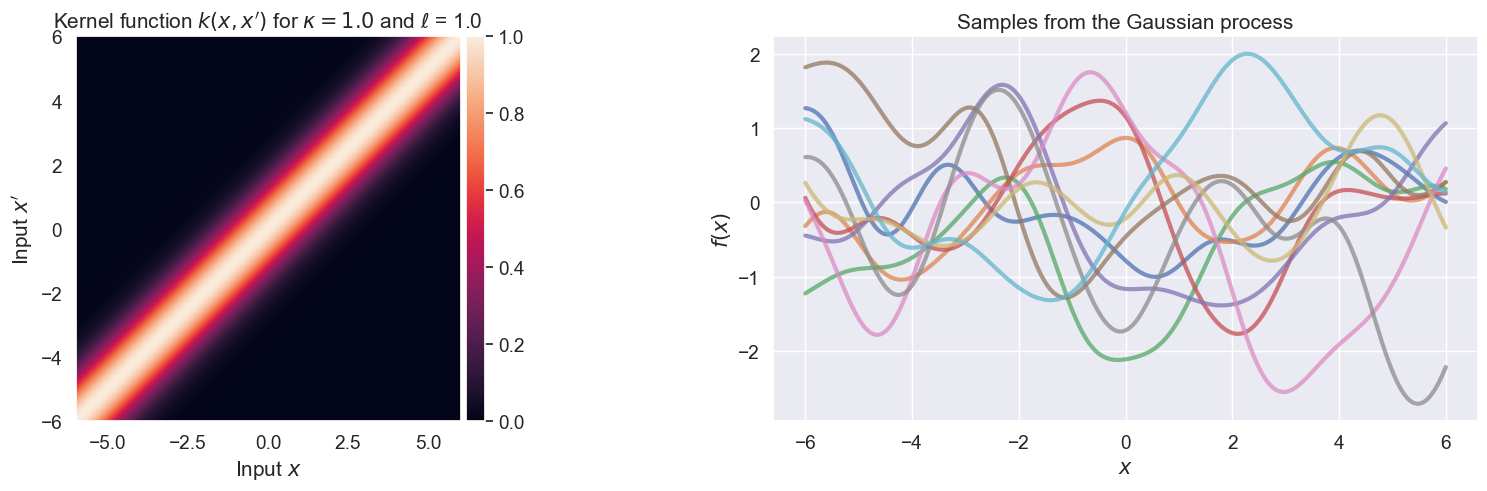

In [15]:
class StationaryIsotropicKernel(object):

    def __init__(self, kernel_fun, kappa=1., lengthscale=1.0):
        """
            the argument kernel_fun must be a function of three arguments kernel_fun(||tau||, kappa, lengthscale), e.g. 
            squared_exponential = lambda tau, kappa, lengthscale: kappa**2*np.exp(-0.5*tau**2/lengthscale**2)
        """
        self.kernel_fun = kernel_fun
        self.kappa = kappa
        self.lengthscale = lengthscale

    def contruct_kernel(self, X1, X2, kappa=None, lengthscale=None, jitter=1e-8):
        """ compute and returns the NxM kernel matrix between the two sets of input X1 (shape NxD) and X2 (MxD) using the stationary and isotropic covariance function specified by self.kernel_fun
    
        arguments:
            X1              -- NxD matrix
            X2              -- MxD matrix
            kappa           -- magnitude (positive scalar)
            lengthscale     -- characteristic lengthscale (positive scalar)
            jitter          -- non-negative scalar
        
        returns
            K               -- NxM matrix    
        """

        # extract dimensions 
        N, M = X1.shape[0], X2.shape[0]

        # prep hyperparameters
        kappa = self.kappa if kappa is None else kappa
        lengthscale = self.lengthscale if lengthscale is None else lengthscale

        ##############################################
        # Your solution goes here
        ##############################################
        
        # compute all the pairwise distances efficiently
        dists = np.sqrt(np.sum((np.expand_dims(X1, 1) - np.expand_dims(X2, 0))**2, axis=-1))
        
        # squared exponential covariance function
        K = self.kernel_fun(dists, kappa, lengthscale)
        
        # add jitter to diagonal for numerical stability
        if len(X1) == len(X2) and np.allclose(X1, X2):
            K = K + jitter*np.identity(len(X1))
        
        ##############################################
        # End of solution
        ##############################################
        
        assert K.shape == (N, M), f"The shape of K appears wrong. Expected shape ({N}, {M}), but the actual shape was {K.shape}. Please check your code. "
        return K

        
# create an Nx1 vector of equidistant points in [-6, 6]
N = 1000
X = np.linspace(-6, 6, N)[:, None]

# hyperparameters
kappa = 1.
scale = 1.

# number of samples to be plotted
num_samples = 10

# instantiate kernel object and construct kernel
kernel = StationaryIsotropicKernel(squared_exponential, kappa, scale)
K = kernel.contruct_kernel(X, X)

# plot
fig, ax = plt.subplots(1, 2, figsize=(20, 5))

m = np.zeros(len(X))
im = ax[0].pcolormesh(X.flatten(), X.flatten(), K, shading='auto')
ax[0].set(xlabel='Input $x$', ylabel="Input $x'$", title=f"Kernel function $k(x, x')$ for $\kappa = {kappa:2.1f}$ and $\ell$ = {scale:2.1f}")
ax[0].grid(False)
ax[0].set_aspect('equal')
add_colorbar(im, fig, ax[0])

f_samples = generate_samples(m, K, num_samples=num_samples, jitter=1e-8)
ax[1].plot(X, f_samples, alpha=0.75, linewidth=3);
ax[1].grid(True)
ax[1].set(xlabel='$x$', ylabel='$f(x)$', title='Samples from the Gaussian process');


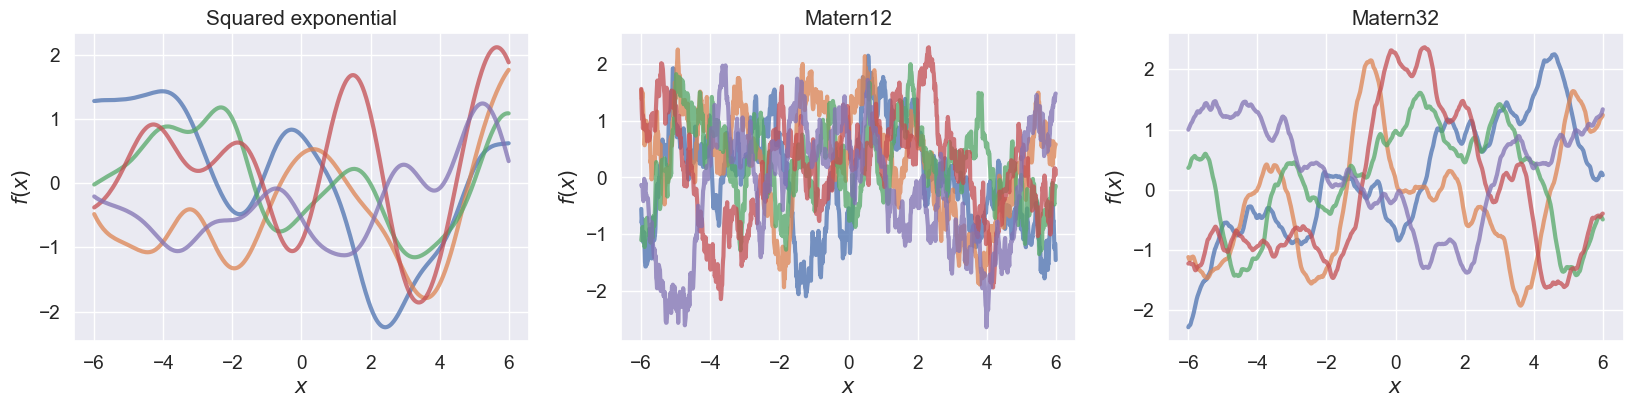

In [16]:
kernel_dict = {'Squared exponential': squared_exponential,
               'Matern12': matern12,
               'Matern32': matern32}

# hyperparameters
kappa = 1.
scale = 1.

# num_samples
num_samples = 5

# plot
fig, ax = plt.subplots(1, 3, figsize=(20, 4))

for i, (name, cov_fun) in enumerate(kernel_dict.items()):
    K = StationaryIsotropicKernel(cov_fun, kappa, scale).contruct_kernel(X, X)
    f_samples = generate_samples(m, K, num_samples=num_samples, jitter=1e-8)
    ax[i].plot(X, f_samples, alpha=0.75, linewidth=3);
    ax[i].set(xlabel='$x$', ylabel='$f(x)$', title=name)


## Non-linear regression using GP

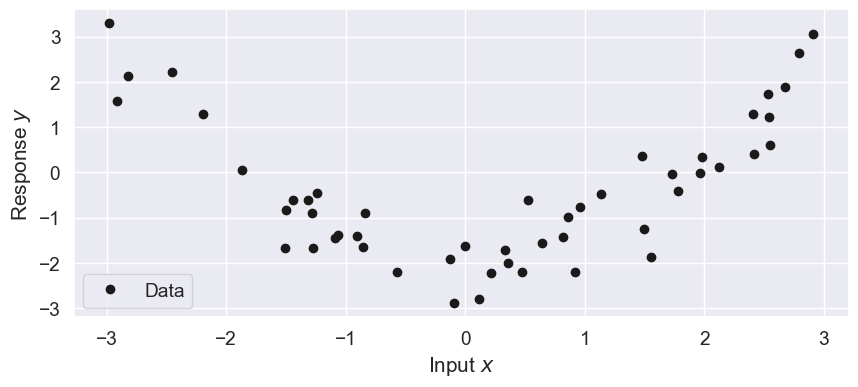

In [17]:
# load data
data = np.load('./data_exercise5.npz')
N = data['N']
Xtrain, ytrain = data['X'], data['y']

# for predictions
Xstar = np.linspace(-3, 9, 100)[:, None]

# function for plotting
def plot_data(ax):
    ax.plot(Xtrain, ytrain, 'k.', markersize=12, label='Data')
    ax.grid(True)
    ax.set_xlabel('Input $x$')
    ax.set_ylabel('Response $y$')
    ax.legend()

fig, ax = plt.subplots(1, 1, figsize=(10, 4))
plot_data(ax)


We will adopt the following model

$$
\begin{align*}
y_n = f(\mathbf{x}_n) + e_n,
\end{align*}
$$

where $f(\mathbf{x})$ is assumed to be a Gaussian process. Assuming the noise $e_n$ is i.i.d. and Gaussian, the joint model for the training data becomes:

\begin{align*}
p(\mathbf{y}, \mathbf{f}) = \mathcal{N}\left(\mathbf{y}|\mathbf{f}, \sigma^2\mathbf{I}\right)\mathcal{N}\left(\mathbf{f} | \mathbf{0}, \mathbf{K}\right)
\end{align*}

where $\mathbf{K}_{nm} = k(\mathbf{x}_n, \mathbf{x}_m)$ is the covariance matrix. 
We will also use the squared exponential and Matérn covariance functions in this part. Thus, this model (when using these covariance functions) has three hyperparameters in total: $\mathbf{\theta} = \left\lbrace \sigma, \kappa, \ell\right\rbrace$, where 

- $\sigma > 0$ is the standard deviation of the noise, 

- $\kappa > 0$ is the magnitude of the kernel,

- $\ell > 0$ is the lengthscale of the kernel. 

We will use $\mathbf{\theta}_K = \left\lbrace \kappa, \ell\ \right\rbrace$ to denote the hyperparameters of the kernel $K$ and $\mathbf{\theta}$ to denote all hyperparameters of the model.



- `predict_f`: computes the posterior distribution of the function value $f(\mathbf{x}^*)$ for a new input, $\mathbf{x}^*$, i.e. $p(f^*|\mathbf{y}) = \mathcal{N}(f^*|\mu_{f^*}, \Sigma_{f^*})$
- `predict_y`: computes the posterior predictive distribution of for a new observation at new input, $\mathbf{x}^*$, i.e. $p(y^*|\mathbf{y}) = \mathcal{N}(y^*|\mu_{y^*}, \Sigma_{y^*})$
- `posterior_samples`: generates samples from the posterior distribution of $f^*$ for a set of inputs, i.e. $\mathbf{f}^* \sim p(f^*|\mathbf{y})$
- `log_marginal_likelihood`: evaluate the log marginal likelihood for a given set if hyperparameters $\theta$


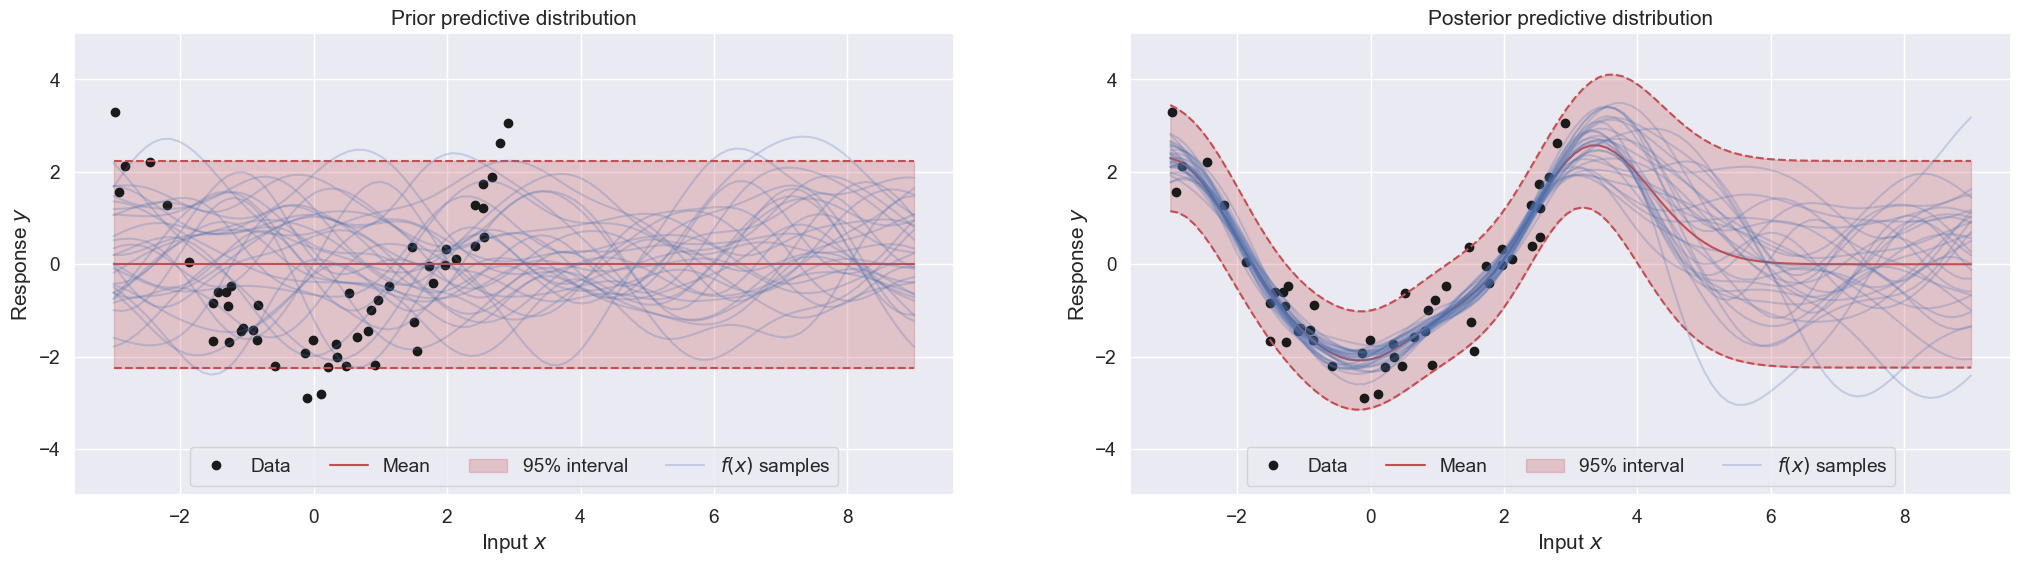

In [19]:
def plot_with_uncertainty(ax, Xp, gp, color='r', color_samples='b', title="", num_samples=0):
    
    mu, Sigma = gp.predict_y(Xp)
    mean = mu.ravel()
    std = np.sqrt(np.diag(Sigma))

    # plot distribution
    ax.plot(Xp, mean, color=color, label='Mean')
    ax.plot(Xp, mean + 2*std, color=color, linestyle='--')
    ax.plot(Xp, mean - 2*std, color=color, linestyle='--')
    ax.fill_between(Xp.ravel(), mean - 2*std, mean + 2*std, color=color, alpha=0.25, label='95% interval')
    
    # generate samples
    if num_samples > 0:
        fs = gp.posterior_samples(Xstar, num_samples)
        ax.plot(Xp, fs[:,0], color=color_samples, alpha=.25, label="$f(x)$ samples")
        ax.plot(Xp, fs[:, 1:], color=color_samples, alpha=.25)
    
    ax.set_title(title)
    



class GaussianProcessRegression(object):

    def __init__(self, X, y, kernel, scale=1., lengthscale=1., sigma=1/2, jitter=1e-8):
        """  
        Arguments:
            X                -- NxD input points
            y                -- Nx1 observed values 
            kernel           -- must be instance of the StationaryIsotropicKernel class
            jitter           -- non-negative scaler
            kappa            -- magnitude (positive scalar)
            lengthscale      -- characteristic lengthscale (positive scalar)
            sigma            -- noise std. dev. (positive scalar)
        """
        self.X = X
        self.y = y
        self.N = len(X)
        self.kernel = kernel
        self.jitter = jitter
        self.set_hyperparameters(kappa, lengthscale, sigma)

    def set_hyperparameters(self, kappa, lengthscale, sigma):
        self.kappa = kappa
        self.lengthscale = lengthscale
        self.sigma = sigma

    def posterior_samples(self, Xstar, num_samples):
        """
            generate samples from the posterior p(f^*|y, x^*) for each of the inputs in Xstar

            Arguments:
                Xstar            -- PxD prediction points
        
            returns:
                f_samples        -- numpy array of (P, num_samples) containing num_samples for each of the P inputs in Xstar
        """ 
        mu, Sigma = self.predict_f(Xstar)
        f_samples = generate_samples(mu.ravel(), Sigma, num_samples)
        
        assert (f_samples.shape == (len(Xstar), num_samples)), f"The shape of the posterior mu seems wrong. Expected ({len(Xstar)}, {num_samples}), but actual shape was {f_samples.shape}. Please check implementation"
        return f_samples
        
    def predict_y(self, Xstar):
        """ returns the posterior distribution of y^* evaluated at each of the points in x^* conditioned on (X, y)
        
        Arguments:
        Xstar            -- PxD prediction points
        
        returns:
        mu               -- Px1 mean vector
        Sigma            -- PxP covariance matrix
        """
        # prepare relevant matrices
        mu, Sigma = self.predict_f(Xstar)
        Sigma = Sigma + self.sigma**2 * np.identity(len(mu))
        
        return mu, Sigma

    def predict_f(self, Xstar):
        """ returns the posterior distribution of f^* evaluated at each of the points in x^* conditioned on (X, y)
        
        Arguments:
        Xstar            -- PxD prediction points
        
        returns:
        mu               -- Px1 mean vector
        Sigma            -- PxP covariance matrix
        """
        # prepare relevant matrices
        k = kernel.contruct_kernel(Xstar, self.X, self.kappa, self.lengthscale, jitter=self.jitter)
        K = kernel.contruct_kernel(self.X, self.X, self.kappa, self.lengthscale, jitter=self.jitter)
        Kstar = kernel.contruct_kernel(Xstar, Xstar, self.kappa, self.lengthscale, jitter=self.jitter)
        
        # Compute C matrix
        C = K + self.sigma**2*np.identity(len(self.X)) 

        # computer mean and Sigma
        mu = np.dot(k, np.linalg.solve(C, self.y))
        Sigma = Kstar - np.dot(k, np.linalg.solve(C, k.T))
        # sanity check for dimensions
        assert (mu.shape == (len(Xstar), 1)), f"The shape of the posterior mu seems wrong. Expected ({len(Xstar)}, 1), but actual shape was {mu.shape}. Please check implementation"
        assert (Sigma.shape == (len(Xstar), len(Xstar))), f"The shape of the posterior Sigma seems wrong. Expected ({len(Xstar)}, {len(Xstar)}), but actual shape was {Sigma.shape}. Please check implementation"

        return mu, Sigma
    
    def log_marginal_likelihood(self, kappa, lengthscale, sigma):
        """ 
            evaluate the log marginal likelihood p(y) given the hyperparaemters 

            Arguments:
            kappa       -- positive scalar 
            lengthscale -- positive scalar
            sigma       -- positive scalar
            """
        # prepare kernels
        K = self.kernel.contruct_kernel(self.X, self.X, kappa, lengthscale)
        C = K + sigma**2*np.identity(self.N)

        # compute Cholesky decomposition
        L = np.linalg.cholesky(C)
        v = np.linalg.solve(L, self.y)

        # compute log marginal likelihood
        logdet_term = np.sum(np.log(np.diag(L)))
        quad_term =  0.5*np.sum(v**2)
        const_term = -0.5*N*np.log(2*np.pi)

        return const_term - logdet_term - quad_term
     

# instantiate kernel
kernel = StationaryIsotropicKernel(kernel_fun=squared_exponential)

# instantiate GP without data (hence, posterior=prior) and with data
gp_prior = GaussianProcessRegression(np.zeros((0, 1)), np.zeros((0, 1)), kernel)
gp_post = GaussianProcessRegression(Xtrain, ytrain, kernel)

# plot
fig, ax = plt.subplots(1, 2, figsize=(25, 6))
plot_data(ax[0])
plot_with_uncertainty(ax[0], Xstar, gp_prior, title='Prior predictive distribution', num_samples=30)
ax[0].legend(loc='lower center', ncol=4)
ax[0].set_ylim((-5, 5))

plot_data(ax[1])
plot_with_uncertainty(ax[1], Xstar, gp_post, title='Posterior predictive distribution', num_samples=30)
ax[1].legend(loc='lower center', ncol=4)
ax[1].set_ylim((-5, 5));

## Hyperparameter optimation

Before we can apply this model in practice, we will study how we can use the ***marginal likelihood*** to estimate the hyperparameters of the model. If we let $\mathbf{\theta} \in \mathbb{R}^K$ denote all of our hyperparameters, then the **evidence approximation** suggests that we can estimate $\mathbf{\theta}$ as follows

\begin{align*}
\hat{\mathbf{\theta}} = \arg\max\limits_{\mathbf{\theta}} \ln p(\mathbf{y}|\mathbf{\theta}),
\end{align*}

where $p(\mathbf{y}|\mathbf{\theta})$ is the marginal likelihood of the model (see eq. (17.52) in Murphy1).


In [20]:
def optimize_hyperparameters(gp, theta_init):

    # define optimization objective as the negative log marginal likelihood
    objective = lambda params: -gp.log_marginal_likelihood(np.exp(params[0]), np.exp(params[1]), np.exp(params[2]))

    # optimize using gradients
    res = minimize(value_and_grad(objective), np.log(theta_init), jac=True)

    # check for success
    if not res.success:
        print('Warning: optimization failed!')

    # return resultss
    theta = np.exp(res.x)
    return theta


Estimated hyperparameters
	sigma: 0.59
	kappa: 2.92
	scale: 1.82


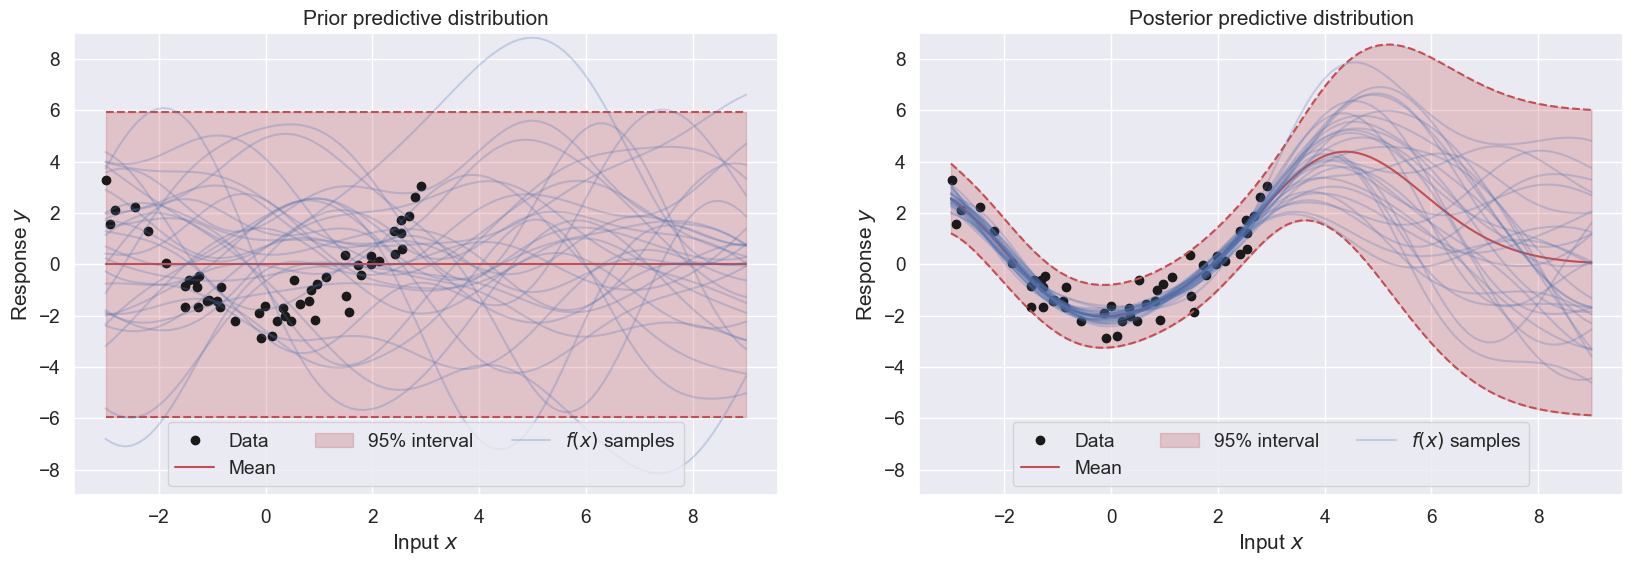

In [21]:
kernel = StationaryIsotropicKernel(kernel_fun=squared_exponential)
gp_prior = GaussianProcessRegression(np.zeros((0, 1)), np.zeros((0, 1)), kernel)
gp_post = GaussianProcessRegression(Xtrain, ytrain, kernel)

# optimize
theta_hat = optimize_hyperparameters(gp_post, theta_init=np.array([1,1,1]))

# extract individual hyperparameters
kappa_hat, scale_hat, sigma_hat = theta_hat

# print
print('Estimated hyperparameters')
print(f'\tsigma: {sigma_hat:3.2f}')
print(f'\tkappa: {kappa_hat:3.2f}')
print(f'\tscale: {scale_hat:3.2f}')


gp_prior = GaussianProcessRegression(np.zeros((0, 1)), np.zeros((0, 1)), kernel)
gp_post = GaussianProcessRegression(Xtrain, ytrain, kernel)
gp_prior.set_hyperparameters(kappa_hat, scale_hat, sigma_hat)
gp_post.set_hyperparameters(kappa_hat, scale_hat, sigma_hat)

mu_prior, Sigma_prior = gp_prior.predict_f(Xstar)
mu_post, Sigma_post = gp_post.predict_f(Xstar)
    
# plot
fig, ax = plt.subplots(1, 2, figsize=(20, 6))
plot_data(ax[0])
plot_with_uncertainty(ax[0], Xstar, gp_prior, title='Prior predictive distribution', num_samples=30)
ax[0].legend(loc='lower center', ncol=3)
ax[0].set_ylim((-9, 9))
plot_data(ax[1])
plot_with_uncertainty(ax[1], Xstar, gp_post, title='Posterior predictive distribution', num_samples=30)
ax[1].legend(loc='lower center', ncol=3)
ax[1].set_ylim((-9, 9));

## Analysing the bike sharing data set

In [24]:
data = np.load('./data_exercise5b.npz')
day = data['day']
bike_count = data['bike_count']

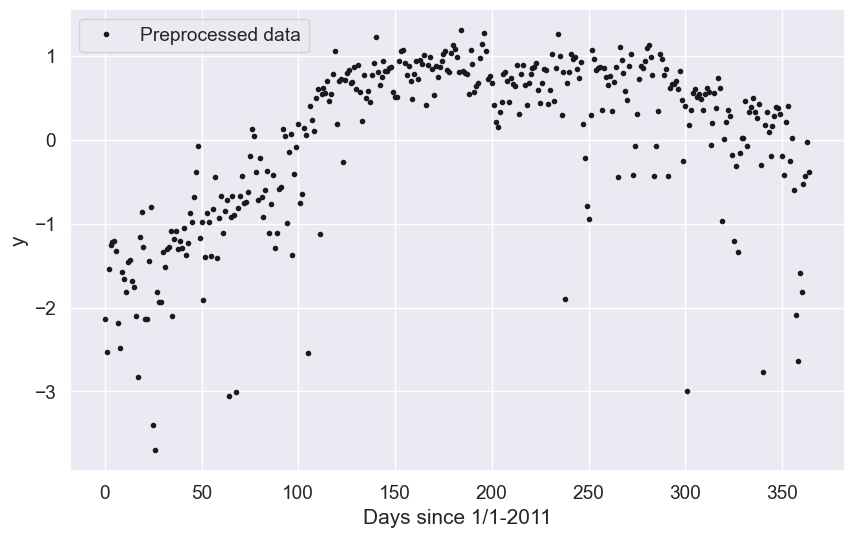

In [25]:
# log-transform
y = np.log(bike_count)

# remove mean and scale to unit variance
ym, ys = np.mean(y), np.std(y)
y = (y-ym)/ys

X = day

# plot result
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
ax.plot(X, y, 'k.', label='Preprocessed data')
ax.legend()
ax.set(xlabel='Days since 1/1-2011', ylabel='y');

Estimate the hyperparameters of a Gaussian process regression model with a squared exponential kernel from the preprocessed data. Report the estimated values of each hyperparameter.

In [26]:
# prep gp
gp = GaussianProcessRegression(X, y, StationaryIsotropicKernel(squared_exponential))

# optimize hyperparameters
theta_hat = optimize_hyperparameters(gp, theta_init=np.array([1, 1, 50.]))
kappa_hat, scale_hat, sigma_hat = theta_hat

# use new hyperparameters
gp.set_hyperparameters(kappa_hat, scale_hat, sigma_hat)

print('Estimated hyperparameters')
print(f'\tsigma: {sigma_hat:3.2f}')
print(f'\tkappa: {kappa_hat:3.2f}')
print(f'\tscale: {scale_hat:3.2f}')
print('')
print(f'Log Z: {gp.log_marginal_likelihood(kappa_hat, scale_hat, sigma_hat):3.2f}')


Estimated hyperparameters
	sigma: 0.57
	kappa: 1.08
	scale: 78.63

Log Z: -35.39


Compute and visualize the predictive distribution for the interval $\text{day} \in \left\lbrace 0, 1, 2, \dots, 370 \right\rbrace$.

(0.0, 364.0)

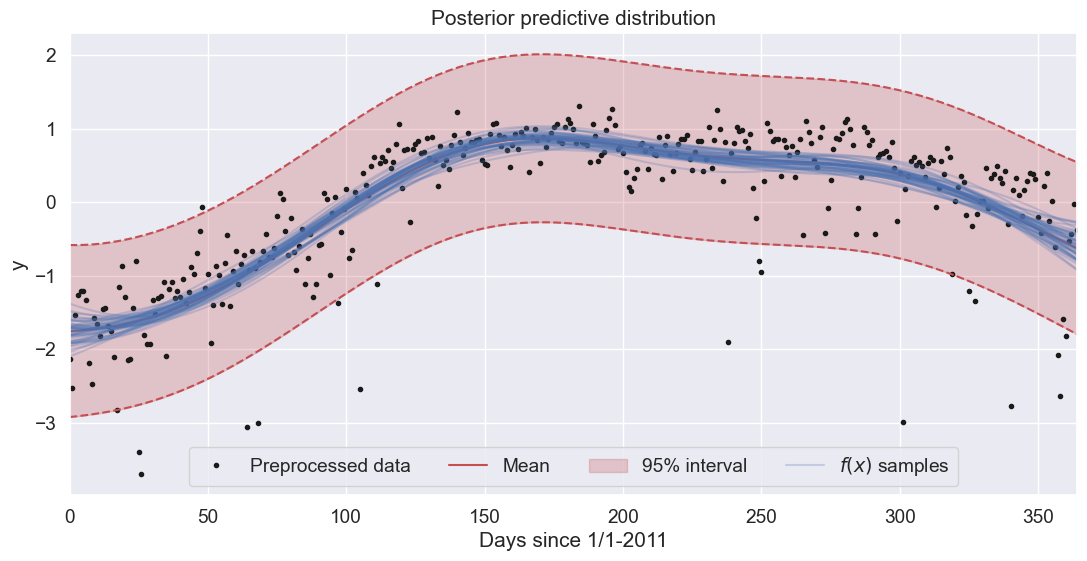

In [27]:
# days for predictions
Xstar = np.arange(0, 370)[:, None]

# compute posterior of y for all days in interval [0, 370]
mu_post, Sigma_post = gp.predict_f(Xstar)

# visualize
fig, ax = plt.subplots(1, 1, figsize=(13, 6))
ax.plot(X, y, 'k.', label='Preprocessed data')
plot_with_uncertainty(ax, Xstar, gp, title='Posterior predictive distribution', num_samples=50)
ax.legend(loc='lower center', ncol=4)
ax.set(xlabel='Days since 1/1-2011', ylabel='y')
ax.set_xlim(X.min(), X.max())


Generate 50 samples from the posterior in the interval [0, 370], map them back to the original measurement space and plot them on top of the original dataset


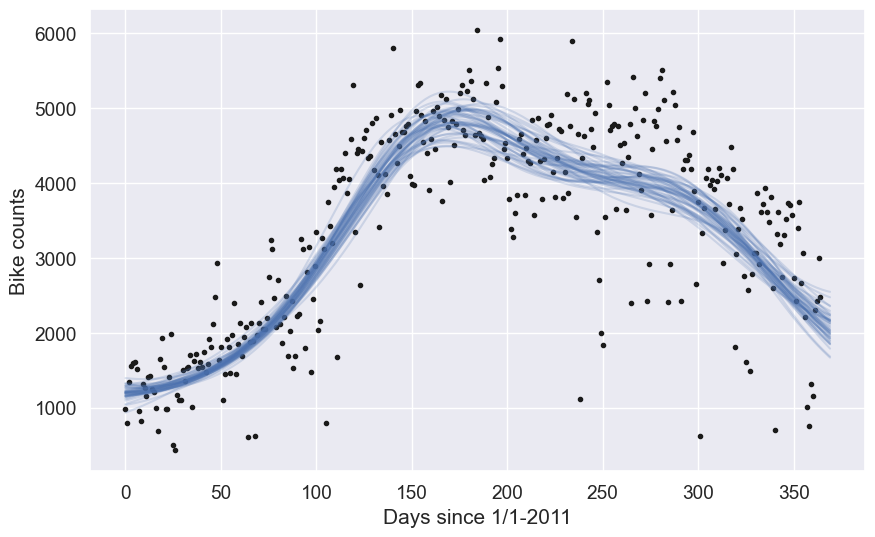

In [28]:
# generate samples
f = gp.posterior_samples(Xstar, num_samples=50)

# compute "reverse standardization" for each sample
f2 = ys*f + ym

# exponentiate
f3 = np.exp(f2)

# plot
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
ax.plot(X, bike_count, 'k.', label='Preprocessed data')
ax.plot(Xstar, f3, 'b', alpha=0.2);
ax.set(xlabel='Days since 1/1-2011', ylabel='Bike counts');

# Week 6 GP Classification

In [39]:
%matplotlib inline
import autograd.numpy as np
import pylab as plt
import matplotlib.colors as colors
import seaborn as snb

from exercise6 import compute_err
from exercise6 import eval_density_grid
from exercise6 import load_MNIST_subset
from exercise6 import plot_with_uncertainty
from exercise6 import add_colorbar
from exercise6 import StationaryIsotropicKernel
from exercise6 import squared_exponential
from exercise6 import matern12
from exercise6 import matern32
from exercise6 import NeuralNetworkMAP
from exercise6 import generate_samples

# from autograd import grad, 
from scipy.optimize import minimize
from scipy.stats import norm
from scipy.stats import binom as binom_dist

snb.set_style('darkgrid')
snb.set_theme(font_scale=1.1)


In [40]:
np.random.seed(0)

sigmoid = lambda x: 1./(1+np.exp(-x))

# true p(y=1|x) = sigmoid(f(x))
f = lambda x:  5*np.sin(0.75*x)

N = 50
X = np.sort(np.random.normal(0, 2.5, size=N))[:, None]
y = np.random.binomial(1, sigmoid(f(X)))

# define points for prediction/plotting
Xstar = np.linspace(-7.5, 7.5, 300)[:, None]

# plot data
def plot_data(ax, X, y, title="Synthetic data", plot_true=False):
    ax.plot(X[y==0], y[y==0], 'bo', label='Class 0')
    ax.plot(X[y==1], y[y==1], 'ro', label='Class 1')
    if plot_true:
        ax.plot(Xstar, sigmoid(f(Xstar)), 'g--', label='True p(y=1|x)')
    ax.set(xlabel='Input feature $x$', ylabel='Target $y$', title=title)
    ax.legend()


## Implementing the Laplace approximation

In [41]:
class BernoulliLikelihood(object):
    """ Implement the Bernoulli likelihood with the sigmoid as inverse link function """

    def __init__(self, y):
        # store data & force shape (N, )
        self.y = y.ravel()

    def log_lik(self, f):
        """ Implements log p(y|f) = sum log p(y_n|f_n), where p(y_n|f_n) = Ber(y_n|sigmoid(f_n)). 
            
            Argument:
            f       --       vector of function values, shape (N, )

            Returns
            ll      --       sum of log likelihoods for all N data points, scalar

        """
        p = sigmoid(f)
        ll = np.sum(self.y * np.log(p) + (1 - self.y) * np.log(1 - p))
    
        # check shape and return
        assert ll.shape == (), f"Expected shape for loglik_ is (), but the actual shape was {ll.shape}. Please check implementation"
        return ll
    
    def grad(self, f):
        """ Implements the gradient of log p(y|n) 

            Argument:
            f       --       vector of function values, shape (N, )

            Returns
            g       --       gradient of log p(y|f), i.e. a vector of first order derivatives with shape (N, )
             
        """
        g = self.y - sigmoid(f)
         # check shape and return
        assert g.shape == (len(f), ), f"Expected shape for g is ({len(f)}, ), but the actual shape was {g.shape}. Please check implementation"
        return g

    def hessian(self, f):
        """ Implements the Hessian of log p(y|n) 

        Argument:
            f       --       vector of function values, shape (N, )

        Returns:
            Lambda  --       Hessian of likelihood, i.e. a diagonal matrix with the second order derivatives on the diagonal, shape (N, N)
        """
        p = sigmoid(f)
        Lambda = np.diag(-p * (1 - p))
    
        # check shape and return
        assert Lambda.shape == (len(f), len(f)), f"Expected shape for Lambda is ({len(f)}, {len(f)}), but the actual shape was {Lambda.shape}. Please check implementation"
        return Lambda


# sanity check of implementation
likelihood = BernoulliLikelihood(np.array([0, 1, 0, 0]))
assert np.allclose(likelihood.log_lik(-np.ones((4))), -2.2530467500728912), "The implementation of the function log_lik seems to be wrong. Please check your implementation (chech that the dimensionen match your expectations before summing over the data points)"
assert np.allclose(np.linalg.norm(likelihood.grad(np.ones((4)))), 1.2944765058872572), "The implementation of the function grad seems to be wrong. Please check your implementation"
assert np.allclose(np.linalg.norm(likelihood.hessian(np.ones((4)))), 0.3932238664829637), "The implementation of the function hessian seems to be wrong. Please check your implementation"

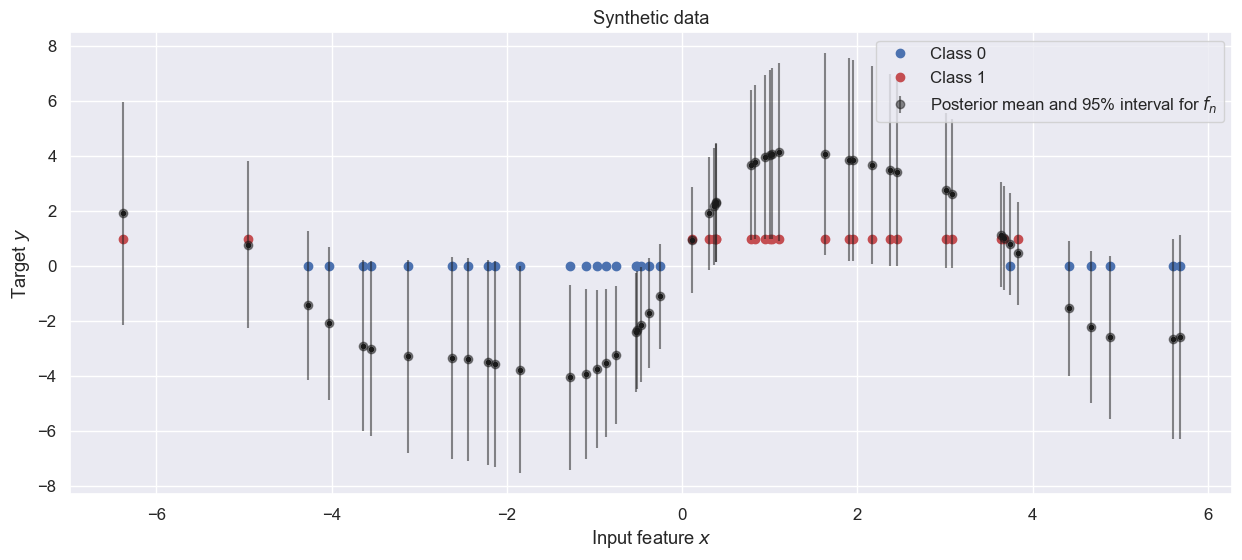

In [42]:
probit = lambda x: norm.cdf(x)

class GaussianProcessClassification(object):

    def __init__(self, X, y, likelihood, kernel, kappa=1., lengthscale=1.,jitter=1e-8):
        """  
        Arguments:
            X                -- NxD input points
            y                -- Nx1 observed values 
            likelihood       -- likelihood instance
            kernel           -- must be instance of the StationaryIsotropicKernel class
            jitter           -- non-negative scaler
            kappa            -- magnitude (positive scalar)
            lengthscale      -- characteristic lengthscale (positive scalar)
        """
        self.X = X
        self.y = y
        self.N = len(X)
        self.likelihood = likelihood(y)
        self.kernel = kernel
        self.jitter = jitter
        self.set_hyperparameters(kappa, lengthscale)

        # precompute kernel, its Cholesky decomposition and prepare Laplace approx
        self.K = self.kernel.contruct_kernel(self.X, self.X, jitter=self.jitter)
        self.L = np.linalg.cholesky(self.K)
        self.construct_laplace_approximation()

    def set_hyperparameters(self, kappa, lengthscale):
        self.kernel.kappa = kappa
        self.kernel.lengthscale = lengthscale
        
    def log_joint_a(self, a):
        """ computes and returns the log joint distribution log p(y, f), where f = K*a """
        f = self.K@a
        # compute log prior contribution
        const = -self.N/2*np.log(2*np.pi)
        logdet = np.sum(np.log(np.diag(self.L)))
        quad_term =  0.5*np.sum(a*f)
        log_prior = const - logdet - quad_term
        # compute log likelihood contribution
        log_lik = self.likelihood.log_lik(f)
        # return sum
        return log_prior + log_lik
    

    def grad_a(self, a):
        """ computes gradient of log joint distribution, i.e. log p(y, a) = log p(y|a) + log p(a), wrt. a """
        f = self.K@a
        # compute gradient contribution from prior and likelihood
        grad_prior = -f
        grad_lik = self.likelihood.grad(f)@self.K
        # sum and return
        return grad_prior + grad_lik
        
    
    def compute_f_MAP(self):
        # optimize to get f_MAP
        result = minimize(lambda a: -self.log_joint_a(a), jac=lambda a: -self.grad_a(a), x0=np.zeros((self.N)))
        
        if not result.success:
            print(result)
            raise ValueError('Optization failed')
        
        self.a = result.x
        f_MAP = self.K @ result.x
        return f_MAP

    def construct_laplace_approximation(self):

        # f_MAP
        self.m = self.compute_f_MAP()

        # Compute Hessian
        Lambda = -self.likelihood.hessian(self.m)
        # straigth-forward implementation of S
        # self.H = -Lambda - np.linalg.inv(self.K)
        # self.S = np.linalg.inv(-self.H)
        # numerically more robust approach for computing S
        Lsqrt = np.sqrt(Lambda)
        B = np.identity(len(self.m)) + Lsqrt@self.K@Lsqrt
        chol_B = np.linalg.cholesky(B)
        e = np.linalg.solve(chol_B, Lsqrt@self.K)
        
        self.S = self.K - e.T@e 

    def predict_f(self, Xstar):
        """ returns the posterior distribution of f^* evaluated at each of the points in x^* conditioned on (X, y)
        
        Arguments:
        Xstar            -- PxD prediction points
        
        returns:
        mu               -- mean vector, shape (P,)
        Sigma            -- covariance matrix, shape (P, P) 
        """
        ##############################################
        # Your solution goes here
        ##############################################
        k = self.kernel.contruct_kernel(Xstar, self.X, jitter = self.jitter)
        c = self.kernel.contruct_kernel(Xstar, Xstar, jitter = self.jitter)

        h = np.linalg.solve(self.K, k.T)
        mu = k @ np.linalg.solve(self.K, self.m)
        Sigma = c - h.T @ (self.K - self.S) @ h
        ##############################################
        # End of solution
        ##############################################

        # check dimensions and return
        assert (mu.shape == (len(Xstar),)), f"Expected shape for mu is ({len(Xstar)}), but the actual shape was {mu.shape}. Please check implementation"
        assert Sigma.shape == (len(Xstar), len(Xstar)), f"Expected shape for Sigma is ({len(Xstar)}, {len(Xstar)}), but the actual shape was {Sigma.shape}. Please check implementation"

        return mu, Sigma
    
    def predict_y(self, Xstar):
        """ returns the posterior distribution of y^* evaluated at each of the points in x^* conditioned on (X, y)
        
        Arguments:
        Xstar            -- PxD prediction points
        
        returns:
        p               -- vector of post. pred. probabilities, shape (P,)
        """
        ##############################################
        # Your solution goes here
        ##############################################
        mu, Sigma = self.predict_f(Xstar)
        p = probit(mu/np.sqrt(8/np.pi + np.diag(Sigma)))
        ##############################################
        # End of solution
        ##############################################

        # check dimensions and return
        assert (p.shape == (len(Xstar),)), f"Expected shape for p is ({len(Xstar)}), but the actual shape was {p.shape}. Please check implementation"
        return p
    
    def posterior_samples(self, Xstar, num_samples):
        """
            generate samples from the posterior p(f^*|y, x^*) for each of the inputs in Xstar

            Arguments:
                Xstar            -- PxD prediction points
        
            returns:
                f_samples        -- numpy array of (P, num_samples) containing num_samples for each of the P inputs in Xstar
        """
        mu, Sigma = self.predict_f(Xstar)
        f_samples = generate_samples(mu.ravel(), Sigma, num_samples)

        assert (f_samples.shape == (len(Xstar), num_samples)), f"The shape of the posterior mu seems wrong. Expected ({len(Xstar)}, {num_samples}), but actual shape was {f_samples.shape}. Please check implementation"
        return f_samples

# prep kernel, likelihood and Gaussian process
kernel = StationaryIsotropicKernel(squared_exponential)
likelihood = BernoulliLikelihood
gpc = GaussianProcessClassification(X, y, likelihood, kernel, kappa=3., lengthscale=1)

# plot data and visualize posterior
fig, ax = plt.subplots(1, 1, figsize=(15, 6))
plot_data(ax, X, y)
ax.plot(X, gpc.m, 'k.')
ax.errorbar(X, gpc.m, yerr=1.96*np.sqrt(np.diag(gpc.S)), fmt='ko', label='Posterior mean and 95% interval for $f_n$', alpha=0.5)
ax.legend();

## Implementing the posterior distribution

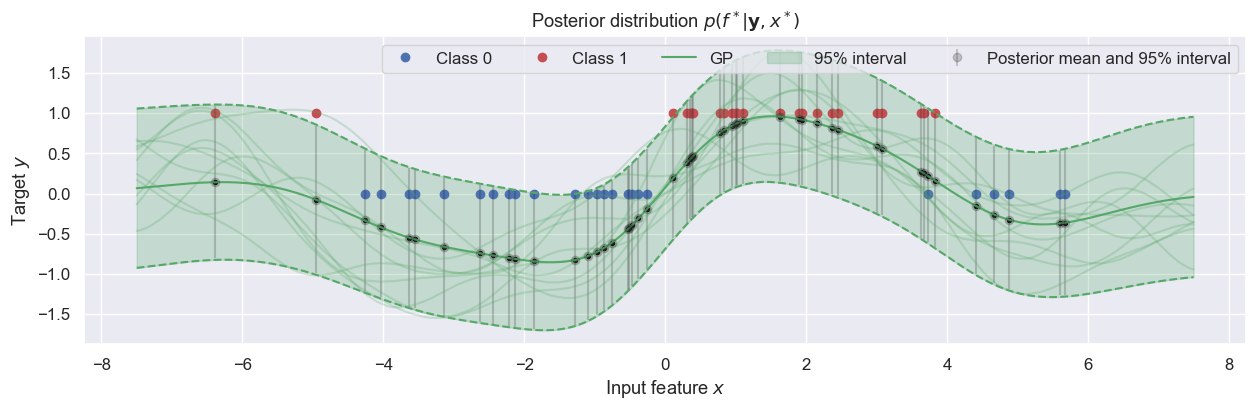

In [43]:
# prep model
kernel = StationaryIsotropicKernel(squared_exponential)
likelihood = BernoulliLikelihood
gpc = GaussianProcessClassification(X, y, likelihood, kernel, kappa=0.5, lengthscale=1)

# predict
mu, Sigma = gpc.predict_f(Xstar)

# plot
fig, ax = plt.subplots(1, 1, figsize=(15, 4))
plot_data(ax, X, y)
ax.plot(X, gpc.m, 'k.')
ax.errorbar(X, gpc.m, yerr=1.96*np.sqrt(np.diag(gpc.S)), fmt='ko', label='Posterior mean and 95% interval', alpha=0.2)
plot_with_uncertainty(ax, Xstar, mu, Sigma, color='g', title='Posterior distribution $p(f^*|\mathbf{y}, x^*)$', num_samples=10)
ax.legend(ncol=5);


## Posterior predictive distribution

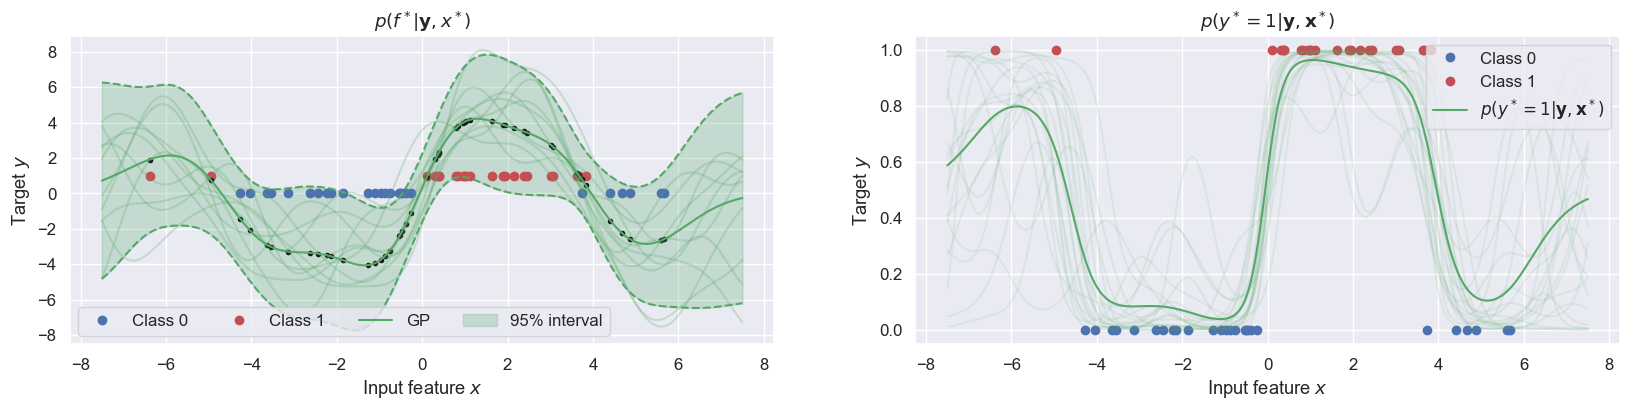

In [44]:
# prep model
kernel = StationaryIsotropicKernel(squared_exponential)
likelihood = BernoulliLikelihood
gpc = GaussianProcessClassification(X, y, likelihood, kernel, kappa=3, lengthscale=1.)

# predict 
mu, Sigma = gpc.predict_f(Xstar)
p = gpc.predict_y(Xstar)

# compute prediction distribution p(f^*|y, x^*) and p(y^*|y, x^*)
f_samples = generate_samples(mu[:, None], Sigma, 20).T
p_samples = sigmoid(f_samples)

# plot
fig, ax = plt.subplots(1, 2, figsize=(20, 4))
plot_data(ax[0], X, y)
plot_data(ax[1], X, y)

ax[0].plot(X, gpc.m, 'k.')
plot_with_uncertainty(ax[0], Xstar, mu, Sigma, color='g', title='$p(f^*|\mathbf{y}, x^*)$', num_samples=10)
ax[0].legend(ncol=5)

ax[1].plot(Xstar, p, 'g-', label='$p(y^*=1|\mathbf{y}, \mathbf{x}^*)$')
ax[1].plot(Xstar.ravel(), p_samples.T, 'g-', alpha=0.1)
ax[1].legend()
ax[1].set(title='$p(y^*=1|\mathbf{y}, \mathbf{x}^*)$');

## Predictive distribution for the network

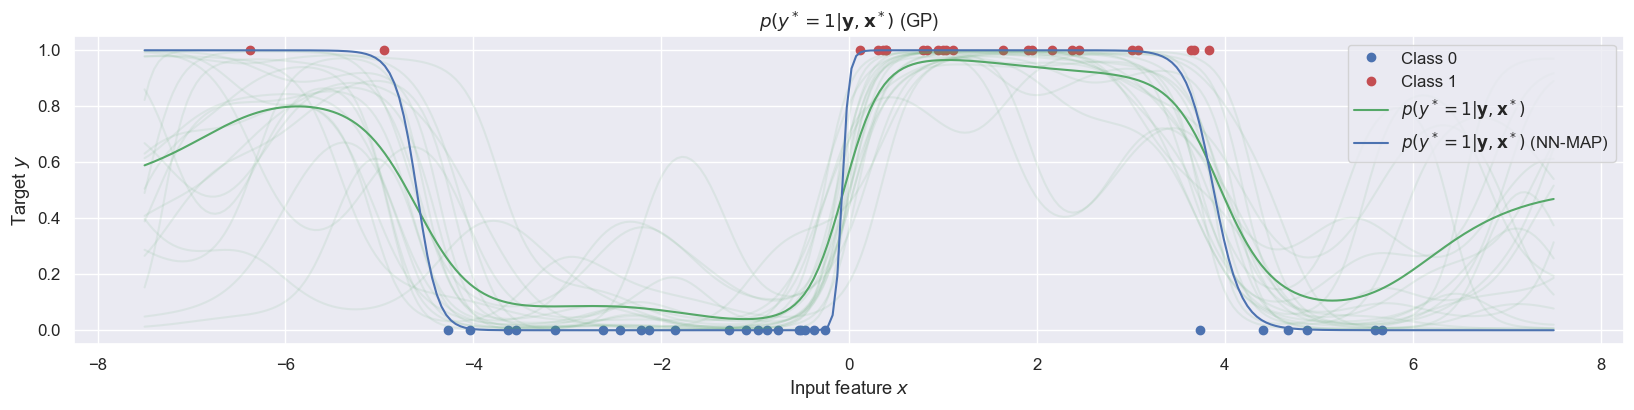

In [45]:
# fit the NN model with 1 input dimension, 2 hidden layers of 20 neurons each, and 1 output
nn = NeuralNetworkMAP(X, y, [1, 20, 20, 1], alpha=0.01, likelihood=BernoulliLikelihood)

# predict using neural network
y_nn = nn.predict(Xstar)
p_nn = sigmoid(y_nn)

# plot
fig, ax = plt.subplots(1, 1, figsize=(20, 4))
plot_data(ax, X, y)
ax.plot(Xstar, p, 'g-', label='$p(y^*=1|\mathbf{y}, \mathbf{x}^*)$')
ax.plot(Xstar.ravel(), p_samples.T, 'g-', alpha=0.1)
ax.set(title='$p(y^*=1|\mathbf{y}, \mathbf{x}^*)$ (GP)');
ax.plot(Xstar, p_nn, label='$p(y^*=1|\mathbf{y}, \mathbf{x}^*)$ (NN-MAP)')
ax.legend();





## GP classificiation for 2D dataset

In [47]:
digits = [4, 7]
Xtrain, Xtest, ytrain, ytest = load_MNIST_subset('./mnist_subset.npz', digits=digits, subset=500)

# make sure dimensions are [N x 1]
ytrain = ytrain[:, None]
ytest = ytest[:, None]

X = np.row_stack((Xtrain, Xtest))
y = np.row_stack((ytrain, ytest))

# plot
def plot_data(ax, title="", xlim=(-5, 5), ylim=(-5, 5)):
    ax.plot(Xtrain[:, 0], Xtrain[:, 1], 'ko', markersize=7, label='Training data')
    ax.plot(X[y.ravel()==0, 0], X[y.ravel()==0, 1], 'b.', label='Digit %d' % digits[0])
    ax.plot(X[y.ravel()==1, 0], X[y.ravel()==1, 1], 'r.', label='Digit %d' % digits[1])
    ax.set_xlim((-5,5 ))
    ax.set_ylim((-5,5 ))
    ax.set(title=title, xlim=xlim, ylim=ylim, xlabel='PC1', ylabel='PC2')
    ax.legend()

In [48]:
# Gaussian process
kernel = StationaryIsotropicKernel(squared_exponential)
gpc = GaussianProcessClassification(Xtrain, ytrain, BernoulliLikelihood, kernel, kappa=1, lengthscale=1)

Training error:	0.08 (0.01)
Test error:	0.08 (0.01)


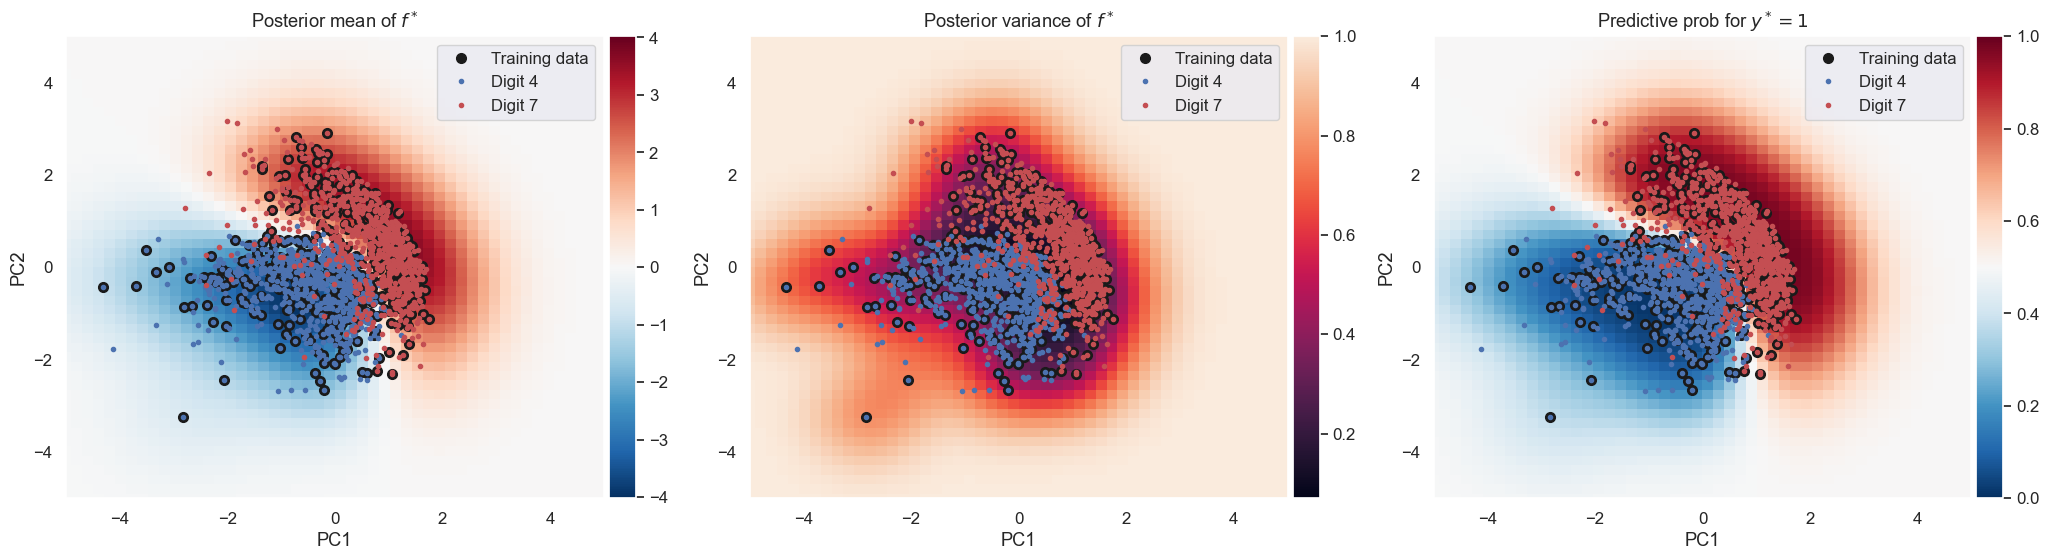

In [49]:
# predict
p_train = gpc.predict_y(Xtrain)
p_test = gpc.predict_y(Xtest)

# make predictions
ytrain_hat = 1.0*(p_train > 0.5)
ytest_hat = 1.0*(p_test > 0.5)

# print results: mean and standard error of the mean
print('Training error:\t%3.2f (%3.2f)' % compute_err(ytrain_hat.ravel(), ytrain.ravel()))
print('Test error:\t%3.2f (%3.2f)' % compute_err(ytest_hat.ravel(), ytest.ravel()))

# prepare for plotting
x_grid, posterior_y_gpc_eval_mu = eval_density_grid(lambda x: gpc.predict_f(x)[0], P=50, )
x_grid, posterior_y_gpc_eval_var = eval_density_grid(lambda x: np.diag(gpc.predict_f(x)[1]), P=50)
x_grid, posterior1_gpc_eval = eval_density_grid(gpc.predict_y, P=50, a=-5, b=5)

# prepare plot
fig, ax = plt.subplots(1, 3, figsize=(25, 6))

# plot posterior mean
im = ax[0].pcolormesh(x_grid, x_grid, posterior_y_gpc_eval_mu, cmap=plt.cm.RdBu_r, norm=colors.CenteredNorm(), shading='auto')
plot_data(ax[0], title="Posterior mean of $f^*$")
add_colorbar(im, fig, ax[0])

# plot posterior var
im = ax[1].pcolormesh(x_grid, x_grid, posterior_y_gpc_eval_var, shading='auto')
plot_data(ax[1], title="Posterior variance of $f^*$")
add_colorbar(im, fig, ax[1])

# plot posterior predictive
im = ax[2].pcolormesh(x_grid, x_grid, posterior1_gpc_eval, cmap=plt.cm.RdBu_r, shading='auto', clim=(0, 1))
plot_data(ax[2], title="Predictive prob for $y^* = 1$")
add_colorbar(im, fig, ax[2])

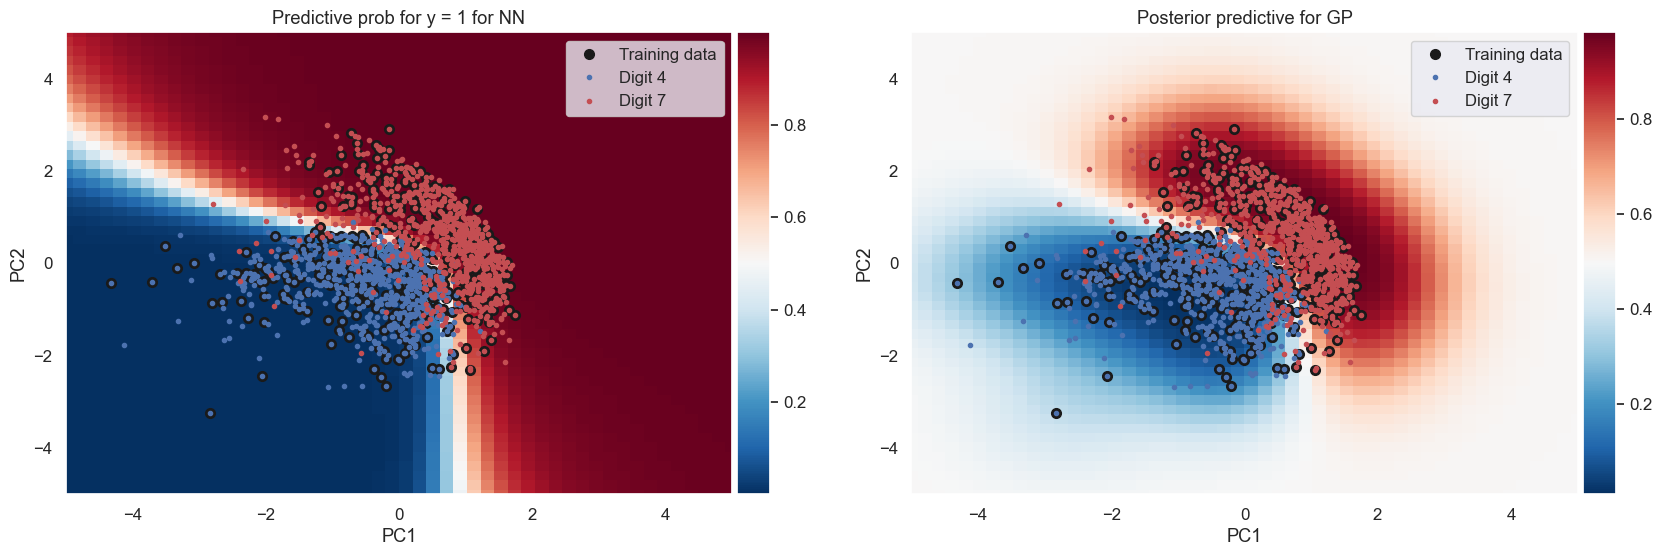

In [50]:
nn = NeuralNetworkMAP(Xtrain, ytrain, [2, 20, 20, 1], alpha=1., likelihood=BernoulliLikelihood)

x_grid, posterior1_nn_eval = eval_density_grid(lambda x: sigmoid(nn.predict(x)), P=50, a=-5, b=5)

fig, ax = plt.subplots(1, 2, figsize=(20, 6))
im = ax[0].pcolormesh(x_grid, x_grid, posterior1_nn_eval, cmap=plt.cm.RdBu_r, shading='auto')
plot_data(ax[0], title='Predictive prob for y = 1 for NN')
add_colorbar(im, fig, ax[0])

plot_data(ax[1], title='Posterior predictive for GP')
im = ax[1].pcolormesh(x_grid, x_grid, posterior1_gpc_eval, cmap=plt.cm.RdBu_r, shading='auto')
add_colorbar(im, fig, ax[1])

# Week 7

# Week 8

# Assignment 2

In [29]:
%matplotlib inline

import autograd.numpy as np
import matplotlib.pylab as plt
import seaborn as snb

from scipy.optimize import minimize
from autograd import value_and_grad

from mpl_toolkits.axes_grid1 import make_axes_locatable

def add_colorbar(im, fig, ax):
    divider = make_axes_locatable(ax)
    cax = divider.append_axes('right', size='5%', pad=0.05)
    fig.colorbar(im, cax=cax, orientation='vertical')


snb.set_style('darkgrid')
snb.set_theme(font_scale=1.25)


Plot six different covariance functions

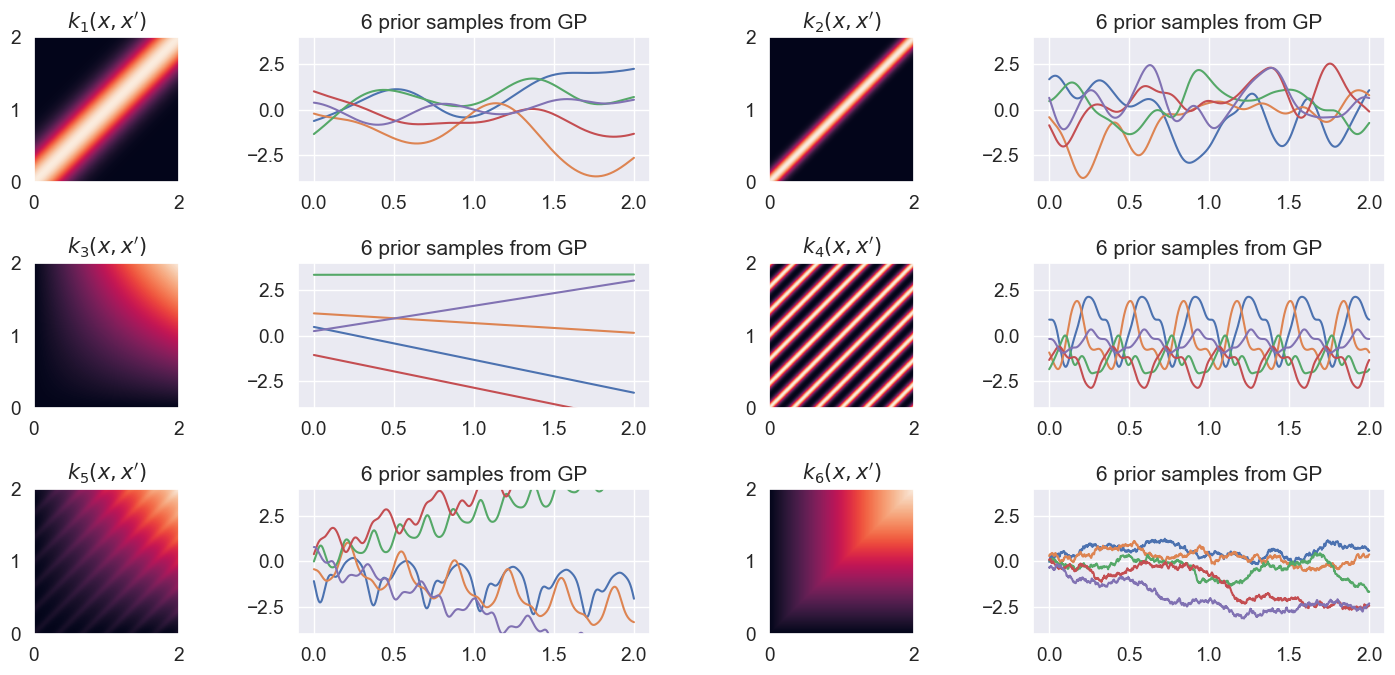

In [30]:
# Defining the different covariance functions
kernel_1 = lambda x,y: 2 * np.exp(- (x - y) ** 2 / (2 * 0.3 ** 2))
kernel_2 = lambda x,y: np.exp(- (x - y) ** 2 / (2 * 0.1 ** 2))
kernel_3 = lambda x,y: 4 + 2 * x * y
kernel_4 = lambda x,y: np.exp(-2 * np.sin(3 * np.pi * np.abs(x - y)) ** 2)
kernel_5 = lambda x,y: np.exp(-2 * np.sin(3 * np.pi * np.abs(x - y)) ** 2) + 4 * x * y
kernel_6 = lambda x,y: 0.2 + np.minimum(x,y)

# Generate samples from kernel
def generate_samples(K, jitter = 1e-8, num_samples = 20):
    L = np.linalg.cholesky(K + jitter * np.identity(K.shape[0]))
    f_samples_or = np.random.multivariate_normal(np.zeros(K.shape[0]), np.identity(K.shape[0]), num_samples)
    f_samples = L @ f_samples_or.T
    return f_samples
    
# Plot of the different kernels
X = np.linspace(0, 2, 1000)
xs, ys = np.meshgrid(X,X)
fig, ax = plt.subplots(3,4)
fig.set_figwidth(15)
fig.set_figheight(7)
kernels = [kernel_1, kernel_2, kernel_3, kernel_4, kernel_5, kernel_6]
for idx, ker in enumerate(kernels):
    row, col = idx // 2,    2 * (idx % 2)
    ax[row,col].grid(False)
    ax[row,col].pcolormesh(xs, ys, ker(xs, ys))
    ax[row,col].set_aspect('equal')
    ax[row,col].set_title(fr"$k_{idx+1}(x,x')$")
    ax[row,col+1].plot(X, generate_samples(ker(xs, ys), num_samples=5))
    ax[row,col+1].set_ylim(-4,4)
    ax[row,col+1].set_title("6 prior samples from GP")
plt.tight_layout()
plt.show()

In [31]:
data = np.load('./data_exercise5b.npz')
day = data['day']
bike_count = data['bike_count']
# log-transform the data
bike_count= np.log(bike_count)

# for predictions
Xstar = np . arange (0 , 370) [: , None ]


In [32]:
def generate_samples(m, K, num_samples, jitter=0):
    """ returns M samples from an Gaussian process with mean m and kernel matrix K. The function generates num_samples of z ~ N(0, I) and transforms them into f  ~ N(m, K) via the Cholesky factorization.

    arguments:
        m                -- mean vector (shape (N,))
        K                -- kernel matrix (shape NxN)
        num_samples      -- number of samples to generate (positive integer)
        jitter           -- amount of jitter (non-negative scalar)
    
    returns 
        f_samples        -- a numpy matrix containing the samples of f (shape N x num_samples)
    """
    N = len(K)
    L = np.linalg.cholesky(K + jitter * np.identity(N)) # Cholesky factorization L.shape = (N, N)
    z_samples = np.random.normal(0,1,size=(N, num_samples)) # generate samples from N(0, I) z_samples.shape = (N, num_samples)
    f_samples = m[:, None] + L @ z_samples # transform z into f via the Cholesky factorization f_samples.shape = (N, num_samples)
    # sanity check of dimensions
    assert f_samples.shape == (len(K), num_samples), f"The shape of f_samples appears wrong. Expected shape ({len(K)}, {num_samples}), but the actual shape was {f_samples.shape}. Please check your code. "
    return f_samples

        

Add 'tau' for GP and construct kernel

In [35]:
class StationaryIsotropicKernel(object):

    def __init__(self, kernel_fun, kappa=1., lengthscale=1.0,tau=1.0):
        """
            the argument kernel_fun must be a function of three arguments kernel_fun(||tau||, kappa, lengthscale), e.g. 
            squared_exponential = lambda tau, kappa, lengthscale: kappa**2*np.exp(-0.5*tau**2/lengthscale**2)
        """
        self.kernel_fun = kernel_fun
        self.kappa = kappa
        self.lengthscale = lengthscale
        self.tau = tau # add tau there
    def contruct_kernel(self, X1, X2, kappa=None, lengthscale=None,tau=None, jitter=1e-8):
        """ compute and returns the NxM kernel matrix between the two sets of input X1 (shape NxD) and X2 (MxD) using the stationary and isotropic covariance function specified by self.kernel_fun
    
        arguments:
            X1              -- NxD matrix
            X2              -- MxD matrix
            kappa           -- magnitude (positive scalar)
            lengthscale     -- characteristic lengthscale (positive scalar)
            jitter          -- non-negative scalar
            tau             -- distance between to input points
        returns
            K               -- NxM matrix    
        """

        # extract dimensions 
        N, M = X1.shape[0], X2.shape[0]

        # prep hyperparameters
        kappa = self.kappa if kappa is None else kappa
        lengthscale = self.lengthscale if lengthscale is None else lengthscale
        tau = self.tau if tau is None else tau
        # compute the pairwise distances
        #distance = np.linalg.norm(X1[:, None] - X2, axis=2) # distance.shape = (N, M)
        distance = np.sqrt(np.sum((np.expand_dims(X1, 1) - np.expand_dims(X2, 0))**2, axis=-1))
        K = self.kernel_fun(distance, kappa, lengthscale,tau)

        # add jitter to diagonal for numerical stability
        if len(X1) == len(X2) and np.allclose(X1, X2):
            K = K + jitter*np.identity(len(X1))
        assert K.shape == (N, M), f"The shape of K appears wrong. Expected shape ({N}, {M}), but the actual shape was {K.shape}. Please check your code. "
        return K

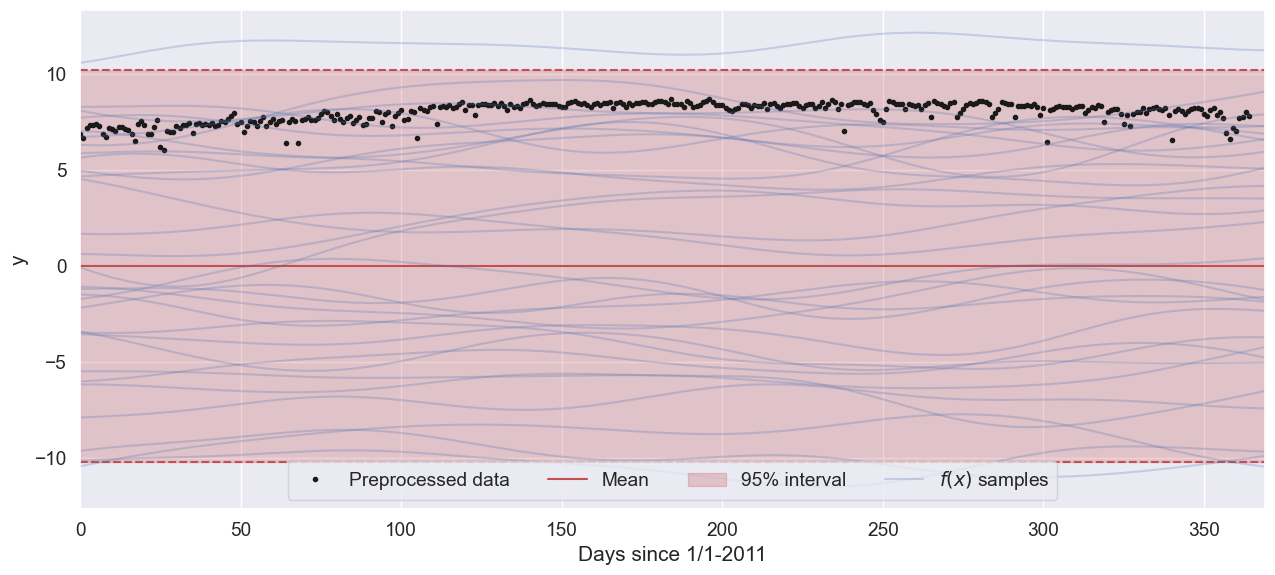

In [36]:
def kernel_f(dist,kappa,lengthscale,tau):
    return kappa**2*np.exp(-0.5*dist**2/lengthscale**2) + tau**2

def plot_with_uncertainty(ax, Xp, gp, color='r', color_samples='b', title="", num_samples=0):
    
    mu, Sigma = gp.predict_y(Xp)
    mean = mu.ravel()
    std = np.sqrt(np.diag(Sigma))

    # plot distribution
    ax.plot(Xp, mean, color=color, label='Mean')
    ax.plot(Xp, mean + 2*std, color=color, linestyle='--')
    ax.plot(Xp, mean - 2*std, color=color, linestyle='--')
    ax.fill_between(Xp.ravel(), mean - 2*std, mean + 2*std, color=color, alpha=0.25, label='95% interval')
    
    # generate samples
    if num_samples > 0:
        fs = gp.posterior_samples(Xstar, num_samples)
        ax.plot(Xp, fs[:,0], color=color_samples, alpha=.25, label="$f(x)$ samples")
        ax.plot(Xp, fs[:, 1:], color=color_samples, alpha=.25)
    
    ax.set_title(title)
    
# instantiate kernel
kernel = StationaryIsotropicKernel(kernel_fun=kernel_f)


class GaussianProcessRegression(object):

    def __init__(self, X, y, kernel, kappa=1, lengthscale=50,tau=5, sigma=0.1, jitter=1e-8):
        self.X = X
        self.y = y
        self.N = len(X)
        self.kernel = kernel
        self.jitter = jitter
        self.set_hyperparameters(kappa, lengthscale, sigma,tau)

    def set_hyperparameters(self, kappa, lengthscale, sigma,tau):
        self.kappa = kappa
        self.lengthscale = lengthscale
        self.sigma = sigma
        self.tau = tau
    def posterior_samples(self, Xstar, num_samples):
        mu, Sigma = self.predict_f(Xstar)
        f_samples = generate_samples(mu.ravel(), Sigma, num_samples)
   
        assert (f_samples.shape == (len(Xstar), num_samples)), f"The shape of the posterior mu seems wrong. Expected ({len(Xstar)}, {num_samples}), but actual shape was {f_samples.shape}. Please check implementation"
        return f_samples
        
    def predict_y(self, Xstar):
        mu,Sigma = self.predict_f(Xstar)
        Sigma = Sigma + self.sigma**2*np.identity(len(mu))
        return mu, Sigma

    def predict_f(self, Xstar):
        k = kernel.contruct_kernel(Xstar, self.X, self.kappa, self.lengthscale, self.tau,jitter=self.jitter) # k is the kernel matrix between the prediction points and the training data,k.shape = (P, N)
        K = kernel.contruct_kernel(self.X, self.X, self.kappa, self.lengthscale,self.tau, jitter=self.jitter) # K is the kernel matrix of the training data K.shape = (N, N)
        Kstar = kernel.contruct_kernel(Xstar, Xstar, self.kappa, self.lengthscale,self.tau, jitter=self.jitter) # Kstar is the kernel matrix of the prediction points Kstar.shape = (P, P)

        # compute the C matrix
        C = K + self.sigma**2*np.identity(len(self.X)) # C matrix is the covariance matrix of the training data with added noise C.shape = (N, N)

        # compute the mean and covariance of the posterior
        mu = k @ np.linalg.inv(C) @ self.y
        Sigma = Kstar - k @ np.linalg.inv(C) @ k.T
        #mu = np.dot(k, np.linalg.solve(C, self.y))
        #Sigma = Kstar - np.dot(k, np.linalg.solve(C, k.T))

        # sanity check for dimensions
        assert (mu.shape == (len(Xstar), 1)), f"The shape of the posterior mu seems wrong. Expected ({len(Xstar)}, 1), but actual shape was {mu.shape}. Please check implementation"
        assert (Sigma.shape == (len(Xstar), len(Xstar))), f"The shape of the posterior Sigma seems wrong. Expected ({len(Xstar)}, {len(Xstar)}), but actual shape was {Sigma.shape}. Please check implementation"

        return mu, Sigma
    
    def log_marginal_likelihood(self, kappa, lengthscale, sigma,tau):
        K = self.kernel.contruct_kernel(self.X, self.X, kappa, lengthscale, tau) # K is the kernel matrix of the training data K.shape = (N, N)
        C = K + sigma**2*np.identity(self.N) # C matrix is the covariance matrix of the training data with added noise C.shape = (N, N)

        # compute the Cholesky factorization of C
        L = np.linalg.cholesky(C)
        v = np.linalg.solve(L, self.y)

        # compute the log marginal likelihood
        logdet_term = np.sum(np.log(np.diag(L)))
        quad_term = 0.5 * np.sum(v**2)
        const_term = -0.5 * N * np.log(2*np.pi)

        return const_term - logdet_term - quad_term
      
tau = 5.0
l = 50
sigma = 1.0
kappa = 1.0


gp_prior = GaussianProcessRegression(np.zeros((0, 1)), np.zeros((0, 1)), kernel)
Xstar = np.arange(0, 370)[:, None]
# visualize
fig, ax = plt.subplots(1, 1, figsize=(13, 6))
ax.plot(day, bike_count, 'k.', label='Preprocessed data')
plot_with_uncertainty(ax, Xstar, gp_prior, num_samples=30)
ax.legend(loc='lower center', ncol=4)
ax.set(xlabel='Days since 1/1-2011', ylabel='y')
ax.set_xlim(Xstar.min(), Xstar.max())
plt.tight_layout()
plt.show()

In [37]:
def optimize_hyperparameters(gp, theta_init):

    # define optimization objective as the negative log marginal likelihood
    objective = lambda params: -gp.log_marginal_likelihood(np.exp(params[0]), np.exp(params[1]), np.exp(params[2]),np.exp(params[3]))

    # optimize using gradients
    res = minimize(value_and_grad(objective), np.log(theta_init), jac=True)

    # check for success
    if not res.success:
        print('Warning: optimization failed!')

    # return resultss
    theta = np.exp(res.x)
    return theta


Estimated hyperparameters
	sigma: 0.30
	kappa: 0.63
	scale: 82.67
	tau: 7.66


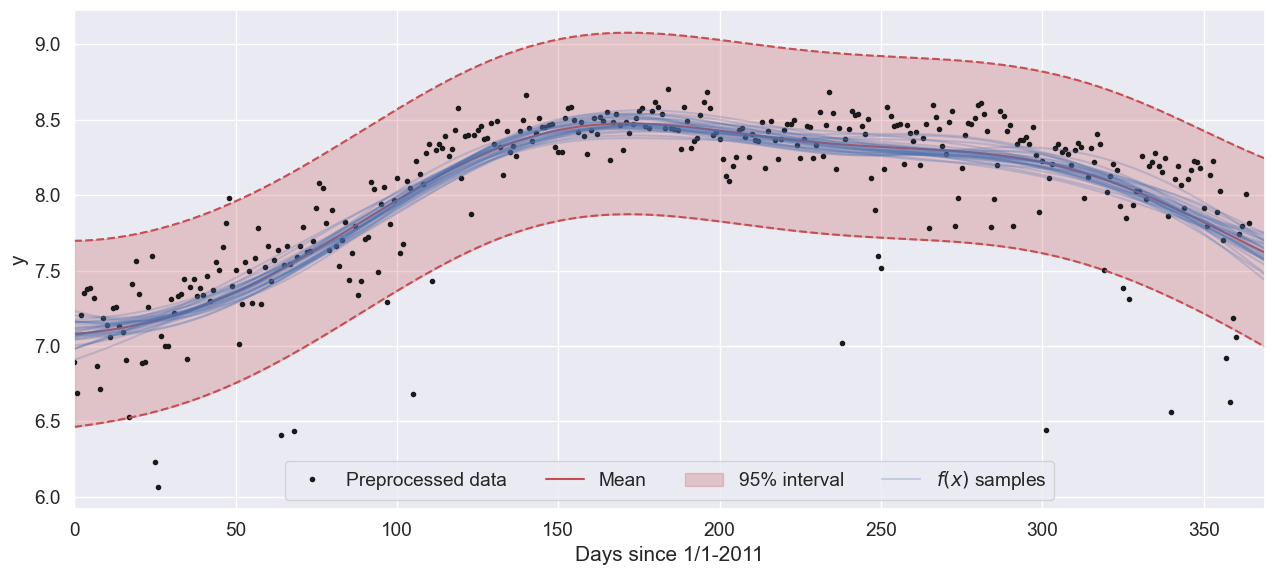

In [38]:
gp = GaussianProcessRegression(day, bike_count, kernel)

# optimize hyperparameters
kappa_hat,scla_hat,sigma_hat,tau_hat = optimize_hyperparameters(gp, np.array([1,1,1,1]))

gp.set_hyperparameters(kappa_hat, scla_hat, sigma_hat,tau_hat)

# print
print('Estimated hyperparameters')
print(f'\tsigma: {sigma_hat:3.2f}')
print(f'\tkappa: {kappa_hat:3.2f}')
print(f'\tscale: {scla_hat:3.2f}')
print(f'\ttau: {tau_hat:3.2f}')
# generate samples from the posterior
Xstar = np.arange(0, 370)[:, None]
fig, ax = plt.subplots(1, 1, figsize=(13, 6))
ax.plot(day, bike_count, 'k.', label='Preprocessed data')
plot_with_uncertainty(ax, Xstar, gp, num_samples=30)
ax.legend(loc='lower center', ncol=4)
ax.set(xlabel='Days since 1/1-2011', ylabel='y')
ax.set_xlim(Xstar.min(), Xstar.max())
plt.tight_layout()
plt.show()